(1001, 1)


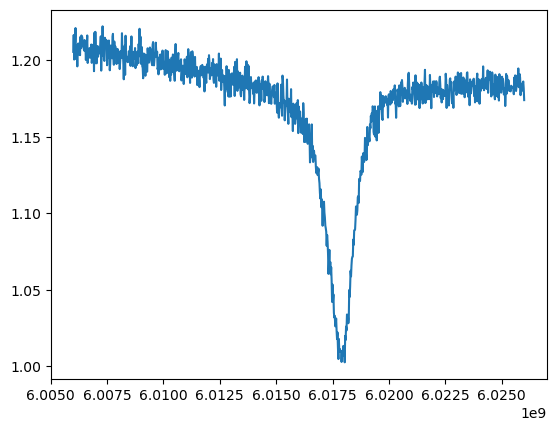

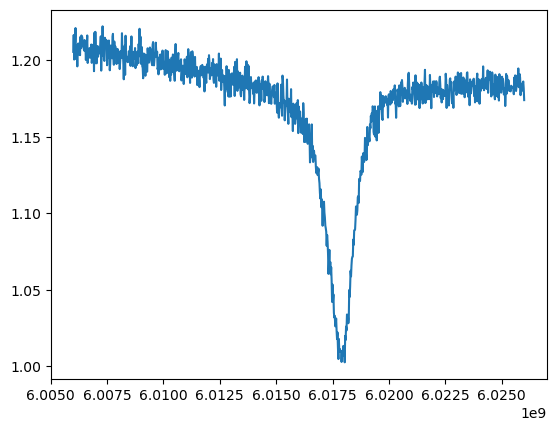

Frequency: 6.0178 GHz
Total Q: 3625
Internal Q: 4296
Coupling Q: 23202
FWHM: 1.66011 MHz
Kappa: 10.43081 MHz
Single Photon Power: -131.8 dBm
Ringdown Time: 0.133 us
Impedance Mismatch 0.171 degrees
Electrical Delay: -0.171990 ns
SNR: 800.0


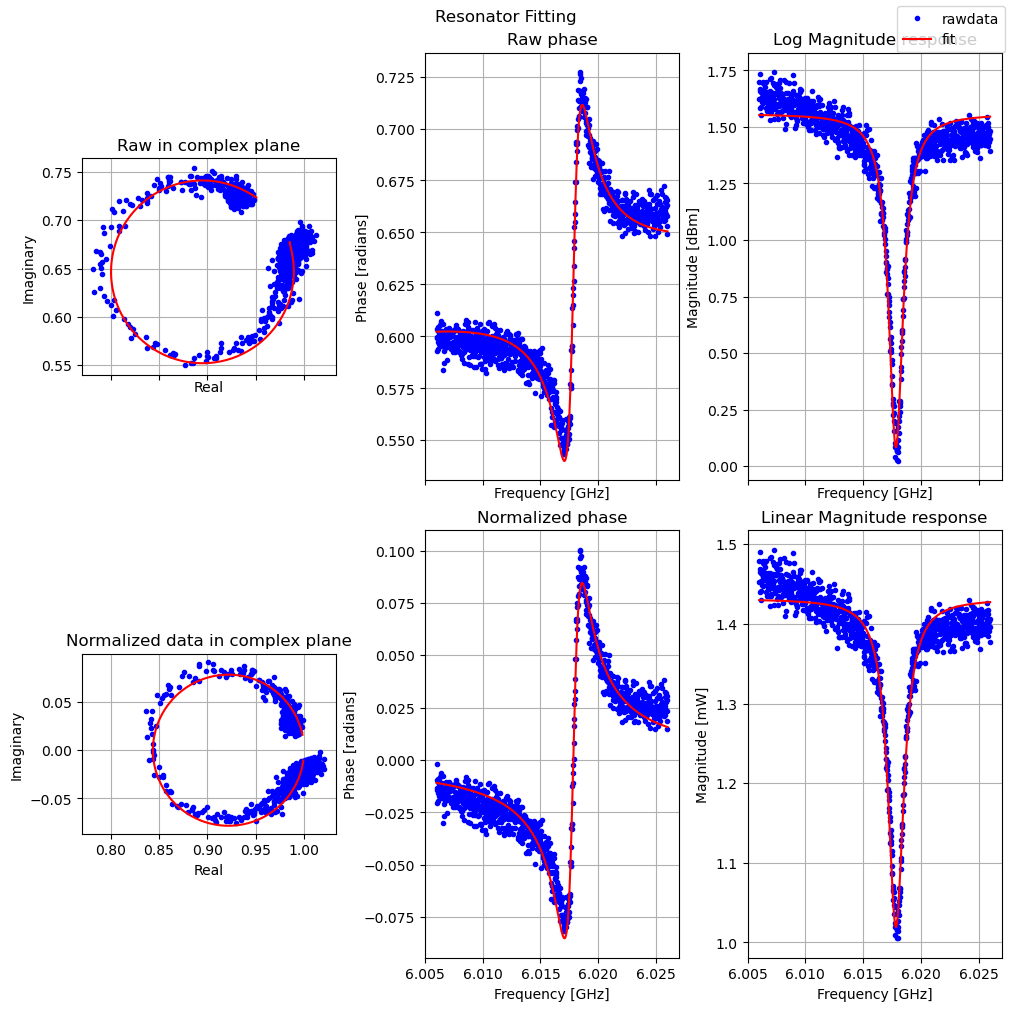

In [51]:
import h5py
import numpy as np
import matplotlib.pyplot as plt
import sys
from fitTools.Resonator import Resonator
datapath = 'G:\\Shared Drives\\LFL\\Labber\\Data\\2023\\02\\Data_0213\\'
f_name = 'Agilent Network Analyzer E5071B_4.hdf5'
f = h5py.File(datapath + f_name,'r')

s21 = f['Traces']['Agilent Network Analyzer E5071B - S21'][()]
numsteps = f['Traces']['Agilent Network Analyzer E5071B - S21_N'][0][()]
frange = f['Traces']['Agilent Network Analyzer E5071B - S21_t0dt'][0][()]
freqs = np.linspace(frange[0],frange[0]+frange[1]*(numsteps-1),numsteps)

s21_complex = s21[:,0,:]+1j*s21[:,1,:]
print(np.shape(s21_complex))
s21_complex2 = s21_complex[:,0]
#print(s21_complex)
#print(np.shape(s21_complex))
#print(np.shape(freqs))
plt.plot(freqs,abs(s21_complex))
plt.figure()
plt.plot(freqs,abs(s21_complex2))
plt.show()
res = Resonator(port_type='notch',f_data=freqs,z_data=s21_complex2)
res.autofit()
print(res)
res.show()

In [44]:
sys.path

['C:\\Users\\LFL\\Documents\\Cavity-Cooling',
 'C:\\Users\\LFL\\lflPython',
 'C:\\Users\\LFL\\Anaconda3\\envs\\opx-env2\\python38.zip',
 'C:\\Users\\LFL\\Anaconda3\\envs\\opx-env2\\DLLs',
 'C:\\Users\\LFL\\Anaconda3\\envs\\opx-env2\\lib',
 'C:\\Users\\LFL\\Anaconda3\\envs\\opx-env2',
 '',
 'C:\\Users\\LFL\\Anaconda3\\envs\\opx-env2\\lib\\site-packages',
 'C:\\Users\\LFL\\Anaconda3\\envs\\opx-env2\\lib\\site-packages\\win32',
 'C:\\Users\\LFL\\Anaconda3\\envs\\opx-env2\\lib\\site-packages\\win32\\lib',
 'C:\\Users\\LFL\\Anaconda3\\envs\\opx-env2\\lib\\site-packages\\Pythonwin']

In [86]:
import h5py
import numpy as np
import matplotlib.pyplot as plt
import sys
from fitTools.Resonator import Resonator
datapath = 'G:\\Shared Drives\\LFL\\Labber\\Data\\2023\\02\\Data_0213\\'
f_name = 'diss08_06_two_tone_spec_12.hdf5'
f = h5py.File(datapath + f_name,'r')

s21 = f['Traces']['Agilent Network Analyzer E5071B - S21'][()]
numsteps = f['Traces']['Agilent Network Analyzer E5071B - S21_N'][0][()]
frange = f['Traces']['Agilent Network Analyzer E5071B - S21_t0dt'][0][()]
freqs = np.linspace(frange[0],frange[0]+frange[1]*(numsteps-1),numsteps)

for key in f.keys():
    print(key)
    print(type(f[key]))
print('\n')
#print(f['Data']['Data'])
print('step config:\n')
for key in f['Step config']['10002F1D - Frequency'].keys():
    print(key)
    print(type(f['Step config']['10002F1D - Frequency'][key]))

print(f['Step config']['10002F1D - Frequency']['Step items'][()])
data = f['Data']['Data'][()]

#print(type(f['Traces']['Agilent Network Analyzer E5071B - S21']))
print(':)\n')
s21 = f['Traces']['Agilent Network Analyzer E5071B - S21'][()]
numsteps = f['Traces']['Agilent Network Analyzer E5071B - S21_N'][0][()]
frange = f['Traces']['Agilent Network Analyzer E5071B - S21_t0dt'][0][()]
print('\n')

#guess_current = np.linspace(f['Data']['Data'])

freqs = np.linspace(frange[0],frange[0]+frange[1]*(numsteps-1),numsteps) #two VNA values


Channels
<class 'h5py._hl.dataset.Dataset'>
Data
<class 'h5py._hl.group.Group'>
Instrument config
<class 'h5py._hl.group.Group'>
Instruments
<class 'h5py._hl.dataset.Dataset'>
Log list
<class 'h5py._hl.dataset.Dataset'>
Settings
<class 'h5py._hl.group.Group'>
Step config
<class 'h5py._hl.group.Group'>
Step list
<class 'h5py._hl.dataset.Dataset'>
Tags
<class 'h5py._hl.group.Group'>
Traces
<class 'h5py._hl.group.Group'>


step config:

Optimizer
<class 'h5py._hl.group.Group'>
Relation parameters
<class 'h5py._hl.dataset.Dataset'>
Step items
<class 'h5py._hl.dataset.Dataset'>
[(1, 0, 7.236e+09, 5.8e+09, 1.35e+10, 9.65e+09, 7.7e+09, 2000000., 3851, 0, 0.)]
:)





In [94]:
fdrive = np.arange(5.8,13.5+0.005,.005)
flux = np.linspace(0,250,25)
print(np.shape(s21))
#print(data[0,:,0])
z_mag=np.zeros(96275)
s21_complex = s21[:,0,:]+1j*s21[:,1,:]
print(np.shape(s21_complex))
for i in np.arange(96725):
    res = Resonator(port_type='notch',f_data=freqs,z_data=s21_complex[:,i])
    res.autofit()
    res.do_calibration()
    res.do_normalization()
    z_mag[i]=min(res.z_data)
    
#s21_mag = abs(s21_complex)
print(np.shape(z_mag))
#print(s21_mag[:,15618])
#s21_mag_avg = np.amin(s21_mag,axis=0)
#print(np.shape(s21_mag_avg))
#print(s21_mag_avg[3851])
s21_reshaped = np.reshape(z_mag,[25,3851])
print(np.shape(s21_reshaped))
print(s21_reshaped[1,0])

(100, 2, 96275)
(100, 96275)
fit error = [ 2.03019503e-05 -2.91351835e-01 -3.26487019e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))


C:\Users\LFL\AppData\Local\Temp\ipykernel_9304\2033762957.py:13: ComplexWarning: Casting complex values to real discards the imaginary part
  z_mag[i]=min(res.z_data)


fit error = [1.45080488e-05 3.39754076e-01 3.85295633e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [1.50419862e+13 1.22658439e+13 1.24414325e+24]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [1.50144028e-05 3.46514249e-01 4.34642010e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [ 2.61945218e-02 -1.07103566e+04 -1.31368362e+07]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [9.80996896e-03 8.99155812e+02 1.75493118e+04]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [4.56946449e+15 1.04253456e+16 5.01000188e+30]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [3.53447970e+18 1.24260842e+17 6.74645802e+32]
The fit could not be found, try cropping the

fit error = [6.89540981e-04 1.53782939e+02 2.61224719e+03]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [3.73552270e+10 7.88389440e+12 1.81023237e+26]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [2.76535575e+13 1.72361759e+14 1.81729425e+26]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [4.57555883e-05 7.02231284e+00 5.59650865e+01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [6.62907683e+13 3.88528543e+14 9.87523047e+27]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [1.62989848e+13 1.08676866e+14 1.09874130e+27]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [1.37530981e+11 4.25559548e+12 8.12083825e+23]
The fit could not be found, try cropping the da

fit error = [1.17211709e-02 3.74485035e+03 5.21014204e+05]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [8.13884474e+14 1.39029948e+13 1.01243701e+26]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [1.73822058e+13 1.92915207e+14 5.89778839e+27]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [5.13055329e+12 6.35221745e+13 7.53685018e+26]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [8.79297845e-05 3.31011975e+01 1.73599770e+02]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [5.28364297e+09 1.76940703e+12 1.11580291e+25]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [5.92571192e-04 1.22296077e+02 2.12733970e+02]
The fit could not be found, try cropping the da

fit error = [1.22775222e+15 2.42102270e+13 1.52151633e+26]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [4.00746285e-05 1.07989045e+01 1.96662000e+01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [1.88393623e+16 2.80109565e+16 2.05538975e+29]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [6.92652558e+18 4.71867786e+17 9.15019143e+33]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [3.58948145e+19 3.60203456e+17 1.39919613e+34]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [8.95440432e+21 1.77120909e+15 1.25157083e+32]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [4.65220154e+10 5.49616796e+12 4.85384489e+25]
The fit could not be found, try cropping the da

fit error = [1.30989121e+15 2.61864547e+15 1.00790398e+30]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [-4.52134234e+17  2.58835560e+16  1.78423731e+32]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [ 2.15596582e-03 -8.09185237e+02 -1.14006825e+05]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [3.28673718e+10 1.87783908e+13 3.28483276e+26]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [2.18266185e+14 1.07782731e+15 9.65323056e+27]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [-9.99239258e+18  2.88843177e+17  4.74917148e+33]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [4.19621667e+18 1.78837044e+17 1.18990382e+34]
The fit could not be found, try croppi

fit error = [1.79774310e+18 2.77489460e+16 7.23487348e+32]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [8.69218662e+17 1.39373995e+16 1.23414926e+32]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [2.28743415e+18 3.36818603e+16 1.10779944e+33]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [3.22145040e+14 7.15682507e+14 7.94585086e+26]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [-1.61076957e+13 -2.33715426e+11 -7.37550461e+21]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [9.32124250e-06 5.12722254e-01 5.48964434e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [-1.95425701e+18  2.92780498e+16  3.81507945e+32]
The fit could not be found, try cropping 

fit error = [2.25608665e-02 2.64926026e+03 1.10911186e+06]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [-2.88030030e+20  5.00464841e+15  2.70526807e+32]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [1.31224404e+13 1.18612955e+14 7.61581174e+26]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [3.73034796e+17 1.60459105e+17 1.58288705e+32]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [1.38784335e-05 2.60470023e-01 3.05653203e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [5.13583899e+23 1.51866291e+16 3.55063790e+33]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [1.29020265e+17 1.81732806e+15 4.51528772e+30]
The fit could not be found, try cropping the

fit error = [1.11065162e-04 1.62712345e+01 2.15393865e+02]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [-2.42881383e+14  2.57596248e+13  5.90127820e+25]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [4.63806956e+13 4.02678410e+11 2.27462193e+22]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [-3.82862875e+14  7.97138440e+13  2.46387347e+26]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [-1.01641968e+23  6.54125991e+15             nan]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [1.30351799e-05 6.63191621e-01 6.23142848e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [9.28955348e-06 6.32066529e+00 1.01284787e+01]
The fit could not be found, try croppi

fit error = [1.31921665e-03 3.03712939e+02 7.64118943e+04]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [-4.17236703e+14  1.20517134e+14  3.67011596e+26]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [-1.38736208e+18  3.15026043e+16  2.18659949e+32]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [2.46502877e+17 2.75839791e+17 2.44393079e+30]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [-1.80115422e+15  1.93066084e+13  1.49013017e+26]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [2.36172239e-04 8.71471562e+01 3.81600954e+02]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [8.58689684e-04 2.08572274e+02 4.14607553e+03]
The fit could not be found, try croppi

fit error = [2.79960925e-05 2.89350057e-01 3.60682354e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [1.81270875e-05 2.88327430e-01 3.79990924e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [2.44934378e+18 3.19340589e+16 4.02801110e+32]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [-1.01793028e+17  1.08461959e+15  1.16121310e+30]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [-1.36930234e+19  2.21012429e+17  4.06303841e+33]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [3.34890933e+13 2.67993469e+14 5.53556110e+26]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [ 1.82414386e+13 -3.65379737e+13 -1.35873773e+24]
The fit could not be found, try croppi

fit error = [2.37074560e+18 1.20331924e+17 3.72437799e+33]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [5.64757034e+06 5.17084238e+09 2.25631336e+19]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [1.63410218e-05 3.12990170e-01 3.76889212e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [-1.14731955e+18  3.31846121e+16  3.14966325e+32]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [2.38743538e+18 1.06969112e+17 2.17956700e+33]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [5.64393178e+10 1.14717260e+13 2.72758060e+26]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [3.79260668e+16 7.49442309e+16 3.16533084e+30]
The fit could not be found, try cropping the

fit error = [4.02570888e+08 9.37094260e+10 2.95001919e+21]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [1.45917972e+09 1.40697281e+11 2.63078078e+21]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [5.19448740e-04 1.48913454e+02 3.14436809e+03]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [1.54933714e-05 3.60967164e-01 3.91409271e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [3.98784659e+12 6.31239175e+13 9.54138724e+26]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [-1.22076998e+14  1.91084488e+13  1.63591133e+25]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [4.66763883e+11 7.24669072e+12 2.73351334e+24]
The fit could not be found, try cropping the

fit error = [3.77988755e+15 1.21950033e+15 9.36781893e+27]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [1.21936924e-05 4.81616707e-01 5.49076561e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [3.46050733e-04 1.04935203e+02 1.67673436e+02]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [7.92432025e+07 3.01387736e+10 3.75135352e+20]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [8.18470715e+14 3.72670859e+15 1.12448266e+30]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [4.55865056e+18 7.46189979e+16 5.64281212e+32]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [-1.07571793e+18  2.72520123e+16  4.05454446e+32]
The fit could not be found, try cropping the

fit error = [ 1.15040569e-03 -2.60169727e+02 -1.38498203e+04]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [2.73140592e-05 4.58735518e+00 1.76385454e+01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [4.01351834e+11 8.85118678e+12 1.93692721e+24]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [-6.68471051e+19  1.09334469e+18  2.36934995e+34]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [1.86165389e-05 3.01048018e-01 3.43204608e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [4.46127808e-04 1.36866672e+02 8.00905017e+02]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [9.36193530e+18 3.45354865e+17 2.59230538e+34]
The fit could not be found, try cropping 

fit error = [-3.33508363e+18  8.21633421e+16  2.71720553e+32]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [2.55499079e+14 6.82684190e+12 3.25141183e+24]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [2.34538337e+13 1.28066847e+14 4.62435871e+26]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [-4.45889293e+18  6.18310304e+16  2.38728163e+33]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [-2.41150020e+18  3.91019343e+17  8.73736737e+33]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [1.40237697e-03 1.12171840e+02 2.21370117e+03]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [3.62422684e-02 2.59852126e+03 6.61441052e+05]
The fit could not be found, try croppi

fit error = [1.45762821e-05 4.46269630e-01 4.40033688e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [1.49661533e-05 7.93224093e+00 1.69614339e+01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [1.76630030e+12 4.31472186e+13 6.54365641e+25]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [-2.35190867e+18  3.47793344e+17  9.20528032e+33]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [1.79934674e+14 1.16637256e+15 1.97460284e+29]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [2.74821758e-05 6.07996481e-01 6.12111102e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [3.29655406e-05 1.30063350e+01 1.03110876e+02]
The fit could not be found, try cropping the

fit error = [6.33731429e-06 3.48124990e+00 4.96973466e+00]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [8.29360786e-06 5.91925452e-01 6.62078400e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [6.61978168e+04 5.81408416e+08 8.98140706e+17]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [2.33899495e-03 2.95053734e+02 6.51273454e+04]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [-4.43769855e+18  5.00609967e+16  2.68925177e+32]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [-3.96736354e+18  6.33408964e+16  2.48756069e+33]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [2.54467731e+11 1.23658324e+13 2.52061711e+25]
The fit could not be found, try cropping 

fit error = [-5.43362628e+15  9.54407016e+14  4.18682427e+27]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [1.16545311e+12 1.94764420e+13 1.32178601e+26]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [2.08016990e+14 6.09958645e+14 3.99057175e+27]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [-5.13544642e+12 -1.47985130e+10 -1.01790608e+21]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [-3.01881965e+17  4.02595128e+15  2.20452115e+30]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [2.72048488e-05 4.31004514e-01 5.75617380e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [3.75770417e+18 2.50066195e+17 2.03002912e+34]
The fit could not be found, try croppi

fit error = [2.26614141e-03 1.45402885e+02 1.56984995e+03]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [6.90924963e+12 6.47586117e+10 3.45006508e+21]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [3.61301328e+13 2.91365147e+14 7.95671843e+26]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [1.72482476e+14 6.58810941e+12 1.76541919e+25]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [-1.27973801e+15  1.99227166e+13  2.22817235e+26]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [-8.50582014e+18  1.15358569e+17  1.23907603e+34]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [2.90758464e-05 3.93956244e-01 4.41102581e-01]
The fit could not be found, try cropping 

fit error = [1.94912365e-05 8.00041229e+00 4.71445929e+01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [-3.24208439e+18  2.91320636e+17  2.40353732e+33]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [-2.53945361e+19  1.56906994e+14  2.21274403e+30]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [2.18337810e-05 4.90942326e-01 8.39684679e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [-1.26673176e+18  7.54301473e+16  1.39717509e+32]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [1.08097622e+15 2.00108180e+13 4.04169323e+25]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [8.04963685e-06 8.81378921e-01 1.35512306e+00]
The fit could not be found, try croppi

fit error = [5.56247985e+15 8.35709246e+15 4.71613861e+30]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [-2.98280019e+18  4.26274845e+17  2.17528272e+33]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [8.34800907e+11 2.12232816e+10 6.11558752e+19]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [5.38910140e+19 6.30820629e+17 3.02352296e+34]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [-1.42204623e+19  1.98424696e+17  1.41659544e+33]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [2.49880458e+11 1.03444118e+13 6.03399501e+24]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [2.43866844e+20 3.01682943e+18 1.76188104e+36]
The fit could not be found, try cropping 

fit error = [3.26102233e-05 4.12771614e-01 4.95650257e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [2.7793819e+13 3.1264038e+13 7.2257549e+25]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [2.28693250e+20 2.66545026e+18 6.58697874e+35]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [-5.67077612e+19  6.05647200e+17  3.40671048e+34]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [1.05749423e+14 1.80694465e+13 3.01663446e+24]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [ 7.78430253e+11 -2.74551732e+09 -1.71106046e+19]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [1.14025564e-03 1.05976394e+03 2.51535955e+04]
The fit could not be found, try cropping the

fit error = [ 2.01265173e-02 -2.74372610e+03 -4.77569122e+05]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [1.34810861e-05 3.76803696e-01 4.85240695e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [1.77102333e+19 2.69844961e+17 6.83912553e+33]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [5.30914361e+18 2.04045201e+17 2.95265182e+34]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [3.80420963e-05 1.01358956e+00 1.62544935e+00]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [2.32893031e+15 2.47517677e+13 9.00209079e+25]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [-1.47230646e+18  4.66507011e+16  7.52376515e+32]
The fit could not be found, try cropping 

fit error = [8.55653151e+10 5.62013548e+12 5.71801851e+25]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [1.85157902e-05 2.55705030e+00 3.14281620e+00]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [1.30560845e+13 8.68245783e+12 4.97795390e+24]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [7.54011229e+15 2.06115552e+16 8.68172456e+30]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [-1.29664808e+14 -1.83713550e+12 -1.00592686e+24]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [8.66268176e-05 3.98649331e-01 4.96946038e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [1.19086677e+14 8.89268476e+14 1.02886662e+29]
The fit could not be found, try cropping the

fit error = [4.38093816e-03 4.02940181e+02 2.94777803e+04]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [ 1.76278901e-03 -1.89867235e+02 -1.93981463e+04]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [1.61766174e-05 4.78547450e-01 5.11700445e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [-4.89968722e+12  6.43733813e+08             nan]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [2.48174132e-05 4.95726507e-01 5.36886946e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [6.85425253e+15 1.18371376e+16 7.30369158e+29]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [-2.98856449e+17  1.50992190e+16  9.88184300e+30]
The fit could not be found, try croppi

fit error = [1.03145158e+14 5.43995528e+14 2.76009198e+27]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [3.88225090e+12 6.49850794e+13 5.39041482e+26]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [2.76705066e-05 2.78314568e-01 3.37622867e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [-5.82600048e+14  1.24310048e+13  7.97949344e+24]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [8.27384498e-06 5.21783224e-01 1.54205125e+00]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [ 1.20480909e-04 -2.44719696e-01 -3.09924764e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [-1.25621963e+25  1.21015154e+18  9.04995269e+36]
The fit could not be found, try croppi

fit error = [-3.54639589e+23  2.10319173e+16  4.52435249e+33]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [1.26948273e+16 2.02919314e+16 1.58542609e+30]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [2.19709038e+14 7.05699963e+14 2.65476667e+28]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [-6.44088134e+14  3.35098360e+14  7.74294840e+26]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [2.63701866e-05 2.37909476e-01 3.46633655e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [8.92109208e+17 1.56035428e+16 5.03138336e+32]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [ 6.10732765e+10 -2.43845757e+09 -4.07792886e+18]
The fit could not be found, try croppi

fit error = [4.97730711e+18 7.77689090e+16 2.68696584e+32]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [2.67286628e-05 5.83775784e+00 1.70277599e+01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [2.48809421e+17 1.63885259e+16 4.20244305e+31]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [1.58511582e+11 6.36946781e+12 4.42805418e+24]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [9.33307331e-04 2.15749363e+02 2.92837658e+04]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [1.04356643e-03 6.68986121e+01 1.71521741e+03]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [-5.07714039e+15  7.01114597e+13  3.01871673e+26]
The fit could not be found, try cropping the

fit error = [-2.91971947e+19  6.06419321e+17  4.52793133e+34]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [4.86555113e-03 4.91548940e+02 2.07703666e+04]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [1.27515718e+13 1.75212414e+14 4.33274089e+27]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [3.58222688e-06 1.75112507e+00 9.02794849e+00]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [4.58667387e+12 2.17855359e+13 1.16283765e+26]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [5.64904881e+18 3.73271556e+17 6.24321630e+34]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [5.97303310e+17 6.45582461e+16 4.68459635e+31]
The fit could not be found, try cropping the

fit error = [-4.01320020e+19  7.62403184e+17  1.37640053e+35]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [ 4.35155712e+12 -3.37502476e+10 -7.09665844e+20]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [9.54377422e+14 1.20475928e+15 3.56556656e+26]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [6.48925228e+12 1.36261171e+11 1.35290778e+21]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [1.97457909e+18 5.49778727e+16 1.23039063e+32]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [3.38679056e+11 2.89879711e+13 4.33045507e+25]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [6.81805188e+18 2.33057343e+17 1.92535628e+34]
The fit could not be found, try cropping 

fit error = [1.09476788e+18 3.34252326e+16 5.91189815e+32]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [ 4.23156223e-05 -2.31904695e+02 -1.86090020e+04]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [8.18609934e+11 3.43682677e+13 9.73648111e+25]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [-1.38027343e+19  7.68253192e+17  1.69092580e+34]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [3.98446177e+12 4.21828210e+13 2.41805249e+25]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [1.54389084e-05 2.94549060e-01 3.81362124e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [1.88238203e-02 7.97357208e+03 1.00366150e+05]
The fit could not be found, try cropping 

fit error = [4.95138668e+14 1.48961352e+15 1.75826506e+28]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [1.07898268e-02 1.79369098e+03 4.06493246e+05]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [8.29262532e-02 6.07220947e+03 5.91253216e+06]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [4.35037980e+10 2.45751451e+12 5.42451693e+24]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [4.61160912e+11 1.66775966e+13 3.56493286e+25]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [1.74874494e+10 3.17610458e+12 2.55016651e+24]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [5.62384881e+11 1.05284403e+13 2.86272663e+24]
The fit could not be found, try cropping the da

fit error = [6.30730093e+14 1.87190253e+13 1.14519143e+25]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [1.29314543e+18 7.61288626e+16 2.04828242e+32]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [1.38814850e-05 3.80655351e-01 4.82996521e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [5.14161010e+18 5.13350478e+17 3.84109490e+33]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [1.32753338e-03 4.96465033e+02 3.00695348e+03]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [1.36879235e-03 6.22437661e+02 1.85403687e+04]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [2.62711370e-04 1.92634290e+01 8.97375677e+01]
The fit could not be found, try cropping the da

fit error = [-3.42863880e+15  1.06901568e+14  3.95073521e+26]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [-6.84837658e+21  7.22227102e+15             nan]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [1.04646147e+11 6.00327692e+12 2.60132939e+24]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [2.34768523e-04 1.49832206e+02 9.39676430e+02]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [3.14718634e+13 3.15918448e+14 1.31222098e+27]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [4.01969973e+17 8.27468708e+15 5.09478575e+30]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [-7.97855916e+15  6.32906129e+14  5.93409383e+27]
The fit could not be found, try croppi

fit error = [1.71394175e+14 6.06933298e+14 1.49130551e+28]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [2.01828126e-05 3.08235118e-01 3.71761803e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [-3.50924875e+19  7.99042873e+17  2.25358552e+34]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [1.10438652e-05 2.77978929e+00 7.04317208e+01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [-3.40849743e+13  5.76382565e+12  1.02428742e+24]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [1.44336815e-05 6.11135452e-01 8.60979355e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [3.27804636e+12 5.48010367e+13 8.65511594e+25]
The fit could not be found, try cropping 

fit error = [9.69212666e+11 6.03120957e+13 1.92627549e+26]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [1.73872895e-05 3.72495106e-01 4.84314536e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [-9.11088696e+10  8.62856185e+10  6.62476747e+16]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [3.48386092e+18 1.65895795e+17 1.50693910e+33]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [9.51520233e+15 1.52970417e+15 9.84765188e+28]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [4.17496695e+12 6.64297829e+13 9.28390784e+25]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [2.90697172e+18 4.11456467e+17 2.57764053e+33]
The fit could not be found, try cropping the

fit error = [8.61491893e+21 1.44877417e+15            nan]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [1.40252528e+19 3.24855078e+17 6.48370089e+33]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [1.14613669e-05 4.79698034e-01 7.23092651e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [-2.22242723e+19  2.59434918e+17  1.39222224e+35]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [3.35445276e+15 1.58408897e+16 1.05447046e+30]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [2.29977378e-05 3.23508899e-01 3.82469383e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [4.05223520e-04 1.46454297e+02 1.10869733e+03]
The fit could not be found, try cropping the

fit error = [1.17812790e+10 1.41760971e+12 2.89695609e+23]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [-3.59256524e+18  1.00355507e+17  6.55753740e+33]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [5.64721617e+11 2.10095722e+13 1.63166419e+25]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [-6.06222303e+17  8.50501883e+15  9.54779581e+30]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [3.53474297e-04 2.66994039e+02 4.92484795e+03]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [1.29949538e-05 3.08049588e-01 4.08167726e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [1.13065372e+11 6.85627514e+12 4.25314124e+24]
The fit could not be found, try cropping 

fit error = [-9.45183538e+18  9.79937461e+16  6.65557410e+33]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [4.01050402e+18 2.54555137e+17 1.88298774e+33]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [5.41304712e+12 1.70253607e+14 2.95271416e+27]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [1.20197330e+21 9.34540862e+14 3.78461324e+31]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [1.46886540e+26 1.80766304e+18            nan]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [2.25296288e+19 5.07201690e+17 1.23991186e+34]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [-6.42036957e+19  6.45300880e+17  3.27157061e+34]
The fit could not be found, try cropping 

fit error = [-1.8855433e+22  5.3831173e+15            nan]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [-5.60445644e+21  5.19373699e+14             nan]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [4.86331046e+14 1.17794624e+15 4.99561077e+28]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [1.41944213e+18 9.20597120e+16 1.98959830e+33]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [4.84037316e+13 8.34207794e+14 2.09014398e+28]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [-7.53832472e+18  1.05033760e+17  6.37139839e+33]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [3.29211212e-04 2.79458795e+02 2.32495097e+04]
The fit could not be found, try cropping 

fit error = [-1.77173192e+15  3.30523473e+13  1.83251800e+27]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [1.26320757e+20 1.47843451e+18 6.38638269e+35]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [6.26522918e+18 1.56024667e+17 1.42562006e+33]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [2.30612545e+18 5.70607721e+16 2.05856157e+33]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [-8.39529669e+18  9.13908164e+16  1.08166755e+33]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [-3.50033686e+15  5.41011876e+13  6.97454967e+26]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [1.03453039e-05 6.48829719e-01 6.93487221e-01]
The fit could not be found, try croppi

fit error = [1.24396750e-02 6.36344659e+02 1.25491806e+04]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [2.12828251e-03 3.04776764e+02 7.43633791e+02]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [6.86444782e+10 1.59489374e+12 1.16561654e+23]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [-2.17442562e+18  5.45930751e+16  2.97336109e+32]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [9.37401520e+11 2.37260627e+13 2.48803626e+25]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [1.82073504e-05 1.39374545e+01 6.78428792e+01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [1.31605253e-05 3.37849487e-01 3.47129226e-01]
The fit could not be found, try cropping the

fit error = [1.97334210e-02 3.77805474e+03 1.32278555e+06]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [1.97196607e+18 2.74521104e+16 7.37934189e+32]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [1.69258054e+13 3.17727253e+11 6.88190212e+21]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [1.19817018e-03 1.76448653e+02 2.75823091e+05]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [3.91413954e+20 3.00465534e+14 5.32865401e+30]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [2.70893281e-05 2.84090770e-01 3.12086904e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [-3.45698776e+15  4.07179479e+14  1.95128183e+27]
The fit could not be found, try cropping the

fit error = [1.46880179e+18 2.00283331e+16 4.26270132e+32]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [1.25542553e+18 4.48828192e+16 9.39717097e+31]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [4.85610444e+18 8.29940723e+16 4.53758275e+32]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [1.57337386e+18 2.70458567e+16 3.94321797e+32]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [8.21352655e+11 2.27779299e+13 1.66875928e+25]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [-2.87845780e+29 -4.06222187e+27 -2.04322790e+54]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [-3.85021313e+18  5.00781547e+16  2.71938132e+33]
The fit could not be found, try cropping 

fit error = [3.72803863e+12 5.74585893e+13 9.07160297e+26]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [-3.27725794e+18  1.13024115e+17  4.35398333e+32]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [8.96893144e-02 6.99174420e+03 5.28372334e+06]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [4.13372322e+12 6.63586665e+13 7.20709852e+26]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [2.52218401e+21 2.82849523e+15            nan]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [3.84145696e+17 3.93630681e+15 2.57708048e+31]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [1.23117731e+11 3.65938566e+12 1.00673908e+24]
The fit could not be found, try cropping the

fit error = [-4.60963379e+18  1.14321669e+17  8.43088698e+32]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [1.77625469e-03 1.07891670e+03 3.12748268e+03]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [5.00087209e-05 1.14383687e+01 1.14178186e+01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [ 3.47634170e+15 -7.28786785e+13 -3.28063882e+27]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [1.20470287e+10 1.31629495e+12 2.29693949e+23]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [2.15935274e+15 8.24005945e+15 1.48664996e+30]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [3.67918195e+12 4.05699070e+13 2.60939682e+25]
The fit could not be found, try cropping 

fit error = [8.94350391e+13 7.60745706e+14 2.86075751e+28]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [1.56501274e-03 6.14483447e+02 6.09144730e+03]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [-5.04206712e+17  7.57371412e+15  2.77756017e+31]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [1.36502420e+15 4.32114046e+13 3.01690152e+26]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [1.47628324e+22 6.25675867e+15 1.28442387e+33]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [ 2.73226946e-05 -3.23770016e-01 -4.15151522e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [6.72423979e+16 4.81631562e+16 1.20440355e+31]
The fit could not be found, try cropping 

fit error = [1.67919841e+10 1.00284614e+12 8.12199353e+23]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [4.26873227e+17 2.54380873e+16 1.73342272e+31]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [6.56003909e+22 2.86342491e+15            nan]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [8.05372768e-03 7.35755436e+02 9.75614702e+03]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [1.22964414e-05 3.25018993e-01 3.91109771e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [3.40807756e+13 2.37602086e+14 6.54877295e+26]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [2.98665368e+10 2.63705880e+12 9.38174286e+23]
The fit could not be found, try cropping the da

fit error = [-5.80017264e+17  2.48934666e+17  8.46689943e+31]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [8.10627553e-06 7.75015787e-01 6.93391699e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [2.65615969e+19 3.43853332e+17 2.17828076e+34]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [2.20676019e+13 2.58056876e+14 2.06478112e+27]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [1.35128417e-05 2.84862587e-01 4.09148883e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [2.99879673e+14 8.69808959e+14 5.34640066e+27]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [-3.51398385e+19  8.66295835e+17  3.60292324e+34]
The fit could not be found, try cropping 

fit error = [3.03181708e-05 3.51744540e-01 4.31546628e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [3.87458359e+17 4.18327669e+16 4.06474060e+31]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [2.71225063e+15 8.55258020e+13 3.58723924e+26]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [4.53208219e+18 5.02435478e+16 3.95253514e+32]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [1.83453186e+11 9.63920950e+12 9.74610719e+24]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [1.93621801e+17 3.44690163e+16 1.34056283e+31]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [1.31528592e+13 1.36580315e+14 5.39941272e+26]
The fit could not be found, try cropping the da

fit error = [7.98282476e+10 2.03165988e+12 8.35017486e+23]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [1.49414259e+16 2.11979615e+16 8.09875326e+29]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [1.50137096e+12 4.93901242e+13 1.25994709e+27]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [ 1.58281538e+14 -6.91711326e+08 -5.07592890e+18]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [6.12395660e-05 1.67311957e+01 3.36090370e+01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [-1.39976821e+18  5.07432820e+16  4.35247209e+32]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [ 9.71973331e-04 -1.96770291e+02 -2.08500403e+04]
The fit could not be found, try croppi

fit error = [-7.96718382e+18  8.64893158e+17  7.51351135e+34]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [ 2.61235824e-02 -3.53280431e+03 -9.33088665e+05]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [2.34031612e+18 2.78755140e+16 1.37601394e+32]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [2.76934010e+09 2.82497417e+11 9.41179137e+21]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [2.65233980e+23 1.08287545e+16 1.31795038e+33]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [2.15480559e+09 1.83845165e+12 2.00389770e+24]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [7.52933528e+13 4.68624804e+14 1.05830417e+27]
The fit could not be found, try cropping 

fit error = [1.92336510e+19 2.76057280e+17 7.63511648e+33]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [2.32022768e+22 1.75325414e+15            nan]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [3.58269322e+18 4.13259217e+16 1.90823653e+33]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [-2.96725004e+18  4.74862769e+17  1.53746510e+33]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [3.31872657e-03 4.30010702e+02 9.63162807e+04]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [3.44766500e+09 1.40535741e+12 1.29660733e+24]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [1.52182064e+18 1.54619547e+16 3.06666089e+32]
The fit could not be found, try cropping the

fit error = [2.67486154e-03 4.10296800e+02 6.55576984e+03]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [8.79472432e+13 1.38278034e+12 1.58699898e+24]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [1.69638804e+10 6.95707377e+12 4.80422513e+25]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [9.31337592e-04 3.30596893e+02 9.38110135e+03]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [4.73598044e+11 1.48277829e+13 7.51973281e+25]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [9.68361637e+10 2.27262795e+12 2.27646444e+24]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [-3.94621064e+18  6.55989274e+17  2.57314355e+34]
The fit could not be found, try cropping the

fit error = [ 5.55536795e+12 -3.49000123e+07 -2.06668783e+16]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [-1.71230429e+18  1.72965007e+16  4.47360097e+31]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [7.35461229e-05 4.01804373e-01 5.22457662e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [4.39189633e+18 6.02130204e+16 3.70884043e+33]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [1.05888826e+13 2.35040374e+11 4.39316164e+22]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [2.52938227e+20 4.11987488e+15            nan]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [-7.01425525e+16  6.48017124e+16  3.36118459e+28]
The fit could not be found, try croppi

fit error = [-1.80311418e+19  1.45276119e+18  3.01580535e+34]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [-2.53639918e+14  2.13177991e+14  5.41591808e+24]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [4.29721739e+12 9.48634630e+13 6.56483538e+26]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [7.15001885e+16 5.29170611e+15 7.32837356e+29]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [-3.20963834e+18  2.24585501e+17  5.29240625e+33]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [3.21743113e-03 4.44391668e+02 2.62860656e+04]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [1.71694996e+18 1.60317526e+17 4.40717597e+32]
The fit could not be found, try croppi

fit error = [4.74743419e+13 3.71537960e+14 1.10193634e+27]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [-1.56895835e+16 -3.37035092e+14 -7.23157532e+27]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [2.45612702e-03 1.45517751e+03 9.26487132e+04]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [1.07938687e+17 5.71703688e+16 1.43681908e+31]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [7.06951080e-03 8.95560189e+02 2.81631570e+05]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [-1.70072672e+14  6.84858228e+12  1.43284003e+24]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [2.54739893e+19 2.64481422e+17 1.10936042e+34]
The fit could not be found, try cropping 

fit error = [-1.87757820e+19  4.35024884e+17  8.94842790e+33]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [-3.63250268e+18  3.79074173e+16  1.79566044e+32]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [2.09075087e+19 4.11757459e+17 1.32559607e+34]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [5.19030690e-04 2.50960937e+02 1.34133893e+03]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [6.82245313e-04 1.81373572e+02 1.16747559e+04]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [1.24759004e+16 9.37329295e+15 6.25528412e+29]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [8.15014810e+19 1.50686241e+18 4.08126705e+35]
The fit could not be found, try cropping 

fit error = [ 1.36014344e-03 -3.03544436e+02 -5.67594963e+03]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [-2.37710724e+19  2.50104754e+17  2.27253694e+34]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [5.95347525e+15 5.94855800e+13 6.13251939e+26]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [4.72854918e+09 3.60436462e+12 1.42790345e+25]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [9.15182998e-04 5.49908027e+02 1.15093209e+04]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [1.12106616e-03 3.93512364e+02 1.25694484e+05]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [ 4.59944560e+15 -1.02135284e+16 -9.74187984e+28]
The fit could not be found, try croppi

fit error = [1.81942827e-05 1.69865860e+01 5.08551717e+01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [8.13957707e+16 1.98517264e+16 4.27895336e+30]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [7.53493753e-04 4.67506573e+02 3.18617594e+03]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [ 7.12374579e+07 -4.75662010e+10 -3.59528628e+21]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [7.39375831e+19 3.33293951e+18 3.60150695e+35]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [-5.30205104e+18  3.75566522e+17  7.10610828e+33]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [1.71414241e+19 3.30653059e+17 1.28083372e+34]
The fit could not be found, try cropping 

fit error = [3.00122914e+19 5.42522342e+17 4.69212868e+34]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [6.18382709e+12 1.51711220e+14 1.74848799e+27]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [3.17147331e-04 1.19135889e+00 3.36170150e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [1.62335049e+11 3.00251522e+13 3.05543382e+26]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [6.00221812e-03 7.53757938e+02 5.63754726e+04]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [-2.56064883e+19  5.95007789e+17  2.20907716e+34]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [9.29326719e-04 6.58690888e+02 2.85018550e+03]
The fit could not be found, try cropping the

fit error = [1.66865825e-04 3.22078898e-01 1.61783340e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [3.73556143e-02 4.41531104e+03 3.19026786e+07]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [-8.72502838e+23  2.84952480e+17             nan]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [-3.9848892e+14  2.1092960e+13  1.0983335e+25]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [2.08377458e-03 4.53034379e+02 5.08516529e+03]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [8.30460978e+18 6.02406521e+17 7.88929941e+33]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [1.01212146e+18 1.34893938e+17 2.09656348e+32]
The fit could not be found, try cropping the

fit error = [1.02832148e-03 5.43112066e+02 4.90576019e+04]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [-4.13385711e+18  1.18037321e+17  4.06234598e+32]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [4.56984143e+17 4.72378176e+16 1.38689602e+32]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [-1.75470702e+20  1.81623786e+18  3.45681164e+35]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [4.05203173e+18 9.79295075e+16 7.25499306e+32]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [5.91104634e-04 2.76692924e+02 5.47754640e+04]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [4.89351353e+18 1.81179444e+17 1.60710656e+33]
The fit could not be found, try cropping 

fit error = [1.81639796e+12 3.54633905e+13 1.95086404e+25]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [7.96619097e-05 9.88249887e+00 1.15882445e+02]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [1.85970004e+18 2.32747214e+16 6.70427813e+31]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [-1.21926961e+18  4.58667196e+16  7.25402784e+31]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [-1.45180449e+18  1.54096016e+17  8.28052021e+32]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [2.88433975e+18 2.91158100e+16 3.37866228e+32]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [3.89344130e+18 2.50773132e+17 1.68243941e+33]
The fit could not be found, try cropping 

fit error = [1.71781626e-03 3.52025454e+02 1.02343350e+05]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [2.05419873e-04 1.22114885e+00 7.96503337e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [4.40080212e-04 1.45593785e+00 3.86080704e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [-9.63040735e+18  7.27690851e+17  9.47182129e+33]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [3.58280064e+10 1.20202015e+13 1.05361993e+26]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [5.94292392e+09 2.96336821e+12 3.97513998e+24]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [4.18568374e+18 5.23790213e+16 2.92558283e+32]
The fit could not be found, try cropping the

fit error = [-2.14995818e+19  3.13014589e+17  1.45172982e+34]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [8.19698927e+17 9.61673983e+15 3.61346362e+31]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [2.17346550e+18 6.26862871e+16 2.58163978e+32]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [-2.71233968e+18  1.85287342e+18  2.76348539e+33]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [7.88053641e-05 5.47098535e-01 6.17644813e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [2.21874284e-03 6.84254243e+02 4.71931529e+04]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [-4.13470373e+18  2.10063226e+18  2.54537849e+33]
The fit could not be found, try croppi

fit error = [2.42958620e-04 1.73982288e+02 4.20274659e+03]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [9.57277632e+16 6.09150703e+16 2.61911811e+31]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [5.23881199e-04 1.80218945e+02 3.37718378e+03]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [3.93719189e+24 7.44355563e+16 2.22844542e+35]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [-4.71197416e+18  9.46795928e+16  1.63416073e+33]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [3.79163525e+11 4.75891590e+12 3.23926043e+23]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [2.21675202e+18 5.81629650e+16 1.52337827e+32]
The fit could not be found, try cropping the

fit error = [-9.14877804e+18  1.30512152e+17  5.59422904e+33]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [7.19012190e+12 1.33097094e+14 1.25346470e+27]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [ 3.66689652e-02 -2.39311940e+03 -1.16873054e+07]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [1.01420631e-03 1.25527271e+02 3.24256986e+02]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [-3.82058949e+18  9.60339816e+16  4.84736561e+32]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [1.24258945e-03 5.24314357e+02 3.87566679e+03]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [9.29547273e+12 9.25862329e+13 2.13481875e+26]
The fit could not be found, try croppi

fit error = [9.25151213e-04 1.60761381e+02 3.09904737e+05]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [1.56186185e+20 1.82845476e+18 3.08323683e+35]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [8.15701670e+17 1.14984273e+16 3.42922596e+31]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [-3.34055692e+18  8.27680167e+17  2.93327014e+33]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [4.69065020e-04 2.05320715e+00 1.15168115e+00]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [1.06889255e+16 1.73748219e+15 4.28692197e+28]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [1.16204851e-03 2.35998254e+02 1.23644996e+04]
The fit could not be found, try cropping the

fit error = [4.75335055e+12 1.25790154e+14 2.81456471e+26]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [7.50103569e+18 4.38121458e+17 8.82201961e+33]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [-6.65383214e+18  1.77620758e+17  1.37859745e+33]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [ 1.19575772e+00 -8.66372372e+04 -3.47446156e+10]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [3.30418568e-03 3.51788316e+02 1.04720477e+04]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [-2.80916964e+18  2.52297173e+17  1.72083971e+33]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [5.99189463e-04 2.13607676e+00 1.32458649e+00]
The fit could not be found, try croppi

fit error = [5.45249734e+18 1.78383409e+17 1.69547438e+33]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [3.51008292e-03 5.59615692e+02 5.54143729e+03]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [1.07449752e+20 1.08529015e+18 1.39458917e+35]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [-1.23389601e+15  1.41908640e+13  2.35681917e+25]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [6.32729270e+19 8.03478813e+17 5.31366246e+34]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [2.85878878e+11 1.53846655e+13 1.40588151e+25]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [5.38922905e+17 1.14099187e+17 9.85993698e+31]
The fit could not be found, try cropping the

fit error = [1.13979092e+13 1.32190905e+14 2.33589858e+26]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [1.18566533e+14 4.31240076e+14 1.49631295e+27]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [1.93628421e+09 1.50672952e+12 3.90648655e+24]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [-2.83646602e+19  6.59079396e+17  2.00175529e+34]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [3.95239326e+22 3.25380611e+15 1.69084108e+32]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [3.39690181e+18 4.38356028e+16 3.25433576e+32]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [7.25057130e+15 1.62529844e+15 3.25649891e+28]
The fit could not be found, try cropping the

fit error = [1.21634013e+19 1.45388718e+17 2.96555076e+33]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [4.81757863e+17 2.73534820e+16 3.29928821e+31]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [2.01420423e+18 2.02102358e+16 4.42680706e+31]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [1.39098613e+17 6.32279165e+16 2.25467335e+31]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [5.19395832e+13 3.84280164e+14 1.72267591e+27]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [1.51028387e+19 9.10761563e+17 6.97447880e+34]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [-4.04190607e+15  4.36108988e+13  7.15322064e+26]
The fit could not be found, try cropping the

fit error = [1.27746751e+13 1.10232553e+14 3.73881843e+26]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [-5.84460602e+19  1.14033110e+18  2.15736548e+34]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [8.40843273e+17 2.08681520e+17 1.06056389e+33]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [3.44044350e+11 5.48469976e+13 6.20489006e+26]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [3.18164639e+11 1.98697214e+13 6.88195081e+25]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [5.93412009e+17 4.01730654e+16 4.12494454e+32]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [3.81472848e+18 4.51828912e+17 7.79567024e+33]
The fit could not be found, try cropping the

fit error = [6.41662833e+14 1.69232153e+15 3.32863681e+28]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [1.12562103e+11 7.14524359e+12 8.80160575e+24]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [7.73800595e+14 3.46745483e+15 9.59286650e+28]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [7.96962114e-04 4.82579323e+02 2.69029125e+03]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [-4.17869788e+14  1.11342608e+13  1.58191282e+25]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [5.65415785e+15 1.17159471e+16 1.22281298e+30]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [-4.67498026e+18  1.03906168e+17  1.97225266e+33]
The fit could not be found, try cropping 

fit error = [2.40466441e+13 9.70280917e+12 8.39847334e+23]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [6.88048348e+16 5.51416654e+16 2.00786090e+31]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [7.20246501e+19 2.42267182e+18 2.15945034e+35]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [1.94535371e-03 6.56983582e+02 5.16515101e+04]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [3.05324785e-04 3.48099035e+02 1.96251580e+04]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [-1.87722138e+19  2.76777731e+17  1.36377315e+34]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [2.25730220e-04 1.84607091e+00 1.21573192e+00]
The fit could not be found, try cropping the

fit error = [2.23928354e-05 1.88594105e+01 5.37204871e+01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [3.38884661e+11 1.58913083e+13 1.42010415e+25]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [-2.05530229e+19  9.13448031e+17  2.66045826e+34]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [-1.09722532e+19  3.09888996e+17  5.71285133e+33]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [5.08201973e+10 1.18715443e+13 9.13250478e+25]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [-2.01805346e+22  1.18068549e+16  1.42072976e+33]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [2.03090886e-03 6.64543379e+02 3.02791271e+05]
The fit could not be found, try croppi

fit error = [-1.32789673e+24  3.03069331e+16  7.10894439e+33]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [2.41065825e+18 4.70984491e+16 1.68079950e+32]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [1.41986302e+12 1.06505148e+14 1.32640345e+27]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [3.10453254e+12 8.80832235e+13 2.94044704e+26]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [6.63421320e-05 1.69690208e+01 2.93777526e+01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [8.82608032e-04 4.45613491e+02 4.07868003e+03]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [-5.82990147e+18  1.81669770e+17  1.38759850e+33]
The fit could not be found, try cropping 

fit error = [1.23976888e+13 7.92593952e+13 3.88492562e+25]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [5.95603759e-05 3.19829299e+01 6.82226007e+01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [-1.10685397e+15  1.59457403e+13  3.43860039e+25]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [2.52914295e-05 1.66955367e+01 1.98452291e+01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [-1.06408161e+19  1.33466485e+17  2.27473254e+33]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [7.30949924e+14 1.17482301e+13 1.10229357e+25]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [-4.00972553e+23  2.09878961e+16             nan]
The fit could not be found, try croppi

fit error = [ 1.56052771e-04 -4.45105678e+01 -1.13223927e+03]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [7.03066091e+17 2.86885042e+16 2.96098629e+31]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [-2.57293016e+08  1.34587295e+08  7.63806640e+12]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [ 4.63568165e-05 -9.13174362e+00 -1.29733041e+02]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [2.05505724e+13 2.49637363e+14 3.75391774e+26]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [ 2.70853569e+12 -3.57902190e+14 -2.77609904e+28]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [8.98265804e-04 6.73633363e+02 1.12335821e+04]
The fit could not be found, try cro

fit error = [-2.46662477e+17  3.93462833e+16  2.14174424e+30]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [1.09918240e+14 8.59479056e+14 7.92255721e+27]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [1.37109580e-03 7.10414452e+02 3.59008212e+04]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [1.11759389e+14 3.00801244e+14 3.00102059e+27]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [9.30581267e+18 4.74192949e+17 5.67337601e+33]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [1.48456106e-03 7.65757438e+02 1.13181109e+05]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [ 6.33980744e-04 -3.11488318e+02 -2.37733961e+04]
The fit could not be found, try cropping 

fit error = [2.91978304e+18 2.22291337e+17 1.08347702e+33]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [1.61703702e+18 2.26967515e+16 5.11323008e+31]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [2.78458794e-03 7.16892874e+02 4.43418593e+03]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [1.16272402e-04 8.45905684e+00 1.87076776e+01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [1.81544866e+13 1.55351292e+14 1.35375144e+26]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [1.50430364e-04 9.63355043e+01 3.91247802e+02]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [4.89426348e+18 9.38810465e+16 1.09506402e+33]
The fit could not be found, try cropping the da

fit error = [2.35259496e-03 5.15912471e+02 1.00881535e+04]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [2.01371490e-03 1.22001323e+03 2.72307839e+05]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [-1.58214677e+19  9.97784172e+17  4.58156534e+34]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [1.78126187e-03 4.14148552e+02 1.71247498e+04]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [1.52877111e-04 5.00832105e+01 2.60998995e+02]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [7.08217348e-06 2.68873258e+01 2.38891327e+02]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [-5.28911831e+15  4.44391236e+14  2.57316896e+27]
The fit could not be found, try cropping 

fit error = [5.32921422e+19 9.27046858e+17 6.04794218e+34]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [2.22473918e-04 1.80151245e+00 1.41032593e+00]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [7.17731199e+17 1.91228815e+17 4.75788404e+32]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [1.77750078e+10 6.15743349e+12 3.40397881e+25]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [-3.69190361e+18  2.02413652e+17  2.89297126e+33]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [2.19476761e-03 1.00502516e+03 4.57807005e+04]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [1.71395092e+19 1.71607988e+17 6.50143893e+33]
The fit could not be found, try cropping the

fit error = [-1.59718037e+19  2.22938268e+17  6.13209657e+33]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [6.95267727e+21 8.99940664e+14            nan]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [9.0863630e-04 2.5794385e+02 5.3283188e+02]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [-8.76763977e+18  4.71201310e+17  6.99566342e+33]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [-4.98352079e+21  3.14898821e+14             nan]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [1.00001288e+10 7.01534825e+12 1.95755568e+25]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [6.69295539e+10 1.71143674e+13 6.99550162e+25]
The fit could not be found, try cropping 

fit error = [3.44064105e+19 4.68246374e+17 7.00973751e+34]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [2.41791645e-03 3.09680149e+02 5.21596985e+04]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [-1.53759113e+18  7.31297435e+16  1.27910233e+32]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [-3.60091433e+18  8.63171558e+17  1.88118496e+33]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [2.83317484e+21 1.70021538e+15 8.35698483e+31]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [4.83113201e+19 7.79525212e+17 8.24861907e+34]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [-7.38432562e+18  7.39581311e+16  9.37857761e+32]
The fit could not be found, try croppi

fit error = [-8.40032340e+17  2.08608622e+17  1.19204354e+32]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [5.42047629e-03 8.42324807e+02 2.11067977e+04]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [2.99097058e-04 2.30271098e+02 7.59466030e+02]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [4.12846471e-05 2.68380616e+01 6.01209013e+01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [1.01012382e-03 5.95838798e+02 3.75485454e+03]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [2.96502571e+15 3.40597931e+13 1.46396240e+26]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [4.30324058e-03 2.27739215e+03 3.32447410e+05]
The fit could not be found, try cropping the

fit error = [3.82334485e+13 4.53356439e+14 5.07556195e+27]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [6.53257649e-04 1.57321889e+02 4.49219296e+02]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [-2.01954543e+17  5.18860177e+15  1.84742647e+30]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [6.48788675e+11 9.92869841e+12 2.63265290e+24]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [1.66838335e+11 4.04934697e+13 6.39676990e+26]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [-1.13310430e+18  6.00269144e+16  6.21750029e+31]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [-3.06277815e+17  2.87281260e+16  9.11290938e+30]
The fit could not be found, try croppi

fit error = [2.13136069e+19 5.68588712e+17 4.39304130e+34]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [7.08717619e-04 2.42172193e+02 4.33295269e+03]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [1.23387945e-03 1.09663787e+03 1.05770036e+05]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [-3.87194315e+18  2.02749467e+17  3.27877824e+33]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [2.78225286e+15 8.35000694e+14 2.02976706e+28]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [-5.68442157e+19  5.76908177e+17  1.03476826e+35]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [1.96781761e-02 3.53608029e+03 1.45153418e+05]
The fit could not be found, try cropping 

fit error = [-4.67918068e+18  7.07893638e+16  9.54193221e+32]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [5.94906806e+18 7.72394501e+16 1.45658350e+33]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [1.08558459e+13 2.29306289e+14 1.48392393e+27]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [-3.05072688e+18  3.06104129e+16  1.54190702e+32]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [9.22443995e+18 5.04435782e+17 1.31180529e+34]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [-3.77996118e+15  3.78008638e+13  1.55172121e+26]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [2.38636877e-04 1.65265049e+00 1.19186989e+00]
The fit could not be found, try croppi

fit error = [-2.94268069e+18  9.08192167e+16  3.23529620e+32]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [7.32554537e+10 2.09380500e+13 1.32140203e+26]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [2.41629650e+14 1.45461399e+15 2.26348444e+28]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [9.27707239e-04 1.32921576e+02 5.06848401e+04]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [9.61530124e+15 2.35741032e+16 3.98091476e+30]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [1.34868195e+12 5.09461651e+13 1.54684470e+26]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [6.19409183e+13 6.14933188e+14 6.07460872e+27]
The fit could not be found, try cropping the

fit error = [ 3.00627019e-02 -3.01791099e+03 -2.06823200e+07]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [2.18711458e-04 2.57968049e+02 1.03260690e+05]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [4.21111317e+22 9.16732143e+15 9.94646737e+32]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [3.12551527e-05 2.13013866e+01 7.46106277e+01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [6.80544081e+12 6.00631772e+14 3.32658140e+28]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [-1.44041932e+19  4.53125505e+17  1.96472562e+34]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [-5.19318711e+18  6.94836961e+17  7.18194572e+33]
The fit could not be found, try croppi

fit error = [3.44566285e-04 5.46434901e+01 3.64727025e+03]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [ 2.16022527e-03 -3.73815900e+02 -1.04411304e+03]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [ 5.81346965e+11 -4.63761667e+08 -8.95488573e+17]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [1.17409481e+22 1.84886478e+12 7.08943773e+25]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [-1.06271048e+14 -3.92906687e+06 -4.20136124e+13]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [8.54049243e+13 4.29512223e+06 1.00667661e+14]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [-9.12615026e+11 -6.77959323e+08 -1.30284146e+18]
The fit could not be found, try cro

fit error = [2.66734991e-02 1.86023179e+04 5.48232676e+08]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [6.24780678e-06 3.13788825e+00 6.16610494e+00]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [1.80667093e+18 3.65068711e+15 1.07573020e+32]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [2.07253978e+16 6.61951085e+15 5.89130031e+29]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [5.72258519e+18 1.71489009e+17 2.60799136e+33]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [7.14838113e+10 5.67614421e+12 1.14090723e+26]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [8.09457342e+17 1.14514186e+17 1.98825245e+33]
The fit could not be found, try cropping the da

fit error = [8.62726389e-05 1.89207998e-01 3.18637166e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [5.27333632e-05 3.17506151e-01 3.16265073e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [6.65408016e-06 7.51947834e+00 1.98120336e+01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [4.10655141e-06 5.36607643e+00 1.06684777e+01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [4.42124889e-05 3.72464961e-01 3.56156540e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [4.55145919e-05 3.78003254e-01 3.52637364e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [2.80546362e-05 9.34552004e+00 2.53775521e+01]
The fit could not be found, try cropping the da

fit error = [-3.64036990e+20 -3.29485917e+17 -1.77726006e+35]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [ 7.62665687e-03 -9.52810854e+02 -2.37436783e+04]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [-1.15886861e+12 -5.72426412e+08 -1.61847053e+18]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [1.45287466e-04 1.13562757e+01 4.10015535e+02]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [ 1.56379876e-02 -2.87963701e+03 -5.15285412e+04]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [2.62199790e+22 6.56033009e+10 4.01742707e+23]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [6.18922338e+13            nan            nan]
The fit could not be found, try cro

fit error = [9.78032094e+15 5.49857205e+06 1.75043917e+14]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [-2.43916361e+12 -6.95780706e+08 -4.90055299e+18]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [ 7.50196098e+11 -8.15721604e+08 -1.46381428e+18]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [1.67081694e-04 1.64603244e+01 6.22886920e+01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [9.87629468e-05 3.03174157e+01 1.33439333e+02]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [8.47233554e-05 1.66934957e+01 6.59081585e+01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [1.94712935e-05 5.03919076e+00 2.02339911e+01]
The fit could not be found, try cropping 

fit error = [1.60840848e+06 1.32083489e+06 2.50256099e+10]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [3.65269654e-05 5.33926331e+00 5.89854826e+01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [1.35409563e-02 2.11996152e+03 2.37303795e+04]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [9.06653435e-05 1.18128400e+01 8.97372909e+01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [ 1.19302519e-02 -1.94359876e+03 -2.24245763e+04]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [1.07676331e-01 6.36342250e+03 1.68652908e+05]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [2.35252666e-01 2.49107692e+04 6.96612653e+05]
The fit could not be found, try cropping the

fit error = [1.30388838e-04 1.73068973e+01 3.63266316e+02]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [5.23912415e+06 2.75177605e+06 1.36171817e+11]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [1.84835188e-04 2.00730856e+01 1.20750455e+02]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [1.91261516e-04 2.38080994e+00 1.53233170e+01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [8.65092313e-05 7.19013202e-01 2.09634120e+00]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [8.65777096e-05 1.01288937e+01 6.96970414e+01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [7.66531141e-05 6.99675970e-01 2.72825076e+00]
The fit could not be found, try cropping the da

fit error = [9.98020950e-06 9.15102411e-01 7.58053365e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [7.35090841e-06 9.98280176e+00 1.96748198e+01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [6.33991153e-03 6.58547738e+02 6.65206732e+04]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [6.84012380e-05 1.00692388e+00 3.63787812e+00]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [7.40746786e-05 9.12600883e-01 2.95568385e+00]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [1.02922502e-01 1.42994019e+04 9.23887598e+05]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [ 2.79993527e-03 -5.25826440e+02 -1.68654509e+05]
The fit could not be found, try cropping the

fit error = [1.78762921e-04 3.81333056e+01 4.62873825e+02]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [1.00390049e-04 1.12907141e+00 5.59108196e+00]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [2.02878127e-01 2.41899196e+04 4.53763602e+05]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [9.08994775e-05 8.07028384e-01 2.05799683e+00]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [1.76747572e-05 4.90644844e-01 4.66742965e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [2.57570116e+06 2.06422571e+06 6.63618788e+10]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [2.81556080e-03 3.34798438e+02 5.39884523e+05]
The fit could not be found, try cropping the da

fit error = [3.72248810e-03 1.55573516e+03 2.80995661e+04]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [1.00216496e-04 7.21198551e-01 2.76586261e+00]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [3.77045817e-03 5.54575487e+02 7.69296620e+03]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [1.72268477e-04 2.99693685e+01 1.80534282e+02]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [ 1.14064494e-02 -1.79345279e+03 -2.79304004e+04]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [8.91863736e-05 5.78360349e-01 7.59168794e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [9.31067527e-05 8.04119616e-01 2.85493833e+00]
The fit could not be found, try cropping the

fit error = [8.39618310e-05 9.77109004e-01 2.57448552e+00]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [6.10672107e-05 7.27150123e-01 3.12219812e+00]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [7.10688291e-05 5.37547032e-01 1.04037944e+00]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [6.27201729e-05 9.82048068e-01 3.12868039e+00]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [9.79934996e+12 9.79637303e+06 3.64643524e+15]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [7.09825515e+04 2.50530897e+05 1.88658253e+09]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [8.88043648e-04 4.44661240e+02 4.33577385e+03]
The fit could not be found, try cropping the da

fit error = [1.10250083e-05 8.94736605e-01 7.90437286e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [9.98225928e-05 7.44845902e-01 1.94498097e+00]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [6.05655760e-03 5.65590392e+02 9.15499037e+04]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [1.41956185e-05 5.95217209e-01 5.94067939e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [9.81826036e-05 5.91033143e-01 1.64031985e+00]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [6.40029020e-05 8.11589619e-01 2.53385869e+00]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [8.92751037e+04 2.78056839e+05 1.92697413e+09]
The fit could not be found, try cropping the da

fit error = [7.60328831e-06 1.22117485e-01 3.11492581e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [6.97384292e-05 4.76710265e-01 5.79203258e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [6.98144418e-05 4.40999563e-01 4.98852589e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [6.49606700e-05 4.77311009e-01 5.34747359e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [9.18094437e-06 1.12601928e+00 9.37013700e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [1.19971591e-05 9.86767140e-01 7.50336247e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [8.44773749e-05 4.54564606e-01 6.09620724e-01]
The fit could not be found, try cropping the da

fit error = [8.16735688e-06 2.18040341e+00 1.16529861e+00]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [6.11713521e-05 4.39435333e-01 4.88905906e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [8.24633917e-05 4.39530658e-01 1.68288082e+00]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [  0.25345981  34.79822751 141.07495108]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [2.48815134e-04 4.62152225e+01 2.84429677e+02]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [-7.95746978e+10  2.77948508e+08  9.58894469e+16]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [1.94400021e-05 3.08717250e-01 4.79653619e-01]
The fit could not be found, try cropping the data 

fit error = [8.00175703e-06 1.09304341e-01 3.11720515e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [1.83396176e-05 3.19993013e-01 4.76233267e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [7.08920211e-05 1.91710222e+01 1.55340443e+02]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [2.08014030e-05 2.95497989e-01 4.47942411e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [2.81828700e-05 2.21220418e+01 1.13888691e+02]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [1.07669426e-04 8.74947929e-01 3.33925845e+00]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [4.95689700e-05 5.77281959e-01 6.74432659e-01]
The fit could not be found, try cropping the da

fit error = [7.20921747e-06 7.84097832e+00 2.11796126e+01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [1.66997212e-05 1.40740784e+01 1.17829674e+01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [1.74441063e-05 3.52577040e-01 5.21753211e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [9.21148412e-06 9.53865243e-01 1.10920520e+00]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [8.17752352e-05 5.27232603e-01 1.39698985e+00]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [1.03881696e-04 6.14781693e-01 3.32343268e+00]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [1.72056029e-04 2.55409557e+01 3.51442052e+02]
The fit could not be found, try cropping the da

fit error = [1.10328021e-05 1.09313458e+00 7.73868051e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [1.75364594e-05 5.07969061e-01 4.99170290e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [4.12164708e-05 5.81560541e-01 9.41238856e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [5.17406172e-05 5.78088870e-01 7.56898072e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [9.99200375e-02 1.22712834e+04 3.20201206e+05]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [2.13735042e-05 2.88500014e-01 4.41985651e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [5.20799841e-01 5.38607553e+04 4.69148619e+06]
The fit could not be found, try cropping the da

fit error = [5.09482940e+14 6.20965952e+14 4.57083277e+27]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [9.31951302e-05 5.57377734e-01 1.73643837e+00]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [8.29201037e-05 5.06822205e-01 1.99788198e+00]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [5.36657831e-05 5.56058196e-01 5.54715228e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [8.41451837e-04 1.87369424e+03 3.08453438e+05]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [6.32530020e-04 6.21772281e+01 6.29964342e+02]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [9.97374100e-05 6.18079455e-01 1.92188849e+00]
The fit could not be found, try cropping the da

fit error = [5.10576871e-05 4.85492968e-01 5.30394953e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [4.01853600e-05 5.20248507e-01 5.28207406e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [6.54303605e-03 1.42007370e+03 3.77285704e+04]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [1.58525212e-05 3.80127418e-01 5.80446296e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [1.65564989e-05 4.84088690e-01 6.42103288e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [9.44147320e-05 7.68791165e-01 4.87960208e+00]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [7.46901791e-06 1.25982753e+01 3.44533028e+01]
The fit could not be found, try cropping the da

fit error = [1.51062483e-04 2.39023088e+01 1.38691652e+02]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [5.15612926e-05 6.40363965e-01 8.05867048e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [2.66833180e-05 2.41661311e+01 5.41011586e+01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [1.59228134e-05 4.27649552e-01 5.60060150e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [4.77529072e-05 5.71355732e-01 6.38989838e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [1.62186060e-05 3.84590820e-01 5.41075791e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [5.46454606e-05 5.21180546e-01 6.08612642e-01]
The fit could not be found, try cropping the da

fit error = [7.58018330e-05 7.37707258e-01 2.92976905e+00]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [5.38109296e-05 4.69885346e-01 5.04730338e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [1.08025227e-04 6.02230448e-01 1.92635378e+00]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [4.29350848e+07 3.29428943e+06 6.92763795e+11]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [ 4.89127915e+12 -1.05193320e+11 -3.04370933e+21]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [7.54127633e-06 2.16943738e+00 1.25905164e+00]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [3.09742647e-04 9.58542651e+01 3.03284041e+02]
The fit could not be found, try cropping the

fit error = [2.21337201e-04 1.80494431e+01 2.97062172e+02]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [7.00192249e-05 9.16116231e-01 5.71950440e+00]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [1.02869431e-05 8.85160547e-01 8.24994254e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [1.07475343e-04 5.56055076e-01 1.60107514e+00]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [3.60792584e-05 4.86921983e-01 4.71232529e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [4.25616151e-05 5.15310229e-01 5.17934257e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [3.25740020e-05 2.96251837e+01 7.63652928e+01]
The fit could not be found, try cropping the da

fit error = [1.41840492e-05 4.10075597e-01 6.46514299e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [4.07979151e-05 5.20127550e-01 4.94112558e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [1.91964722e-05 1.57217745e+01 6.57850549e+01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [1.65896245e-05 3.63063369e-01 5.46663573e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [1.40303612e-04 5.51192974e-01 2.11497768e+00]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [4.38583615e-05 1.69133413e+01 1.02588011e+02]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [1.73530742e-05 5.09740963e-01 6.10559700e-01]
The fit could not be found, try cropping the da

fit error = [1.45809312e-05 4.24342686e-01 6.32318323e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [9.90542843e-06 1.32727530e+00 8.91329831e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [2.18573639e-05 1.36541170e+01 4.68309667e+01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [9.82148105e-06 1.64565160e+01 5.01667831e+01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [3.57348307e-05 5.30989452e-01 5.36984953e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [1.17921157e-05 1.03177325e+00 7.59905185e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [5.01303932e-04 1.97381582e+02 2.81296186e+02]
The fit could not be found, try cropping the da

fit error = [3.78687842e-03 9.55860172e+02 1.09730656e+04]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [1.94743685e-04 1.72254705e+01 2.80147746e+02]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [4.02034555e-05 5.05499968e-01 5.15409964e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [4.10331771e-04 2.18660530e+01 4.99838105e+02]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [3.89887652e-05 5.31330422e-01 4.97213614e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [4.47820083e-05 5.98841024e-01 5.59567408e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [-1.90681026e+10  1.11273724e+07  9.13327628e+14]
The fit could not be found, try cropping the

fit error = [3.62073186e-05 5.31151401e-01 5.66529531e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [3.98345502e-05 5.44810430e-01 5.89420649e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [2.26538174e-05 3.28761190e-01 4.35682042e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [4.25390914e-05 5.61644482e-01 5.97064184e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [4.05156330e-05 5.52853297e-01 5.93659656e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [1.33872899e-04 6.26455802e-01 2.35380557e+00]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [1.56543613e-05 7.86154563e-01 5.81204843e-01]
The fit could not be found, try cropping the da

fit error = [4.24759791e-06 1.47071599e+01 3.57875460e+01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [1.03565274e-04 6.76090637e-01 2.74053689e+00]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [4.18268526e-05 6.45708349e-01 7.09192094e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [4.19567548e-05 6.49327582e-01 7.10516510e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [4.28613152e-06 1.10245063e+01 2.48804620e+01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [4.00987106e-05 5.45732496e-01 5.10417359e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [2.64631551e+05 5.55705965e+05 6.41136501e+09]
The fit could not be found, try cropping the da

fit error = [ 7.21025747e-01 -5.59735080e+04 -1.73473141e+06]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [4.56525475e-05 6.64607112e-01 7.31060401e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [3.97776609e-05 5.35561343e-01 5.05080605e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [3.05801949e-05 4.29666262e-01 4.08784214e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [3.67228165e-05 5.39556067e-01 5.57015237e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [7.69316386e-06 2.03964172e+00 1.25315297e+00]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [1.54484090e-05 5.25408117e-01 6.63156274e-01]
The fit could not be found, try cropping the

fit error = [1.67272607e-04 4.20069477e+01 1.55856433e+02]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [1.44052111e-05 4.54270198e-01 6.32317857e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [1.08213774e-04 7.20339936e-01 3.66797758e+00]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [1.57454509e-05 3.75881031e-01 5.73783096e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [1.69081203e-05 4.64747760e-01 5.57509213e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [4.14041499e-05 5.46560227e-01 5.84354477e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [1.43702637e-05 5.94783351e-01 7.34317262e-01]
The fit could not be found, try cropping the da

fit error = [2.68598283e-04 2.04677954e+01 2.98708543e+02]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [8.94074998e-05 8.18651343e-01 3.99775295e+00]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [1.27493501e-04 2.74475658e+01 1.14017904e+02]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [1.61983606e-05 3.72316186e-01 5.57244925e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [1.69694403e-05 3.68955264e-01 5.40382115e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [1.20749388e-04 3.02454887e+01 1.04744797e+02]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [1.57176206e-05 3.80355397e-01 5.66112604e-01]
The fit could not be found, try cropping the da

fit error = [1.35571307e-05 7.08145901e-01 6.47766869e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [3.77832095e-05 5.18776867e-01 4.90958898e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [3.53377953e-05 6.13526895e-01 6.48936957e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [1.36470221e-04 1.15355274e+00 7.89665111e+00]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [3.28992449e-05 5.92318141e-01 6.04112987e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [1.69819210e-04 2.40886823e+01 1.74589127e+02]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [3.62028729e-05 5.98050297e-01 6.35345449e-01]
The fit could not be found, try cropping the da

fit error = [1.42498978e-05 4.42003057e-01 6.26985511e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [3.07182116e-05 4.70770528e-01 4.59338560e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [1.51728654e-05 4.40507842e-01 6.29081471e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [3.36599003e-05 4.91068605e-01 4.85955556e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [3.85134099e-05 6.63264943e-01 7.21636830e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [-2.82409214e+10  6.15478056e+06  6.83628852e+14]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [7.37890847e-05 1.62766702e+01 1.14151142e+02]
The fit could not be found, try cropping the

fit error = [1.44981048e-04 1.46763251e+01 1.39385668e+02]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [6.83614726e-03 1.90585131e+03 5.65509069e+05]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [1.25353711e-05 2.24236230e+01 6.13016047e+01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [1.53589599e-05 2.42581027e+01 6.97917432e+01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [4.26171586e-06 5.07816696e+00 9.65730329e+00]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [4.08664222e-05 6.12697827e-01 6.12240260e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [1.22925850e-05 2.24012159e+01 6.08926804e+01]
The fit could not be found, try cropping the da

fit error = [1.51813300e-05 4.06117274e-01 6.15461876e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [3.44527223e-05 5.65382458e-01 5.58599952e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [3.85249007e-05 5.53050882e-01 6.08341456e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [1.48905436e-05 4.09612184e-01 6.18080585e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [3.89341096e-05 6.00139452e-01 6.83593952e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [1.52398606e-04 9.00631628e-01 4.16364588e+00]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [3.18868795e-05 6.14252349e-01 6.26379227e-01]
The fit could not be found, try cropping the da

fit error = [1.61533438e-05 5.34642541e-01 7.09455456e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [9.29958048e-05 6.67905339e-01 2.19610538e+00]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [9.44114614e-05 5.75109652e-01 1.75764034e+00]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [ 6.31037680e+05 -3.52722347e+05 -3.52325881e+09]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [4.08371397e-05 6.80447954e-01 7.81058856e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [1.58319150e-05 4.00235460e-01 5.82642514e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [ 8.43291627e-04 -1.96686738e+02 -7.64384296e+03]
The fit could not be found, try cropping 

fit error = [1.47919712e-05 4.26326686e-01 6.29979944e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [3.36991245e-05 5.29815431e-01 5.18327089e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [1.04635071e-04 8.25910508e-01 4.31514111e+00]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [3.67842046e-05 5.83102573e-01 5.78299573e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [6.38596418e-05 5.98847288e-01 1.78043101e+00]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [3.02910262e-05 5.22995525e-01 5.09206121e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [3.20457672e-05 5.67351324e-01 6.18079739e-01]
The fit could not be found, try cropping the da

fit error = [3.85363767e-05 5.99683001e-01 6.28910904e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [3.23390514e-05 5.16491628e-01 5.29243482e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [1.00720598e-04 5.07644364e-01 1.75621738e+00]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [1.03361754e-04 6.74459070e-01 3.06168781e+00]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [1.28873545e-04 5.71047180e-01 1.96784385e+00]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [4.78192772e-04 2.53543572e+01 6.66828949e+02]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [3.44322613e-05 6.82645721e-01 6.66104249e-01]
The fit could not be found, try cropping the da

fit error = [5.87369814e-06 1.17508617e+01 3.17249264e+01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [1.10343609e-04 6.02420152e-01 2.46750636e+00]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [1.49000581e-05 4.92350533e-01 7.12581174e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [1.11311664e-04 6.16390696e-01 2.22004398e+00]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [6.53998812e-06 9.58250733e+00 2.14119336e+01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [1.64918073e-05 3.72658537e-01 5.68246094e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [1.28482758e-02 3.96097198e+03 2.48438055e+06]
The fit could not be found, try cropping the da

fit error = [3.63503561e-05 6.41265211e-01 7.93433299e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [1.37648009e-05 6.53227059e-01 6.20548014e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [3.31151514e-05 5.83925526e-01 6.38096604e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [1.49196462e-05 4.13088061e-01 6.17903291e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [3.91007217e-05 5.37590946e-01 5.29316196e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [1.52743182e-05 3.90615312e-01 5.92902092e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [2.46633340e-05 2.98147480e-01 4.34115104e-01]
The fit could not be found, try cropping the da

fit error = [4.44297916e-05 5.92128920e-01 5.85977899e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [3.21950424e-05 4.47270715e-01 4.46108285e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [5.80907971e-06 7.08370301e+00 1.35751190e+01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [2.34051113e-05 3.76451029e-01 4.62618107e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [3.70742753e-05 5.51539648e-01 5.17371911e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [1.43952044e-05 4.60503604e-01 6.36671827e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [1.33615836e-05 5.36770809e-01 7.44460757e-01]
The fit could not be found, try cropping the da

fit error = [2.57376527e-05 3.38471184e-01 4.36455351e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [2.99497138e-05 1.79995873e+01 8.21940303e+01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [4.33627187e-05 5.78523091e-01 5.99957058e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [1.81331351e-05 3.56152498e-01 5.26058854e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [4.01492725e-05 6.22813376e-01 6.77655590e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [1.27406733e-05 6.25205062e-01 6.76782769e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [4.71585325e-06 6.90288993e+00 1.28932436e+01]
The fit could not be found, try cropping the da

fit error = [3.70487723e-05 5.54466784e-01 5.24129058e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [9.47328752e-06 1.18997581e+00 9.07345657e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [4.57795204e-05 6.50264691e-01 7.11745163e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [3.79077770e-05 5.43076524e-01 5.44678567e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [3.72132665e-05 5.56012662e-01 5.24886359e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [6.61292720e-06 2.84319833e+00 1.44001375e+00]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [4.36955191e-05 6.25491430e-01 6.78036866e-01]
The fit could not be found, try cropping the da

fit error = [3.71151565e-05 6.62220646e-01 7.02380478e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [2.69066621e-05 6.52827230e-01 8.66291729e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [4.17442539e-05 6.74734694e-01 8.03832872e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [3.41182980e-05 5.85339315e-01 6.12478160e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [4.14717090e-06 4.19288734e+00 7.36983783e+00]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [3.48699445e-05 6.02167301e-01 5.82979299e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [1.17678839e-04 5.29711757e-01 1.95271596e+00]
The fit could not be found, try cropping the da

fit error = [2.03633398e-05 3.85558057e-01 5.09142344e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [2.95038977e-05 5.57492694e-01 6.05669897e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [2.90421442e-05 5.38310147e-01 5.83917298e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [1.81656144e-05 1.43340669e+01 5.57913046e+01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [2.70343258e-05 5.62719699e-01 5.84918522e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [2.67900142e-05 5.54748850e-01 5.80701042e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [2.66289971e-05 5.13578146e-01 5.23652789e-01]
The fit could not be found, try cropping the da

fit error = [1.43371721e-05 5.26024289e-01 7.08153143e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [3.48421603e-05 5.89626368e-01 5.38562784e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [3.22003439e-04 1.77701360e+01 3.86429455e+02]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [1.62467738e-04 2.19959155e+01 1.83384301e+02]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [2.01335972e-04 2.08581558e+01 2.28838172e+02]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [1.45404660e-05 5.31174664e-01 7.17326378e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [3.41567300e-05 5.65116660e-01 5.17992621e-01]
The fit could not be found, try cropping the da

fit error = [1.01867770e-05 8.85012571e-01 8.72320499e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [3.06945857e-05 5.92817174e-01 6.28806068e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [2.89502963e-05 5.94689796e-01 5.68292754e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [2.70853022e-05 6.03821594e-01 6.07236323e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [2.45758329e-05 6.37894461e-01 9.37218478e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [2.85530902e-05 6.55045682e-01 6.62662793e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [4.53040590e-06 1.25155051e+01 2.65403118e+01]
The fit could not be found, try cropping the da

fit error = [1.31577651e-04 4.19682150e-01 1.42197337e+00]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [1.70125580e-04 3.72373551e+01 1.80248288e+02]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [5.37606002e-05 1.47315208e+01 8.46837158e+01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [2.64700691e-05 1.33971476e+01 5.82326157e+01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [1.38261810e-05 4.44017722e-01 6.85328998e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [2.69880116e-05 5.08266734e-01 4.67367282e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [1.14312247e-04 4.61968500e-01 1.49230058e+00]
The fit could not be found, try cropping the da

fit error = [1.47235129e-05 5.46766468e-01 7.02909608e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [4.70928647e-06 6.97222991e+00 1.34763186e+01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [4.14163357e-05 7.01686619e-01 6.17073042e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [3.08862218e-05 5.21476447e-01 4.97518328e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [3.14871505e-05 5.23250443e-01 5.00003296e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [3.64049103e-05 5.53420989e-01 5.05557296e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [3.45002130e-05 5.49954441e-01 5.22739472e-01]
The fit could not be found, try cropping the da

fit error = [3.03622003e-05 5.28342389e-01 5.00421532e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [2.82238092e-05 6.00415951e-01 8.26634867e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [1.14441300e-04 4.86035377e-01 1.34753399e+00]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [7.14753888e-03 7.04378973e+02 9.48113219e+04]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [3.21295300e-05 4.79340019e-01 4.67331114e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [1.43997680e-05 4.17353477e-01 6.28440509e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [3.31869078e-05 5.64627693e-01 5.40345744e-01]
The fit could not be found, try cropping the da

fit error = [1.33425239e-04 4.68607764e+01 1.28446285e+02]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [6.02973620e-06 9.11406823e+00 2.06425982e+01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [3.48588812e-05 5.85987482e-01 6.02386777e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [7.89503498e-06 1.96164074e+01 7.79172989e+01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [3.37281099e-05 5.56280503e-01 5.61672161e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [3.38666108e-05 5.60205833e-01 5.64126133e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [3.48042165e-05 6.04003641e-01 6.31970394e-01]
The fit could not be found, try cropping the da

fit error = [1.27939008e-05 7.44238439e-01 7.07013560e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [2.98753891e-05 5.60460187e-01 5.38494526e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [3.24468118e-05 5.48466515e-01 5.53175526e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [3.82595554e-05 1.33377953e+01 7.56260163e+01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [3.07850183e-05 5.39831140e-01 5.16997701e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [1.59049138e-05 1.41104878e+01 4.70625104e+01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [3.76944459e-05 6.54703584e-01 6.23067186e-01]
The fit could not be found, try cropping the da

fit error = [3.97688054e-03 5.20168554e+02 1.16334246e+04]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [7.91807655e-05 8.92635818e-01 4.04092056e+00]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [2.83680109e-05 5.83914961e-01 7.55197740e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [3.88089245e-05 6.39156048e-01 6.27654363e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [4.62568835e-06 1.06553059e+01 2.36105997e+01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [9.57863685e+06 2.76220709e+06 1.70768259e+11]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [3.22779845e-05 6.02467977e-01 6.26199510e-01]
The fit could not be found, try cropping the da

fit error = [1.09165686e-05 1.64307536e+01 4.88916234e+01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [2.90870301e-05 5.30919574e-01 5.10832322e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [3.02108625e-05 5.36995962e-01 5.08583231e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [1.68552734e-05 5.83574468e-01 6.33715983e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [2.99406548e-05 5.36617547e-01 5.09434854e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [1.39727162e-05 4.36005862e-01 6.65363980e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [3.17248938e-05 5.59295050e-01 5.43588485e-01]
The fit could not be found, try cropping the da

fit error = [3.02853315e-05 5.09010615e-01 5.00709933e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [3.29253378e-05 5.91631466e-01 6.09821822e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [3.30518117e-05 5.85440811e-01 6.19089558e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [2.91901358e-05 4.55330879e-01 4.47260824e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [3.36633478e-05 5.97375209e-01 5.80419545e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [3.61847452e-05 5.90880537e-01 5.55398383e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [3.41439017e-05 6.02510943e-01 5.81353497e-01]
The fit could not be found, try cropping the da

fit error = [1.01101722e-01 1.38835543e+04 1.59797020e+06]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [7.52868646e-06 1.96340108e+00 1.16816359e+00]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [1.38752303e-05 6.28671779e-01 8.82250050e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [4.08998453e-05 7.62299528e-01 6.95154771e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [1.13411635e-04 6.78556839e-01 2.80192262e+00]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [1.88489943e-04 3.13253079e+01 2.13025371e+02]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [1.09109658e-04 7.42751561e-01 3.43479763e+00]
The fit could not be found, try cropping the da

fit error = [4.99607696e-05 9.54445495e+00 6.57444984e+01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [2.99898504e-05 5.89152302e-01 5.86815333e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [9.90963832e-06 1.42059008e+00 8.69967115e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [1.40494062e-05 4.40955453e-01 6.71427062e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [3.05349686e-05 5.84560561e-01 5.61894448e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [3.83729163e-05 6.32540558e-01 5.95103008e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [1.61811943e-04 6.44187543e-01 2.02786967e+00]
The fit could not be found, try cropping the da

fit error = [1.40651774e-05 4.34383683e-01 6.55649820e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [3.09062611e-05 6.34513943e-01 6.66225333e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [2.12086259e-05 3.66002943e-01 4.77765222e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [3.21224406e-05 6.19778499e-01 6.86549974e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [1.39581742e-05 5.73080435e-01 7.49713537e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [4.06448840e-06 1.19254037e+01 2.73058755e+01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [3.86282800e-05 5.59380019e-01 6.00635066e-01]
The fit could not be found, try cropping the da

fit error = [2.30715386e-04 2.00470402e+01 3.88761231e+02]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [4.22719185e-02 4.88366113e+02 2.83556658e+05]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [4.16699975e-05 6.35504836e-01 7.05228045e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [2.62839390e-05 4.88169282e-01 4.52808316e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [9.98544743e-06 1.63746014e+01 3.50980430e+01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [2.76829410e-05 6.21909783e-01 8.74951303e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [1.56502577e-05 1.19861021e+01 4.19630318e+01]
The fit could not be found, try cropping the da

fit error = [8.83391015e-06 2.92719466e+00 1.38517082e+00]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [2.71324624e-05 5.05427315e-01 4.87094634e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [1.89615783e-05 4.15741184e+01 2.10197735e+02]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [1.64522327e-05 3.80528373e-01 5.67549903e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [1.90968755e-05 3.93460695e-01 5.27008935e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [1.29534297e-04 2.58705342e+01 1.22827813e+02]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [2.85140632e-05 5.13535214e-01 5.03736538e-01]
The fit could not be found, try cropping the da

fit error = [1.82627182e-05 4.77539983e-01 5.72272878e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [2.51734494e-05 5.91384209e-01 8.11342639e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [2.75651226e-05 5.39568210e-01 5.01735369e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [2.94933853e-05 5.40691625e-01 5.13710662e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [5.95950921e-06 1.32446642e+01 3.27735059e+01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [2.80582510e-05 5.30742658e-01 4.99331918e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [5.60197324e-06 1.25861099e+01 2.91027439e+01]
The fit could not be found, try cropping the da

fit error = [1.20446437e-04 8.62369875e-01 5.67403563e+00]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [1.39819210e-05 4.88471626e-01 7.28475421e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [3.46605550e-05 6.62920511e-01 5.69945304e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [3.67691029e-04 2.03439150e+01 5.49175141e+02]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [2.44665196e-05 2.24038423e+01 5.01443653e+01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [3.31577651e-05 5.96248607e-01 5.00857488e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [3.35571254e-05 6.09983905e-01 5.13642629e-01]
The fit could not be found, try cropping the da

fit error = [2.90018999e-05 5.76728900e-01 5.89482239e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [1.37091231e-05 5.16823090e-01 7.57613153e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [1.25565266e-05 8.70422379e-01 1.24394907e+00]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [7.03205165e-03 1.09906876e+03 1.33807303e+05]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [1.49714013e-05 4.53796848e-01 6.26590420e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [3.23342644e-04 1.46847439e+02 4.98068505e+02]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [3.35818576e-05 1.63166747e+01 8.13110040e+01]
The fit could not be found, try cropping the da

fit error = [9.22039951e-05 7.97963967e-01 3.51000047e+00]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [2.76917424e-05 5.83711426e-01 5.88197141e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [2.79995108e-05 5.89368576e-01 5.89814114e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [2.78014699e-05 5.85490066e-01 5.86920650e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [3.05974453e-05 6.11892397e-01 6.53996707e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [2.35867515e-05 5.13328435e-01 4.89540128e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [2.52932869e-05 6.02482865e-01 5.72795420e-01]
The fit could not be found, try cropping the da

fit error = [1.98468308e-05 4.38433802e-01 5.13005798e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [3.17219543e-05 5.81991290e-01 5.92213967e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [2.99382910e-05 5.55538322e-01 5.41369656e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [2.98987536e-05 5.55782060e-01 5.38374050e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [5.42224957e-05 1.57484238e+01 8.77549988e+01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [2.66715316e-05 5.25628295e-01 4.93356319e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [1.14007537e-04 2.91127842e+01 9.40464443e+01]
The fit could not be found, try cropping the da

fit error = [1.33709207e-04 4.79063494e-01 1.10048078e+00]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [3.36204269e-05 6.11956315e-01 5.32623767e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [1.81284987e-05 4.81721944e-01 6.06431266e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [1.16442928e-03 5.37412001e+02 1.33302313e+03]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [1.26287207e-05 8.22935253e-01 1.18648666e+00]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [2.83216658e-05 5.25654582e-01 5.05324830e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [2.56833870e-05 5.68172004e-01 5.09199972e-01]
The fit could not be found, try cropping the da

fit error = [3.30046530e-05 5.63742385e-01 5.45007935e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [2.70692468e-05 5.94230872e-01 5.61563517e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [3.32651989e-05 5.68846080e-01 5.85713949e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [3.11132113e-05 5.28380087e-01 5.24794130e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [2.98217634e-05 5.17996249e-01 5.09098572e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [2.38541649e-05 1.38467945e+01 5.57583096e+01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [4.03584011e-05 2.15249858e+01 1.15691416e+02]
The fit could not be found, try cropping the da

fit error = [3.22550257e-05 6.61132311e-01 6.22675972e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [5.29671651e-05 3.13181211e-01 3.17846645e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [2.70427824e-05 5.54647328e-01 4.64408599e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [3.65306536e-05 6.08075846e-01 5.80165528e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [3.53645383e-05 6.08421537e-01 5.96473267e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [1.33644068e-05 5.49655886e-01 7.69733310e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [3.36509730e+06 2.19867676e+06 9.88194239e+10]
The fit could not be found, try cropping the da

fit error = [ 6.80032439e+09 -2.36944602e+08 -8.76630696e+15]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [2.40367866e-05 4.71283543e-01 4.46199197e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [1.37505532e-04 3.49661435e-01 6.22986204e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [2.84337537e-05 6.21184562e-01 5.45218124e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [1.36512821e-05 4.73002675e-01 7.22526479e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [3.74054290e-04 2.00146726e+01 5.02609350e+02]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [2.85458854e-05 5.82912635e-01 5.84772616e-01]
The fit could not be found, try cropping the

fit error = [3.37865683e-05 5.73088866e-01 5.29113565e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [2.65899628e-05 4.64051777e-01 4.36762788e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [3.11984793e-05 5.59985227e-01 5.42917112e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [1.99240001e-04 2.20669034e+01 2.89723148e+02]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [3.28588900e-05 5.66388854e-01 5.45845077e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [9.01064114e-06 1.95508373e+00 1.08299859e+00]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [1.07491768e-05 9.94863474e-01 8.15448156e-01]
The fit could not be found, try cropping the da

fit error = [3.31431065e-04 1.60312671e+01 4.09972505e+02]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [1.04060281e-04 1.11656406e+01 8.20449539e+01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [2.94523930e-05 5.36445009e-01 5.23035429e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [4.68111692e-06 6.27949227e+00 2.18625151e+01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [4.42353292e-06 6.32050137e+00 2.11200198e+01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [2.94313156e-05 5.72035787e-01 5.54771450e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [1.37948850e-05 5.39946751e-01 7.39220222e-01]
The fit could not be found, try cropping the da

fit error = [1.33868205e-05 5.85264883e-01 7.77135909e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [1.28769480e-05 6.37748693e-01 8.56365527e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [3.32524002e-05 6.60557136e-01 6.43681675e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [3.54297155e-05 6.87008302e-01 6.58502348e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [7.17351592e-06 1.03031681e+01 2.53378710e+01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [1.35774318e-05 6.44527192e-01 9.10335509e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [1.67659436e-05 1.18811082e+01 4.09247662e+01]
The fit could not be found, try cropping the da

fit error = [1.62291374e-05 5.10242715e-01 6.56136487e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [3.16272064e-05 5.96162466e-01 6.27417582e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [6.34959037e-05 1.70091324e+01 6.70764112e+01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [3.16645085e-05 6.03381463e-01 6.30490079e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [5.98798375e-04 1.99365580e+01 6.85140203e+02]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [2.77511348e-05 5.26038972e-01 4.98779923e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [2.99542262e-05 5.58655580e-01 5.36332280e-01]
The fit could not be found, try cropping the da

fit error = [2.69496038e-05 5.59172162e-01 5.39505899e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [1.59175301e-05 5.01620848e-01 6.56445909e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [6.34312771e-05 1.84760230e+01 1.21523375e+02]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [3.09846573e-05 5.50464276e-01 5.70039474e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [4.52036397e-05 2.37194575e+01 1.27684302e+02]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [1.54336556e-04 4.73561541e+01 1.56978653e+02]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [1.56127019e-05 5.27354765e-01 6.68034068e-01]
The fit could not be found, try cropping the da

fit error = [2.90715098e-05 5.37347091e-01 4.95243764e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [3.17661677e-05 5.71620584e-01 5.29733242e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [3.16880451e-05 5.12266275e-01 4.75929747e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [2.19251264e-04 2.71043227e+01 2.55877290e+02]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [1.55847975e-05 5.62858546e-01 7.57801437e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [6.59563390e-05 2.06224331e+01 1.89409272e+02]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [3.34285184e-05 5.95689765e-01 5.63176589e-01]
The fit could not be found, try cropping the da

fit error = [1.40807679e-05 6.67631255e-01 8.95747439e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [2.86467943e-05 7.54645203e-01 8.62841060e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [2.83607933e-05 5.86789913e-01 5.77222601e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [2.83621859e-05 5.70231994e-01 5.19051070e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [2.85568057e-05 5.59265522e-01 5.10292710e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [2.46985136e-05 4.73176633e-01 4.41098288e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [2.91334639e-05 5.54696107e-01 4.96197656e-01]
The fit could not be found, try cropping the da

fit error = [2.26206144e-04 2.06877698e+01 3.68927138e+02]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [-4.50618928e+08  4.23447562e+06  9.13884947e+12]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [2.81907394e-05 5.44899560e-01 5.31986948e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [3.03802633e-05 6.58354866e-01 6.56639495e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [9.61491389e-05 2.34556553e-01 4.22511444e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [3.37400463e-05 1.87151013e+01 9.00014703e+01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [2.93672586e-05 5.67590460e-01 5.60236193e-01]
The fit could not be found, try cropping the

fit error = [9.05326440e-05 4.33800117e-01 1.61860915e+00]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [2.77548621e-05 5.59150285e-01 5.28897767e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [1.63913931e-05 3.90732155e-01 5.69329660e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [8.10674134e-06 1.80114345e+00 1.10605878e+00]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [9.34135567e-05 4.82613827e-01 1.84401949e+00]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [2.79484052e-05 1.46624231e+01 6.03567479e+01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [2.20509441e-05 1.39541287e+01 4.92961938e+01]
The fit could not be found, try cropping the da

fit error = [1.28504032e-05 1.34885269e+01 4.49417940e+01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [3.16607791e-05 5.82456896e-01 5.31862213e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [2.98593547e-05 5.11979402e-01 4.83647949e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [4.77760701e-06 1.31344931e+01 3.63703525e+01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [2.69230124e-05 6.04895837e-01 5.65459912e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [1.60448104e-05 5.14648690e-01 6.44868302e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [2.98956369e-05 6.04197443e-01 5.80223128e-01]
The fit could not be found, try cropping the da

fit error = [1.49056103e-05 4.09913390e-01 6.40015673e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [1.42505872e-05 6.52410801e-01 9.15854632e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [2.51810679e-05 5.84552857e-01 5.61065523e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [2.47490365e-05 5.78912382e-01 5.56348418e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [1.98025862e-04 2.32773905e+01 2.62165595e+02]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [2.01605464e-05 1.79368398e+01 6.20660692e+01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [2.70707050e-05 6.07613908e-01 5.54100991e-01]
The fit could not be found, try cropping the da

fit error = [3.28789864e-05 7.18760657e-01 8.30886231e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [2.89714713e-05 5.90120488e-01 5.72832821e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [1.12658304e-05 1.00588089e+00 7.71468149e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [2.86970536e-05 5.92474997e-01 6.10650059e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [2.03441897e-05 4.82699607e-01 5.34707815e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [1.47341642e-05 4.64587069e-01 6.38204694e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [3.31398842e-05 6.09456290e-01 6.80158537e-01]
The fit could not be found, try cropping the da

fit error = [2.61941696e-05 6.06358392e-01 5.74109739e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [2.47492643e-05 5.37424845e-01 4.98531070e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [2.86467954e-05 2.50160728e+01 1.40617630e+02]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [6.07652471e-05 2.29792223e+01 1.44563965e+02]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [7.60166368e-05 2.20517782e+01 1.80626219e+02]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [1.27467022e-05 5.05737489e-01 7.19223754e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [2.79485513e-05 5.93201236e-01 5.78998570e-01]
The fit could not be found, try cropping the da

fit error = [2.24578472e-04 1.77535504e+01 5.81524646e+01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [3.50507404e-05 5.74084009e-01 5.56958487e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [2.65030833e-05 5.77092821e-01 5.66096646e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [1.34477257e-05 2.35768726e+01 9.15420315e+01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [2.84293817e-05 5.35616404e-01 5.17140405e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [-1.50016325e+09  4.28969622e+06  3.17995129e+13]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [2.66946002e-05 5.14666019e-01 4.93278329e-01]
The fit could not be found, try cropping the

fit error = [3.11494908e-05 5.77448831e-01 5.56524487e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [2.87897558e-05 5.75740834e-01 5.72556308e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [3.05272679e-05 5.80682036e-01 5.67013574e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [3.00681286e-05 5.44454006e-01 4.96701976e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [4.27231397e-06 3.59561491e+00 7.34036741e+00]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [3.05918725e-05 5.63169437e-01 5.77526504e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [3.42689918e-05 7.61811517e-01 6.91906353e-01]
The fit could not be found, try cropping the da

fit error = [2.65898976e-05 4.88262563e-01 4.77521654e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [2.83528731e-05 5.72519106e-01 5.13824275e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [5.40403475e-05 3.08773426e-01 3.07932711e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [1.30755078e-05 1.06511499e+01 3.20084600e+01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [1.59335319e-05 5.91864304e-01 7.10934234e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [2.87195756e-05 5.53597599e-01 5.49303516e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [2.72422547e-05 6.25120557e-01 5.81362355e-01]
The fit could not be found, try cropping the da

fit error = [1.09968535e-05 1.20383786e+00 7.94958970e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [8.74374954e-06 1.67633720e+00 1.01971248e+00]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [1.41438843e-05 6.89478947e-01 9.47208477e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [1.47938727e-05 4.29599181e-01 6.22654634e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [1.48139718e-05 5.49283626e-01 7.18218839e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [2.83011461e-05 5.17804771e-01 5.09897986e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [2.86097538e-05 5.59632139e-01 5.83129960e-01]
The fit could not be found, try cropping the da

fit error = [7.01860411e-06 1.26792229e+01 3.40140724e+01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [1.34718862e-05 5.03087307e-01 7.31115630e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [2.50034440e-05 5.16058289e-01 4.95581701e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [2.37985315e-05 5.23042839e-01 5.03189974e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [2.79771969e-05 7.24169073e-01 7.33321005e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [1.49497861e-04 1.84355795e+01 2.69823610e+02]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [2.09311088e-04 2.34236003e+01 2.31732596e+02]
The fit could not be found, try cropping the da

fit error = [1.21156928e-04 5.43676028e-01 2.03186669e+00]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [2.74650427e-05 5.15838336e-01 4.86953021e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [3.18098985e-05 6.19928307e-01 5.95168073e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [3.05855717e-05 5.69981897e-01 5.70650062e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [3.02797308e-05 5.74385247e-01 5.73087148e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [2.75727768e-05 5.98316162e-01 5.46500045e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [2.75882302e-05 6.06890233e-01 5.59099826e-01]
The fit could not be found, try cropping the da

fit error = [5.19909811e-06 6.68790118e+00 1.63875787e+01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [1.41054843e-05 8.02071759e-01 1.09589814e+00]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [2.80391067e-05 6.14394996e-01 5.10586479e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [2.42646239e-05 5.89231546e-01 5.57940309e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [3.14143540e-05 6.58367087e-01 6.68766510e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [1.49079802e-05 6.91559754e-01 9.82683559e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [2.76971944e-05 5.63775389e-01 5.42811228e-01]
The fit could not be found, try cropping the da

fit error = [2.53654836e-05 5.69403784e-01 5.73190530e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [2.81592253e-05 5.92975792e-01 6.05104218e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [2.44305096e-05 5.50335793e-01 5.27132667e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [2.75490269e-05 5.48251079e-01 5.78698557e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [7.43273427e-06 1.93600587e+01 6.50896998e+01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [2.55565556e-05 5.92072712e-01 5.52663645e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [2.89366769e-05 5.67011559e-01 6.09203430e-01]
The fit could not be found, try cropping the da

fit error = [2.87603765e-05 6.02696604e-01 5.38607284e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [2.53651191e-04 1.66208542e+01 2.60176960e+02]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [ 1.36999288e-03 -4.41897603e+02 -6.79490824e+03]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [2.64090255e-05 5.91173262e-01 5.58683646e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [9.67167858e-06 7.46329886e+00 2.02278922e+01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [2.35314629e-05 5.12946774e-01 4.79943267e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [3.07620160e-05 5.51578174e-01 5.64284911e-01]
The fit could not be found, try cropping the

fit error = [1.28833053e-05 6.18202044e-01 8.71474677e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [3.53002673e-05 6.52776326e-01 5.99584599e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [3.02201324e-05 6.03812135e-01 5.27186707e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [2.81484973e-05 6.02574819e-01 5.52843629e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [2.59392457e-05 5.95468154e-01 5.66158428e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [2.17997513e-04 2.30761307e+01 4.01243353e+02]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [2.69467400e-05 5.53895650e-01 5.18337975e-01]
The fit could not be found, try cropping the da

fit error = [1.19485256e-04 4.66443071e+01 9.71671407e+01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [3.25026152e-05 5.71450893e-01 5.74579950e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [2.91528632e-05 5.48575116e-01 5.29222905e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [1.42666147e-04 4.43126141e+01 1.75157557e+02]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [2.34247780e-05 5.42093861e-01 4.95490790e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [1.28704216e-05 6.37685301e-01 8.63223485e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [2.52316060e-05 5.24954397e-01 4.79891591e-01]
The fit could not be found, try cropping the da

fit error = [1.38085520e-05 8.78857876e+00 2.32127401e+01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [2.48231758e-05 5.83790835e-01 5.77901278e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [2.62858049e-05 5.76667218e-01 5.72576767e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [2.72462543e-05 6.10946875e-01 6.14331478e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [2.60562500e-05 5.71863797e-01 5.67674751e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [2.51629428e-05 5.88195405e-01 5.80729216e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [1.62308105e-05 5.20541343e-01 6.20392569e-01]
The fit could not be found, try cropping the da

fit error = [1.21169006e-04 3.76730478e-01 1.15721599e+00]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [ 5.89703384e-05 -8.78114307e-01 -2.65428455e+00]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [1.38793141e-01 7.74870508e+03 4.91738107e+05]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [1.09767447e-04 4.21225096e-01 1.06116643e+00]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [2.63726227e-05 6.51794209e-01 5.49612414e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [2.58112285e-05 5.58007217e-01 5.12381184e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [2.39860539e-05 5.23737252e-01 4.95384946e-01]
The fit could not be found, try cropping the

fit error = [8.75240512e-06 8.97198703e+00 2.64892343e+01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [2.66801994e-05 5.71561477e-01 5.66931015e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [2.61022136e-05 5.74038412e-01 5.68555703e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [2.73892851e-05 3.23269256e+01 1.05477410e+02]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [2.63960526e-05 5.75559623e-01 5.72667060e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [1.26526436e-05 5.33890044e-01 7.65213577e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [1.05427679e-04 3.59091259e-01 7.56091998e-01]
The fit could not be found, try cropping the da

fit error = [2.53442769e-05 6.04560171e-01 5.41190778e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [2.97695233e-05 5.52085155e-01 5.36766597e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [9.79761107e-04 2.12819669e+03 5.58606926e+05]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [7.78045639e-06 8.82502951e+00 2.36741957e+01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [2.70540317e-05 5.80697145e-01 5.44165298e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [1.35714431e-05 4.99185406e-01 7.25947350e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [3.15367653e-05 6.51249720e-01 6.38182389e-01]
The fit could not be found, try cropping the da

fit error = [2.52875111e-05 5.33459620e-01 5.17908834e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [2.28255659e-05 5.36236375e-01 5.10242737e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [2.59552672e-05 5.85413357e-01 5.50151562e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [6.43011931e-05 1.36919433e+01 9.94842755e+01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [1.61378398e-05 1.14983840e+01 3.31731354e+01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [2.61099945e-05 5.96716198e-01 5.80163176e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [9.02467704e-06 1.27896230e+00 1.01817651e+00]
The fit could not be found, try cropping the da

fit error = [2.49712352e-05 5.12947347e-01 4.89985063e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [2.99465150e-04 2.07563708e+01 3.74776575e+02]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [2.54947821e-05 5.80811346e-01 5.61837936e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [ 9.77983441e-04 -7.44374752e+02 -9.87939064e+04]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [2.30574188e-05 5.43547868e-01 5.21042269e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [2.76175122e-05 5.58482809e-01 5.34256739e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [1.39333871e-05 6.45971911e-01 8.57323847e-01]
The fit could not be found, try cropping the

fit error = [3.45926326e-05 6.00843586e-01 5.64613069e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [9.79387889e-05 1.84836111e+01 1.75438583e+02]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [3.27398125e-05 6.66444553e-01 5.96559110e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [1.37583495e-05 5.36955501e-01 7.86392859e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [5.56506445e-06 4.31597479e+00 8.70234695e+00]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [3.58852332e-05 6.65136023e-01 6.53606575e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [3.82945688e-05 5.86490882e-01 5.76868223e-01]
The fit could not be found, try cropping the da

fit error = [2.46851539e-05 5.18177777e-01 4.88744643e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [2.24721085e-05 1.38148685e+01 5.50120183e+01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [2.70643975e-05 5.06280796e-01 4.90424252e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [2.65013607e-05 5.46151535e-01 5.28635239e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [2.37107109e-05 5.54292812e-01 5.13291071e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [2.63323422e-05 5.63185837e-01 5.10374182e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [1.28853819e-05 4.88947260e-01 7.36590019e-01]
The fit could not be found, try cropping the da

fit error = [1.64431181e-04 1.03841250e+00 5.74084589e+00]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [2.35056502e-05 6.30258707e-01 5.55793678e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [2.89583778e-05 5.34292118e-01 4.91451738e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [2.75883495e-05 6.27921429e-01 5.56212748e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [2.33763056e-05 5.08262037e-01 4.74694340e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [2.75901134e-05 6.02546211e-01 5.23199654e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [2.59763775e-05 5.93983839e-01 5.57707229e-01]
The fit could not be found, try cropping the da

fit error = [1.32589056e-05 6.90584724e-01 9.98394851e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [1.38023245e-05 5.16857255e-01 7.68632794e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [3.08488801e-05 6.33864593e-01 5.50220029e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [6.06511680e-06 1.13816853e+01 3.06759330e+01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [3.37164357e-05 6.67933752e-01 6.30903832e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [5.00435278e-06 1.03687800e+01 2.46848207e+01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [3.02456083e-05 6.77929282e-01 6.08207858e-01]
The fit could not be found, try cropping the da

fit error = [2.52236711e-05 6.66007215e-01 6.14503363e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [1.54356980e-04 4.21384584e+01 6.19517674e+02]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [2.52835154e-05 6.57004180e-01 6.08142127e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [2.55837288e-05 6.09065429e-01 5.64102389e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [2.55861232e-05 6.63018511e-01 6.09196563e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [2.49905682e-05 6.60621943e-01 6.15605707e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [2.34136348e-05 6.26168414e-01 5.88576353e-01]
The fit could not be found, try cropping the da

fit error = [5.95206521e-05 3.09430915e-01 3.15753518e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [3.35340210e-05 6.96572859e-01 6.13411983e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [3.29255574e-05 6.48976804e-01 5.51379628e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [3.33087264e-05 6.60401543e-01 5.63164206e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [2.49930258e-05 5.13282043e-01 4.59597426e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [1.70320180e-03 2.31946202e+02 1.88107754e+03]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [2.64884634e-05 5.85293818e-01 5.73509786e-01]
The fit could not be found, try cropping the da

fit error = [3.07605808e-05 6.04134782e-01 6.30946496e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [1.03229822e-05 8.51801656e-01 8.88334010e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [2.80044053e-05 6.54071864e-01 7.23405820e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [2.72622005e-05 6.81916541e-01 7.53406431e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [1.15656162e-05 7.69168924e-01 7.39215141e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [2.66932133e-05 5.38738107e-01 5.08909980e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [2.89384711e-05 5.90082214e-01 6.21223169e-01]
The fit could not be found, try cropping the da

fit error = [2.85478693e-05 6.49465133e-01 5.91563403e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [1.91052559e-04 3.75568537e+01 5.59752114e+02]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [1.52557519e-04 4.02720972e-01 8.74747528e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [2.66285747e-05 4.96907669e-01 4.66484128e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [2.41920343e-05 5.06682852e-01 4.63886456e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [2.58630996e-05 5.47078998e-01 4.82022938e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [2.02908602e-04 1.70915549e+01 2.81863755e+02]
The fit could not be found, try cropping the da

fit error = [2.51168501e-05 5.50810133e-01 5.03243402e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [1.35566018e-05 8.86486403e+00 2.25880870e+01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [1.37804720e-05 6.26125997e-01 8.32264069e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [1.51740551e-04 2.28696983e+01 2.01508010e+02]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [1.10840139e-04 5.06462909e-01 1.46263417e+00]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [2.56442994e-05 5.64549456e-01 5.31479813e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [2.90816843e-04 1.80689361e+01 4.05183717e+02]
The fit could not be found, try cropping the da

fit error = [2.91340130e-05 5.64634481e-01 5.25055820e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [2.41375990e-05 4.92154267e-01 4.60371859e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [2.69190540e-05 6.01611402e-01 5.71479716e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [2.83771293e-05 6.28652993e-01 5.72745470e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [3.18609282e-05 1.49523081e+01 6.29621340e+01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [2.41223346e-05 1.40911615e+01 4.97409921e+01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [2.76663515e-05 5.53717839e-01 4.89325103e-01]
The fit could not be found, try cropping the da

fit error = [2.48873008e-05 5.52248222e-01 4.97107361e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [1.86233326e-04 1.88090098e+01 2.65692523e+02]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [7.50557213e-06 1.44441175e+00 1.20350506e+00]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [1.33403295e-05 4.95394781e-01 7.33129241e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [2.51553794e-05 6.62672718e-01 5.74509009e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [1.37573445e-05 5.66034017e-01 8.30039056e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [3.71236829e-02 7.96080507e+02 1.07006229e+06]
The fit could not be found, try cropping the da

fit error = [2.39439484e-05 5.86087019e-01 4.98553242e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [1.40313122e-04 1.87202271e+01 2.46520508e+02]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [3.23327293e-05 7.51260734e-01 6.83601614e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [3.07009812e-05 6.06836593e-01 5.21550399e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [2.77504478e-05 5.85334678e-01 5.05218228e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [3.20388339e-05 7.88641599e-01 6.00418625e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [4.50147444e-06 2.72100532e+01 1.26683346e+02]
The fit could not be found, try cropping the da

fit error = [1.13003258e-04 6.76596464e+01 2.00335225e+02]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [1.44030333e-05 5.76041040e-01 8.02150521e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [2.41388801e-05 6.21335746e-01 5.62348060e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [1.56004364e-05 5.21695712e-01 7.04164282e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [1.60226505e-05 4.97886693e-01 6.74254517e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [1.33227150e-04 4.40603471e+01 1.26084563e+02]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [2.06984476e-04 2.00659548e+02 2.68898604e+03]
The fit could not be found, try cropping the da

fit error = [2.55726958e-05 6.09068390e-01 5.89201632e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [2.38650938e-05 5.13717966e-01 4.92317615e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [1.12860234e-04 7.63746274e-01 4.86618914e+00]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [1.39244779e-04 4.79925474e+01 1.00195388e+02]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [2.50030358e-05 6.01393580e-01 5.23173571e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [3.86345378e-04 1.13144190e+02 8.78114773e+02]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [1.09192846e-04 3.59460090e-01 1.01226016e+00]
The fit could not be found, try cropping the da

fit error = [3.16586545e-05 6.28597249e-01 5.33814428e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [2.63739831e-05 5.45574629e-01 4.97229949e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [2.63252487e-05 5.44656148e-01 4.96466313e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [1.27351404e-04 3.27925197e+01 1.29485188e+02]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [2.23012832e-05 5.30736009e-01 4.84583546e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [1.17558797e-04 1.00580142e+00 3.68071893e+00]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [2.86471789e-05 6.13959566e-01 5.52114393e-01]
The fit could not be found, try cropping the da

fit error = [1.40913715e-05 6.97733802e-01 9.72926813e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [6.72960420e-06 9.36050590e+00 1.59315809e+01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [2.62534479e-05 5.58215990e-01 5.23112101e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [2.43027826e-05 5.81235411e-01 4.98412993e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [3.05266170e-05 7.83615808e-01 7.77389710e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [2.47665603e-05 5.23106576e-01 4.87616303e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [5.85004978e-06 1.45716107e+01 3.56267128e+01]
The fit could not be found, try cropping the da

fit error = [6.22484902e-06 6.58072612e+00 1.70986818e+01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [3.13000002e-05 7.73851536e-01 7.75349679e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [1.53854931e-05 7.12589066e-01 9.37140707e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [2.87017422e-05 5.25491251e-01 5.04237503e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [2.51769722e-05 5.74409891e-01 5.37052413e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [2.52124625e-05 5.63425803e-01 5.37377877e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [2.49470899e-05 5.58604748e-01 5.37306093e-01]
The fit could not be found, try cropping the da

fit error = [4.42250199e-04 3.55733723e+01 6.75669882e+02]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [1.29135067e-04 2.75139150e+01 1.28860928e+02]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [2.09202661e-05 5.19590378e-01 4.87134242e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [2.48269966e-05 5.04533752e-01 4.76715468e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [2.59534834e-05 5.51291051e-01 5.30304095e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [6.15471919e-04 4.35816539e+02 8.70842484e+03]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [1.38893861e-05 6.06313856e-01 8.25665688e-01]
The fit could not be found, try cropping the da

fit error = [2.63090883e-05 5.41535911e-01 5.01463118e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [2.20394475e-05 5.32081632e-01 4.90378329e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [2.77579179e-05 5.71002899e-01 5.33246127e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [2.41100787e-05 5.07639489e-01 4.74942497e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [2.79437328e-05 6.48388749e-01 5.92076545e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [1.49382355e-04 7.51828195e-01 3.94407767e+00]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [2.69814263e-05 5.26870924e-01 4.80467410e-01]
The fit could not be found, try cropping the da

fit error = [1.76940144e-05 5.27405137e-01 5.91963813e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [2.72048184e-05 5.68004722e-01 5.36751085e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [2.39117633e-05 6.20054812e-01 6.38383667e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [2.41604605e-05 6.08168610e-01 6.19781958e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [1.43789983e-05 6.58079986e-01 9.15977760e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [2.50248731e-05 6.14838905e-01 6.11364457e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [2.32934628e-05 6.09430303e-01 5.74886836e-01]
The fit could not be found, try cropping the da

fit error = [2.73085452e-05 5.70031634e-01 5.41992918e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [2.69431005e-05 5.42844775e-01 5.08273277e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [1.33893993e-05 6.86899708e-01 8.67478613e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [2.37506528e-05 5.65961221e-01 5.22115638e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [2.17672020e-05 5.17448006e-01 4.85606059e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [2.37503739e-05 5.64224222e-01 5.26987088e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [2.29137880e-05 5.32000979e-01 4.95169766e-01]
The fit could not be found, try cropping the da

fit error = [2.91233717e-05 6.49489251e-01 5.76450656e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [2.44172950e-05 5.01676732e-01 4.82017207e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [7.42045151e-06 6.93659578e+00 1.77348249e+01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [2.25447897e-05 4.78049401e-01 4.57407408e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [2.33173804e-05 4.87477917e-01 4.66367699e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [2.16917661e-05 4.78569527e-01 4.60450770e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [2.44088129e-05 4.65674817e-01 4.50501943e-01]
The fit could not be found, try cropping the da

fit error = [2.69718669e-05 6.08477714e-01 5.74408712e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [1.23431087e-04 1.79044415e+01 1.83866395e+02]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [3.15426394e-05 6.79002650e-01 6.92266909e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [2.53679236e-05 6.25449495e-01 5.60932560e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [4.41825547e-06 1.22591895e+02 1.63108118e+03]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [2.78150531e-05 5.97744009e-01 5.65592753e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [2.43326671e-05 5.45796322e-01 5.02196908e-01]
The fit could not be found, try cropping the da

fit error = [ 1.32285125e-04 -5.59116885e-01 -6.22927937e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [2.67941493e-05 5.53948617e-01 5.20170085e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [2.51337477e-05 6.33153258e-01 5.80884157e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [2.81351723e-05 5.92566672e-01 5.46026797e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [2.40060934e-05 5.37121079e-01 4.89898158e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [2.80732783e-05 5.89884684e-01 5.64499562e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [2.52095413e-05 5.25009852e-01 4.89562566e-01]
The fit could not be found, try cropping the

fit error = [2.67302965e-05 5.76361258e-01 5.62742373e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [2.66051985e-05 6.62414733e-01 6.19900489e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [2.58870802e-05 6.40622577e-01 6.07790521e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [2.71240017e-05 5.70959552e-01 4.51120885e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [2.38650706e-05 5.35471942e-01 4.90904315e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [4.45697549e-05 2.57264334e+01 1.66897960e+02]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [2.93945660e-05 6.56739679e-01 5.80338503e-01]
The fit could not be found, try cropping the da

fit error = [2.39137988e-05 5.91743567e-01 5.69843266e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [2.93772851e-05 6.33672097e-01 6.71852930e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [3.13151399e-05 6.32620961e-01 6.16736047e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [2.82857767e-05 5.44280394e-01 5.02614020e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [3.08911157e-05 5.98791314e-01 5.58359975e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [3.13560629e-05 6.26017399e-01 6.24430756e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [1.23851591e-04 4.06265276e-01 1.16698086e+00]
The fit could not be found, try cropping the da

fit error = [2.68697141e-05 7.08954883e-01 5.94421362e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [2.73555812e-05 5.81591503e-01 4.93987128e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [2.22527210e-05 4.96139438e-01 4.71162395e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [2.66524528e-05 6.08457861e-01 5.39309211e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [2.74107571e-05 6.09091912e-01 5.28831478e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [8.78838102e-05 4.85908981e+01 9.56059775e+01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [3.51617743e-05 7.10643722e-01 6.66722139e-01]
The fit could not be found, try cropping the da

fit error = [2.57602519e-05 5.43503266e-01 5.26251023e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [2.56099830e-05 5.63439266e-01 5.29087999e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [1.22030509e-04 2.13906529e+00 2.69937343e+01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [2.26251585e-05 4.96885877e-01 4.81100658e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [1.65645256e-05 5.29250807e-01 6.29858281e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [1.36137485e-04 2.99214828e+01 1.48848199e+02]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [2.90635102e-05 6.22161656e-01 5.76085941e-01]
The fit could not be found, try cropping the da

fit error = [1.71712463e-05 5.02115720e-01 6.26348156e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [2.46906972e-05 6.02147510e-01 5.14156161e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [1.35023102e-05 5.81281508e-01 7.79374985e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [2.83491286e-05 6.43055908e-01 6.15486972e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [2.57252668e-05 5.60408941e-01 5.16210871e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [2.58144056e-05 5.30687947e-01 4.95965222e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [3.23568751e-05 7.00872131e-01 6.22689358e-01]
The fit could not be found, try cropping the da

fit error = [1.63691154e-05 1.08446385e+01 3.49762461e+01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [2.15769979e-05 4.93129229e-01 4.73908479e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [2.61209538e-05 5.78505397e-01 5.48288684e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [8.39613860e-06 1.71831689e+00 1.09244207e+00]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [2.63538912e-05 5.61666561e-01 5.25414851e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [2.56472949e-05 5.86850361e-01 5.60055506e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [2.54976676e-05 6.41353982e-01 6.43135963e-01]
The fit could not be found, try cropping the da

fit error = [1.74764635e-04 5.60474685e+01 1.68165482e+02]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [1.51148923e-05 6.83022084e-01 9.21542497e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [2.62485710e-05 5.33509036e-01 4.90006488e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [ 8.23885690e+08 -2.29164574e+07 -1.06166153e+14]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [2.33651288e-05 6.10289084e-01 5.99159409e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [9.06524969e-06 6.51505442e+00 1.61697507e+01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [2.54693743e-05 5.95676880e-01 5.93128427e-01]
The fit could not be found, try cropping the

fit error = [2.69423464e-05 6.42490500e-01 5.86103141e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [2.77042665e-05 6.52341718e-01 5.82610049e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [3.32017940e-05 6.36990729e-01 5.57858356e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [2.71583385e-05 4.80140540e-01 4.22257614e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [7.40641246e-05 1.38374798e+01 1.01238078e+02]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [3.47783743e-05 6.14558996e-01 5.16841094e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [1.06570923e-04 4.71459301e-01 1.26498870e+00]
The fit could not be found, try cropping the da

fit error = [1.05023568e-04 4.55255732e-01 1.28921390e+00]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [2.53269900e-05 6.27622669e-01 5.41115230e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [2.98068028e-05 5.87704487e-01 5.70800730e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [3.20881970e-05 5.95998550e-01 5.61816166e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [3.21920602e-05 5.96227551e-01 5.60834947e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [1.67393684e-04 1.79902029e+01 2.57188593e+02]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [2.76180242e-05 5.78407300e-01 5.07862316e-01]
The fit could not be found, try cropping the da

fit error = [2.63551075e-05 6.60780991e-01 5.39883118e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [2.33851001e-05 5.97268638e-01 5.46832009e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [1.44708675e-05 6.49549604e-01 8.97522860e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [1.67476966e-05 1.44050074e+01 5.36148406e+01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [2.34272721e-05 6.21198553e-01 5.64287694e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [1.55171458e-05 4.97612183e-01 6.91904034e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [1.52734693e-05 4.10809750e-01 6.11850232e-01]
The fit could not be found, try cropping the da

fit error = [2.75657090e-05 5.31097476e-01 5.05696129e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [2.87938282e-05 5.34979698e-01 4.97202901e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [3.17407093e-05 5.77675931e-01 5.69958162e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [2.89270467e-05 5.96947999e-01 5.62668111e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [2.51824602e-05 5.75360395e-01 5.14202659e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [1.34630478e-05 1.50679913e+01 4.85517307e+01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [7.07015963e-06 1.16402247e+01 2.02459066e+01]
The fit could not be found, try cropping the da

fit error = [2.29936321e-05 5.77969860e-01 5.06002415e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [2.66011627e-05 5.88234342e-01 5.40459621e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [1.27471858e-05 6.27576107e-01 8.24638620e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [3.93634564e-04 3.03631199e+01 6.01265154e+02]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [2.66646919e-05 5.65881408e-01 5.23028830e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [3.79417804e-04 2.21027305e+01 5.28911714e+02]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [2.28578735e-05 5.87223486e-01 5.38651632e-01]
The fit could not be found, try cropping the da

fit error = [2.45407159e-05 5.02944773e-01 4.68049360e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [2.26171283e-05 4.86545605e-01 4.55737931e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [2.44640184e-05 4.97500949e-01 4.64166075e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [2.35716167e-05 4.82860056e-01 4.63970573e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [6.06052966e-06 4.33792626e+00 2.01324091e+00]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [1.21692344e-02 1.09102433e+03 3.60394288e+05]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [2.55456207e-05 6.22625660e-01 5.68960561e-01]
The fit could not be found, try cropping the da

fit error = [2.52336469e-05 5.12166686e-01 4.75990139e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [2.57272150e-05 5.11897405e-01 4.89797405e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [6.27490053e-05 1.19962668e+01 9.61339086e+01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [2.30854790e-05 4.75297009e-01 4.56727408e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [2.42823706e-05 6.04960602e-01 5.54310733e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [2.59587565e-05 5.84003704e-01 5.62589828e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [2.98295343e-05 6.33901585e-01 6.40303772e-01]
The fit could not be found, try cropping the da

fit error = [8.61651585e-05 8.58045122e-01 4.08200549e+00]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [1.29637927e-05 5.26141372e-01 7.65724793e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [4.82894967e-05 1.70554826e+01 1.02792781e+02]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [4.29670413e-06 6.03892240e+00 1.06256700e+01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [1.52103375e-05 6.22655216e-01 8.54225755e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [2.95842312e-05 6.35927343e-01 6.16780303e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [5.05967288e-06 5.75071752e+00 1.11717970e+01]
The fit could not be found, try cropping the da

fit error = [2.45195091e-05 5.28473675e-01 4.86874836e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [2.29117252e-05 6.29018536e-01 5.55508640e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [3.74799578e-05 2.99733317e+01 2.16955252e+02]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [2.52499881e-05 6.81311399e-01 5.49365619e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [1.28511606e-05 1.14236540e+01 1.99871714e+01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [2.59450427e-05 6.33237359e-01 5.75151636e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [2.63376452e-05 6.33479181e-01 5.75442497e-01]
The fit could not be found, try cropping the da

fit error = [3.07102952e-05 5.84645324e-01 5.23616118e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [2.83002513e-05 6.40890440e-01 6.08846465e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [2.53340247e-05 5.37079102e-01 5.04188208e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [3.09115687e-05 6.72370543e-01 6.13636956e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [2.80544548e-05 5.82146665e-01 5.18112309e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [2.93170618e-05 7.83120777e-01 7.07751259e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [2.49272251e-05 5.77851863e-01 5.39997293e-01]
The fit could not be found, try cropping the da

fit error = [2.74107395e-05 5.64256598e-01 5.36773700e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [2.59699715e-05 5.14215131e-01 4.91495519e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [2.61873097e-05 5.69227151e-01 5.48852870e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [2.60561389e-05 5.73577827e-01 5.50664101e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [1.37211342e-05 7.40839281e-01 1.05703012e+00]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [9.56013803e-06 1.22326281e+01 3.72888657e+01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [6.71902538e-06 1.62440321e+01 5.72872262e+01]
The fit could not be found, try cropping the da

fit error = [9.09117234e-06 7.45804641e+00 2.01393070e+01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [2.44788382e-05 5.87266514e-01 5.37064207e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [1.30033101e-05 6.32922734e-01 8.85087064e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [2.32463766e-05 5.82772629e-01 5.35595344e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [2.52270367e-05 6.01934496e-01 5.24186673e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [4.29963696e-06 1.64445014e+01 4.59106084e+01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [2.30331917e-05 5.93937475e-01 5.55773031e-01]
The fit could not be found, try cropping the da

fit error = [2.71997753e-05 5.52891445e-01 4.86409855e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [1.34782549e-04 4.31410506e-01 1.13978104e+00]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [2.24571312e-05 6.32618032e-01 8.24742481e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [2.47578245e-05 5.94046229e-01 5.48086914e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [2.64616265e-05 5.92551509e-01 5.01268292e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [2.15535559e-05 5.44791065e-01 4.84841577e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [1.91102660e-05 5.24081272e-01 4.84399037e-01]
The fit could not be found, try cropping the da

fit error = [1.24914585e-05 5.50547470e-01 7.88901948e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [3.29476910e-05 1.26790232e+01 5.55074580e+01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [2.29376019e-05 5.56267797e-01 4.92598199e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [2.48002822e-05 6.24236801e-01 5.46430909e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [2.24339963e-05 5.50905193e-01 4.90574176e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [5.32991450e-05 1.38448760e+01 8.61100237e+01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [2.63141231e-05 5.91231378e-01 5.05905543e-01]
The fit could not be found, try cropping the da

fit error = [2.16427295e-05 4.87647302e-01 4.59245225e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [2.65913582e-05 6.16651460e-01 5.72707148e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [2.89041974e-05 6.19857947e-01 5.26746100e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [1.33071504e-05 6.79504515e-01 9.62855906e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [2.07603461e-05 5.95436760e-01 5.17773297e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [2.50544313e-05 5.85513389e-01 5.04990221e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [2.48709179e-05 5.29227974e-01 4.78450192e-01]
The fit could not be found, try cropping the da

fit error = [2.42639580e-05 5.22397610e-01 4.78073291e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [2.49311524e-05 5.23687754e-01 4.80634795e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [1.40816520e-04 3.75540047e+01 1.57428722e+02]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [2.61664296e-05 5.57697962e-01 5.19106499e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [2.10483646e-05 8.57342876e+00 3.62198345e+01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [2.68390250e-05 5.87269508e-01 5.84670077e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [2.62889017e-05 5.37392422e-01 5.13851777e-01]
The fit could not be found, try cropping the da

fit error = [2.22410070e-04 1.20087491e+01 2.71631372e+02]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [2.53787798e-05 6.38204089e-01 6.56565511e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [1.46474223e-05 6.92156627e-01 9.34461683e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [2.55630425e-05 6.34100485e-01 6.52127996e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [2.26170144e-05 6.53006185e-01 6.44575677e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [2.19227220e-05 5.25055360e-01 4.91638565e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [2.17149178e-05 5.27165116e-01 4.94561968e-01]
The fit could not be found, try cropping the da

fit error = [3.01227490e-05 4.76619891e-01 4.33056355e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [ 7.30482518e-05 -7.73295780e-01 -3.90844417e+00]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [2.69712115e-05 6.14990253e-01 5.68764479e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [6.05641339e-06 9.84634057e+00 2.12642947e+01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [4.77324193e-05 5.73671035e+01 6.14003172e+02]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [2.37498829e-05 5.87406532e-01 5.31432014e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [2.24968375e-05 5.24365679e-01 4.90952496e-01]
The fit could not be found, try cropping the

fit error = [1.36691452e-05 5.29744855e-01 7.87697934e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [2.01569753e-05 1.00785080e+01 4.53630498e+01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [2.40491358e-05 6.01474218e-01 5.72790488e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [2.41215840e-05 5.99338572e-01 5.71837250e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [2.48373094e-05 6.92743476e-01 8.02288002e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [2.21832731e-05 6.39031065e-01 5.71496111e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [1.34258280e-05 5.76037240e-01 8.16742152e-01]
The fit could not be found, try cropping the da

fit error = [2.51233885e-05 5.61295570e-01 5.60093518e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [2.92644167e-05 6.49238223e-01 6.73094770e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [1.23691485e-05 6.08903729e-01 8.19269494e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [2.62610556e-05 5.09411383e-01 5.20918314e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [2.25322485e-05 5.38375930e-01 5.16862046e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [2.65189915e-05 5.32343477e-01 5.49448469e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [1.38920193e-05 6.00035933e-01 7.66023673e-01]
The fit could not be found, try cropping the da

fit error = [2.49899090e-05 5.30177235e-01 4.90838527e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [1.28360697e-05 6.86545567e-01 9.53152519e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [1.85489463e-05 1.22788449e+01 4.30026886e+01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [2.71922796e-05 6.25941775e-01 5.83183330e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [2.54615770e-05 6.53283691e-01 5.57540175e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [2.35079510e-05 5.49310181e-01 4.83601575e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [2.16132973e-05 5.54119918e-01 4.86903300e-01]
The fit could not be found, try cropping the da

fit error = [2.64405127e-05 6.15022574e-01 5.65710970e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [2.91188371e-05 6.68632167e-01 6.24308488e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [2.67453495e-05 5.55241997e-01 4.93786145e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [1.08890060e-04 3.07530183e-01 6.72957119e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [2.54194909e-05 2.89548666e+01 1.69279112e+02]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [2.73052783e-05 5.80684742e-01 4.98308692e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [2.27931152e-05 4.77531293e-01 4.36979887e-01]
The fit could not be found, try cropping the da

fit error = [2.53066660e-05 5.92276626e-01 5.85085792e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [2.61909477e-05 5.86064623e-01 5.86256088e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [1.79657769e-03 7.62702014e+02 6.74663490e+03]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [2.66046727e-05 5.86675748e-01 5.83869818e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [1.43198452e-05 7.98800408e-01 1.09227798e+00]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [2.72969708e-05 6.01943771e-01 6.27970506e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [2.87603959e-05 5.55503591e-01 5.86078661e-01]
The fit could not be found, try cropping the da

fit error = [1.15881940e-05 4.45900304e+01 2.33363097e+02]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [2.50879909e-05 5.68940685e-01 4.83070311e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [2.90212413e-05 7.43757192e-01 6.93145973e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [2.60032999e-05 6.23358743e-01 5.35724989e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [2.89284986e-05 7.41328128e-01 6.92256211e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [3.00325902e-05 7.27031634e-01 6.19412158e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [5.17296615e-05 3.02282883e-01 3.01627554e-01]
The fit could not be found, try cropping the da

fit error = [5.47866793e-05 1.29804298e+01 9.10029716e+01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [2.31146241e-05 6.64266117e-01 5.37863819e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [2.18226961e-05 6.21486755e-01 5.15450038e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [2.56854084e-05 6.37452403e-01 5.55607503e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [1.32241689e-03 3.09896041e+03 7.74749249e+05]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [5.14312452e-05 4.48222494e+01 1.66702088e+02]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [2.23972825e-05 6.16014242e-01 5.28394238e-01]
The fit could not be found, try cropping the da

fit error = [1.21609558e-04 3.20641602e-01 7.04698502e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [8.43267923e-05 6.52997314e-01 2.01901174e+00]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [2.18127335e-05 5.15349130e-01 4.86755401e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [3.70113070e-04 2.09323380e+01 5.56937378e+02]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [1.90274200e-05 1.49540346e+01 5.67779672e+01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [2.47379717e-05 5.27467843e-01 4.88598478e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [1.39444791e-05 5.61128923e-01 7.73422097e-01]
The fit could not be found, try cropping the da

fit error = [2.80476838e-05 6.48496581e-01 6.32736502e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [5.35303717e-06 8.76170045e+00 1.42310530e+01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [3.10559074e-05 6.40146546e-01 6.04447920e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [1.36601339e-05 7.04659556e-01 8.58151814e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [3.00404549e-05 5.33791832e-01 5.23754958e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [5.24720212e-04 1.87738468e+01 6.79922334e+02]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [2.46485162e-05 5.41881939e-01 5.12970973e-01]
The fit could not be found, try cropping the da

fit error = [2.85253912e-05 6.37951024e-01 6.00540547e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [2.57341122e-05 4.87521933e-01 4.52243086e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [3.11211204e-05 5.53942209e-01 5.44063249e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [2.52047211e-05 6.49428910e-01 6.03946592e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [3.02344896e-05 1.12385244e+01 5.11445356e+01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [1.42962562e-05 6.14154037e-01 8.26489570e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [2.65224608e-05 5.85493094e-01 5.81004299e-01]
The fit could not be found, try cropping the da

fit error = [7.52836694e-06 1.73792396e+01 5.01717647e+01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [6.84183616e-06 9.80077387e+00 2.57522751e+01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [5.44749961e-06 8.68494867e+00 1.97896554e+01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [8.08264526e-06 1.02723559e+01 3.05729423e+01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [5.63375389e-06 1.28094556e+01 3.06300876e+01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [3.07122517e-05 5.84017138e-01 5.40688751e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [2.78918981e-05 5.96034657e-01 5.33961345e-01]
The fit could not be found, try cropping the da

fit error = [2.75690212e-05 6.17060084e-01 5.74404893e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [2.71313637e-05 5.74661405e-01 5.55100094e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [2.74386529e-05 5.54968263e-01 5.22841561e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [1.85349390e-05 2.10482732e+01 9.64235736e+01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [2.36101399e-05 5.51041122e-01 4.98728494e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [3.34348752e-05 5.83394174e-01 5.87761072e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [3.12429727e-05 5.36590542e-01 5.10364128e-01]
The fit could not be found, try cropping the da

fit error = [2.70483534e-05 5.37167824e-01 5.22561237e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [2.69934999e-05 5.48446523e-01 4.84849648e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [6.38669863e-05 6.73699394e+02 4.82604371e+04]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [2.68820083e-05 4.85398240e-01 4.50652787e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [1.38424656e-05 7.47042230e-01 9.79986206e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [2.81616205e-05 5.54644785e-01 5.33140724e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [1.27715944e-04 4.23805331e-01 1.40357654e+00]
The fit could not be found, try cropping the da

fit error = [2.45230140e-05 1.40323986e+01 7.21537763e+01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [1.39996748e-05 6.00945607e-01 8.10055787e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [2.29053996e-05 5.77306125e-01 5.35060548e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [2.76949089e-05 6.47346331e-01 5.87709146e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [2.29485643e-05 5.46252892e-01 5.19094689e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [4.26208094e-06 3.78638230e+00 6.98711358e+00]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [4.25495773e-06 3.81281546e+00 6.87227898e+00]
The fit could not be found, try cropping the da

fit error = [3.08927844e-05 5.49863234e-01 4.69387755e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [3.12696638e-05 5.99098086e-01 5.36963692e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [2.73924695e-05 5.75537162e-01 5.44370198e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [2.44121473e-05 6.06894832e-01 5.47242980e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [2.24196269e-05 6.67730275e-01 5.90611125e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [2.60365383e-05 1.78917265e+01 9.16556874e+01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [2.69240725e-05 6.23900596e-01 6.04735208e-01]
The fit could not be found, try cropping the da

fit error = [3.59280730e-04 1.81140965e+01 4.12187898e+02]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [2.87071127e-05 6.00776003e-01 5.74355330e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [2.45863223e-05 6.20887140e-01 5.42319646e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [2.43940369e-05 6.28473058e-01 5.45694955e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [2.43857989e-05 2.23143593e+01 1.09771583e+02]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [2.36884932e-05 5.26619588e-01 4.81694304e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [4.40352629e-04 2.16739805e+01 5.99020164e+02]
The fit could not be found, try cropping the da

fit error = [1.90144734e-04 2.41019760e+01 2.63791541e+02]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [2.17233416e-05 4.95744760e-01 4.62944213e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [2.47500879e-05 5.21708715e-01 4.65447596e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [5.65509850e-06 1.25095397e+01 3.06942619e+01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [2.16672364e-05 4.75870214e-01 4.34307601e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [2.42205917e-05 5.43761701e-01 4.95505263e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [2.60950159e-05 5.99442646e-01 5.24152056e-01]
The fit could not be found, try cropping the da

fit error = [2.87644841e-04 1.91173866e+01 3.33965167e+02]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [1.31145175e-05 1.34689810e+01 5.14711646e+01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [3.10151487e-05 6.40325610e-01 6.17461406e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [2.47693732e-05 5.92372223e-01 4.90616230e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [2.64593092e-05 5.51068382e-01 5.08724920e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [2.40476403e-05 6.11353598e-01 5.19933614e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [3.06687739e-05 6.79780295e-01 6.62860563e-01]
The fit could not be found, try cropping the da

fit error = [2.22819300e-05 5.66291160e-01 5.15373355e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [2.30010753e-05 5.35105791e-01 4.96006817e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [2.32931275e-05 5.39118769e-01 4.96847152e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [2.32548993e-05 6.01307046e-01 5.83077392e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [2.24507446e-05 5.26828090e-01 5.05970848e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [1.53347742e-05 5.12842347e-01 7.24734444e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [2.58589640e-05 6.28978629e-01 5.60586533e-01]
The fit could not be found, try cropping the da

fit error = [1.36346779e-05 6.29936159e-01 7.99889157e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [2.79018603e-05 6.05956548e-01 6.17947899e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [3.18606508e-05 5.92534380e-01 5.42669381e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [9.24109891e-05 1.71189470e+01 1.58716450e+02]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [1.63003138e-05 4.00951962e-01 5.95644987e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [1.21505816e-05 7.66858942e-01 7.44162418e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [9.46662007e-04 7.02293256e+02 2.22153518e+04]
The fit could not be found, try cropping the da

fit error = [1.55368623e-04 5.59741678e+01 1.10954819e+02]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [2.39727975e-05 5.88454373e-01 5.04434425e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [2.46335351e-05 5.08892165e-01 4.49354702e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [2.28532079e-05 5.05039916e-01 4.49897515e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [1.32006580e-04 1.73373431e+01 2.04706501e+02]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [2.47525010e-05 5.96698958e-01 5.76390510e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [3.00923368e-05 7.31887373e-01 6.63673083e-01]
The fit could not be found, try cropping the da

fit error = [3.73289796e-04 2.74698172e+01 5.16040474e+02]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [2.81745360e-05 5.42202966e-01 4.87974938e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [3.06074934e-05 6.14409445e-01 6.05045627e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [2.57030553e-05 5.95187711e-01 5.70939878e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [2.35111027e-05 6.14909737e-01 5.36693487e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [2.17322173e-05 5.47325586e-01 5.11871821e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [2.40232182e-05 5.00376330e-01 4.42137534e-01]
The fit could not be found, try cropping the da

fit error = [-3.15855764e+09  4.16635023e+06  5.49990576e+13]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [2.13609252e-05 5.53132005e-01 5.27413141e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [3.31543270e-05 7.95657314e-01 7.04786716e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [2.40036118e-05 5.84069145e-01 5.35493392e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [2.22525112e-05 6.22268166e-01 5.44806503e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [2.44195713e-05 5.61395728e-01 4.98921543e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [5.44873998e-05 1.68061361e+01 1.02164942e+02]
The fit could not be found, try cropping the

fit error = [1.27064174e-04 6.64571176e-01 2.57812501e+00]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [1.31740377e-05 6.19651615e-01 8.85554161e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [2.61576153e-05 5.70633235e-01 5.62325372e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [2.38976243e-05 5.87883301e-01 5.50397475e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [1.70696029e-05 6.07749910e-01 7.01342768e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [2.71491782e-05 7.28858684e-01 6.18776209e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [2.54791648e-05 5.24257006e-01 4.52462381e-01]
The fit could not be found, try cropping the da

fit error = [2.72013548e-05 6.34575380e-01 4.95799237e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [2.78948838e-05 6.70460718e-01 5.23488961e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [1.18185921e-04 2.46195837e+01 1.18966177e+02]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [3.33425331e-05 6.60423237e-01 6.49468290e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [2.46091963e-05 6.45580651e-01 5.72742637e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [2.79778544e-05 6.95728528e-01 5.61995829e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [2.86838082e-05 7.00069893e-01 5.68243334e-01]
The fit could not be found, try cropping the da

fit error = [2.49037196e-05 5.85880815e-01 5.56470104e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [2.45839514e-05 6.15337567e-01 5.69849136e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [3.25385150e-05 1.58094466e+01 7.72063575e+01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [1.42776140e-05 6.65486675e-01 8.23100113e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [5.16013684e-06 1.00022511e+01 2.00512320e+01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [1.37718156e-05 5.69027006e-01 7.90958227e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [2.75496302e-05 6.08288883e-01 6.15630854e-01]
The fit could not be found, try cropping the da

fit error = [1.56822926e-04 4.10174665e+01 1.49775688e+02]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [2.19792319e-05 5.54994075e-01 4.93855880e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [2.69915397e-05 1.52738624e+01 6.89873921e+01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [2.91659167e-05 6.91045737e-01 5.87876359e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [6.03651804e-05 1.46871665e+01 1.02946658e+02]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [9.56833219e-05 1.55964732e+01 1.57000061e+02]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [2.28653699e-05 5.80370541e-01 5.03077397e-01]
The fit could not be found, try cropping the da

fit error = [2.26542138e-05 5.30165590e-01 4.91199843e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [2.20114710e-05 5.28323934e-01 4.90315485e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [2.81659267e-05 6.30870287e-01 6.15889874e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [2.54224634e-05 5.41693741e-01 5.03658897e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [2.81837507e-05 6.28794554e-01 6.14934684e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [6.99487668e-06 3.65868223e+00 5.93795521e+00]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [2.63227551e-05 6.22849972e-01 6.10562054e-01]
The fit could not be found, try cropping the da

fit error = [7.93613780e-06 1.38905776e+00 1.12462774e+00]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [2.54768107e-05 5.43118488e-01 5.49789712e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [2.49792931e-05 6.42603794e-01 6.43483626e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [2.39801253e-05 5.33927771e-01 4.93925286e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [6.55843021e-05 3.12620342e-01 3.09903621e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [3.79542199e-05 3.03646096e+01 7.17889252e+01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [1.86226287e-04 6.09314169e+01 1.44490319e+02]
The fit could not be found, try cropping the da

fit error = [2.24821001e-05 6.37012227e-01 5.90621655e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [1.17920990e-04 2.12086374e+01 1.24698251e+02]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [2.32257381e-05 6.62351003e-01 6.04841319e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [2.58063969e-05 6.79105315e-01 5.82621418e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [2.18794088e-05 5.67206888e-01 5.19463803e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [2.84188813e-05 5.49916786e-01 4.79757704e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [2.16394354e-04 8.67243140e+01 2.39158617e+02]
The fit could not be found, try cropping the da

fit error = [5.28515446e-05 1.32585986e+01 8.59148835e+01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [2.16452769e-05 5.31371626e-01 4.91988209e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [2.23646151e-05 5.19580773e-01 4.84049988e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [2.49022951e-05 5.71216334e-01 5.25907703e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [1.12246107e-05 2.88667081e+01 9.89948947e+01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [2.20230361e-05 5.28745845e-01 4.84875254e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [2.20170017e-05 5.13462753e-01 4.65590785e-01]
The fit could not be found, try cropping the da

fit error = [2.82653911e-05 6.34643655e-01 6.38248166e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [2.48679237e-05 5.93693934e-01 5.70541031e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [1.26209146e-05 8.89116657e-01 1.20399585e+00]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [2.33061134e-05 5.43959902e-01 4.90620484e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [1.40394721e-04 2.40934243e+01 1.66884941e+02]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [2.15668309e-05 5.43439008e-01 4.96505060e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [2.61211090e-05 5.23701362e-01 5.07122625e-01]
The fit could not be found, try cropping the da

fit error = [1.45427490e-05 5.46505687e-01 7.02622726e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [1.50693436e-05 6.55733887e-01 8.82451869e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [6.66572753e-04 2.55790125e+01 1.18099149e+03]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [1.91128588e-05 4.99003291e-01 4.85301835e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [1.33261168e-05 6.60882531e-01 8.44530189e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [5.62212309e-04 2.41184940e+02 3.63775186e+02]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [2.17726981e-05 5.27767887e-01 4.88740072e-01]
The fit could not be found, try cropping the da

fit error = [3.23715763e-05 2.28810813e-01 3.16125964e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [1.86407327e-04 3.45984855e+01 2.70293923e+02]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [2.57246345e-05 5.50988775e-01 5.09161932e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [2.48441341e-05 5.39743634e-01 4.98543663e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [2.03264896e-05 5.27525546e-01 4.63605758e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [2.01729527e-05 5.17090516e-01 4.66630964e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [3.14982884e-05 6.41260158e-01 5.97454368e-01]
The fit could not be found, try cropping the da

fit error = [3.36061646e-04 1.93116258e+02 1.05674522e+03]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [2.37859624e-05 5.16150799e-01 4.82109007e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [1.39027247e-05 1.65581660e+01 6.93180170e+01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [5.31988993e-04 2.17531806e+01 7.59284165e+02]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [2.19479598e-05 5.62174921e-01 4.97737480e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [2.43620525e-05 5.22529520e-01 4.74446987e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [2.33100728e-05 5.80260438e-01 4.92108061e-01]
The fit could not be found, try cropping the da

fit error = [1.53194362e-05 8.06075441e-01 1.12028721e+00]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [2.03712888e-05 5.64268007e-01 4.99875942e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [6.08517540e-05 1.74102760e+01 1.43026742e+02]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [2.12059295e-05 5.39267329e-01 5.02632835e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [2.12188922e-05 5.61930672e-01 5.15214135e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [6.35026808e-04 6.32554788e+01 2.32064890e+02]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [1.45089310e-05 6.93589220e-01 9.59090864e-01]
The fit could not be found, try cropping the da

fit error = [2.41167928e-05 5.97153813e-01 5.79520022e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [2.44030918e-05 6.75573789e-01 6.32595092e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [2.83192938e-05 6.90786040e-01 6.12663692e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [1.49391788e-05 6.85166414e-01 7.99113500e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [2.71209988e-05 6.44614244e-01 5.36837285e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [2.90661541e-05 6.75888822e-01 6.56003696e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [2.45361787e-05 5.38837154e-01 5.15219897e-01]
The fit could not be found, try cropping the da

fit error = [8.13630492e-05 1.96196544e+01 1.50482474e+02]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [2.5524888e-05 5.9520421e-01 5.5119154e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [1.49598528e-05 5.41793133e-01 7.49088012e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [2.54593382e-05 5.76186346e-01 5.25358587e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [2.41965010e-05 6.14112597e-01 5.77252414e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [2.40870457e-05 5.15401542e-01 4.73466616e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [2.42080700e-05 5.17954644e-01 4.76121517e-01]
The fit could not be found, try cropping the data 

fit error = [2.57202838e-05 5.92513958e-01 5.23120503e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [3.34077301e-05 6.44766168e-01 6.07845595e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [2.88174016e-05 5.79311476e-01 5.31154405e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [2.59737030e-05 5.77249494e-01 5.59934951e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [3.92047995e-06 1.19738852e+01 2.81151279e+01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [2.58273158e-05 5.99247299e-01 5.51868723e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [2.25110277e-05 5.45915881e-01 4.92169252e-01]
The fit could not be found, try cropping the da

fit error = [5.72883775e-05 3.34549489e-01 3.41731593e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [3.54317945e-05 6.28690442e-01 6.29792843e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [2.41903159e-05 5.44773517e-01 5.15003589e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [2.00931447e-05 6.06745462e-01 5.24754226e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [2.53896713e-05 5.65594897e-01 5.21254403e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [2.59768139e-05 6.55300021e-01 6.20096194e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [3.21012189e-04 1.11797959e+02 5.15011914e+02]
The fit could not be found, try cropping the da

fit error = [2.58852569e-05 5.29683263e-01 4.93597640e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [3.15484468e-05 6.23423681e-01 6.09174217e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [2.48516963e-05 5.91063507e-01 5.58616982e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [2.56761018e-05 6.39006848e-01 6.17536707e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [2.63012228e-05 1.62502162e+01 6.88629064e+01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [2.31132233e-05 6.33360672e-01 5.99396234e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [1.38883264e-05 6.22529634e-01 8.43776632e-01]
The fit could not be found, try cropping the da

fit error = [2.41728369e-05 5.38636479e-01 4.96870188e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [2.22465995e-05 5.34690132e-01 4.89215063e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [2.77549349e-05 7.09124508e-01 5.55320909e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [2.39155613e-05 5.42001394e-01 4.54880095e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [3.04358389e-04 2.54409801e+01 8.10727339e+02]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [2.41410714e-05 6.66188952e-01 5.58653204e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [2.39209519e-05 7.40031674e-01 6.53894141e-01]
The fit could not be found, try cropping the da

fit error = [2.55047683e-05 5.24460188e-01 4.83175353e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [2.29810333e-05 5.42708967e-01 4.85616565e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [2.25486021e-05 5.54120498e-01 5.02425089e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [2.76585331e-05 5.82939634e-01 5.54853160e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [2.67169240e-05 5.31904894e-01 5.00098332e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [2.21416347e-05 5.49541202e-01 5.04821201e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [2.49645240e-05 5.21862383e-01 4.91644504e-01]
The fit could not be found, try cropping the da

fit error = [2.21767340e-05 5.84670319e-01 5.35266231e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [2.37446261e-05 5.27331372e-01 5.10641357e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [1.16272453e-05 1.33112184e+01 4.35343159e+01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [2.43963321e-05 6.29659452e-01 5.52852755e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [2.46629300e-05 5.40932623e-01 4.82505698e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [2.46844905e-05 5.09246199e-01 4.67316069e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [2.81511429e-05 5.11549081e-01 4.81377275e-01]
The fit could not be found, try cropping the da

fit error = [2.88095990e-05 6.08165599e-01 5.86812622e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [5.21324397e-06 5.62452693e+00 9.71151094e+00]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [2.34703156e-05 5.35738290e-01 4.80644728e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [6.28411573e-06 1.60506172e+01 3.98018928e+01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [2.45915925e-05 5.69926489e-01 5.02833728e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [2.80853578e-05 5.86311312e-01 5.28391846e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [2.76502658e-05 6.35225324e-01 5.83531923e-01]
The fit could not be found, try cropping the da

fit error = [2.46419930e-05 5.35319266e-01 4.54064494e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [2.75504361e-05 5.43857279e-01 4.77467925e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [2.29524589e-05 5.03639985e-01 4.60140985e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [2.17340456e-05 5.34024778e-01 4.53870556e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [2.14193658e-05 5.43926330e-01 4.70335458e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [2.17613545e-05 5.43675323e-01 4.62601870e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [2.41775804e-05 5.23010698e-01 4.65695298e-01]
The fit could not be found, try cropping the da

fit error = [2.60647150e-05 5.58616650e-01 5.41769865e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [1.59374559e-05 1.24137969e+01 4.42236928e+01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [2.39858120e-05 5.63409043e-01 5.21694078e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [2.40231050e-05 5.64614644e-01 5.21353471e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [2.39871135e-05 5.74701083e-01 5.32314273e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [2.44505340e-05 5.72422271e-01 5.23369010e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [2.15393159e-05 5.18309466e-01 4.88498826e-01]
The fit could not be found, try cropping the da

fit error = [1.87323504e-05 1.00483401e+01 2.91552456e+01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [2.77254977e-05 7.00430182e-01 5.89753817e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [2.52024750e-05 1.94123399e+01 3.46512201e+01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [1.49274288e-05 7.59402540e-01 1.02411474e+00]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [1.58280923e-05 5.01836701e-01 6.88302213e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [1.43950346e-05 8.22618605e-01 9.88487436e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [2.62363978e-05 5.41623854e-01 5.37303021e-01]
The fit could not be found, try cropping the da

fit error = [2.71557159e-05 6.53487614e-01 6.43339188e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [1.39899724e-05 8.09798389e+00 2.84117681e+01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [2.37301526e-05 5.47658612e-01 5.20601686e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [2.57121223e-05 6.08566903e-01 5.57499027e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [1.01445717e-05 7.89460452e-01 8.48120275e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [2.31720105e-05 5.82762914e-01 5.50615093e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [1.34680142e-05 7.16248017e-01 9.68728063e-01]
The fit could not be found, try cropping the da

fit error = [2.29679152e-05 4.88089406e-01 4.48447897e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [1.18471805e-05 1.40857372e+01 4.11740145e+01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [2.41873398e-05 5.05566152e-01 4.87810863e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [4.27413552e-06 1.40879822e+01 3.72441373e+01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [2.38854140e-05 5.91717356e-01 5.49664705e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [2.44697731e-05 5.49397245e-01 4.99415967e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [1.62010864e-05 5.78341187e-01 6.30321592e-01]
The fit could not be found, try cropping the da

fit error = [2.53550597e-05 6.14342156e-01 5.32695801e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [2.38119210e-05 5.27644694e-01 5.02914789e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [2.80017264e-05 5.54269147e-01 5.38728236e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [2.82485217e-05 5.56384027e-01 4.82304522e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [2.93575318e-05 5.91506638e-01 5.39535643e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [2.87179161e-05 5.67070982e-01 5.42918883e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [1.69547950e-04 2.59146449e+01 1.96364211e+02]
The fit could not be found, try cropping the da

fit error = [2.12561306e-05 5.50122050e-01 5.03956869e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [2.93182519e-05 5.21012146e-01 4.56633208e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [2.16921393e-05 4.84080012e-01 4.55126021e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [2.76753416e-05 6.75491806e-01 6.35933196e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [1.03842348e-05 1.28849090e+01 3.67145836e+01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [2.83801233e-05 6.52962292e-01 6.05125470e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [1.19651181e-05 1.33872043e+01 4.17280964e+01]
The fit could not be found, try cropping the da

fit error = [3.86311820e-04 2.81528542e+01 8.65526404e+02]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [1.70250862e-05 4.90587417e-01 6.03465581e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [2.29955958e-05 5.79930798e-01 5.52053998e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [2.52392866e-05 6.00040822e-01 5.80884693e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [2.45627346e-05 5.33535391e-01 4.96123060e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [2.12495403e-05 5.11475681e-01 4.87819573e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [1.75214011e-05 4.92734109e-01 4.66661782e-01]
The fit could not be found, try cropping the da

fit error = [2.84637774e-05 6.91047192e-01 5.77675540e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [3.32471964e-05 6.67505435e-01 5.78867051e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [2.67649746e-05 5.73235729e-01 5.42862048e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [2.65871004e-05 2.47410529e+01 1.23470739e+02]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [5.57877501e-06 9.71300788e+00 2.44431273e+01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [1.35522695e-05 6.25447484e-01 8.96570229e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [2.68939115e-05 6.18591325e-01 5.28803787e-01]
The fit could not be found, try cropping the da

fit error = [2.02778716e-05 4.95568396e-01 4.56962990e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [1.45058502e-04 1.93083218e+01 1.50717273e+02]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [2.17952585e-05 5.42770341e-01 4.82965028e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [1.50392964e-05 6.19750290e-01 7.80272034e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [2.50617957e-05 6.09431987e-01 5.58404064e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [2.75184053e-05 5.90601327e-01 5.69257513e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [3.75241058e-05 1.72419647e+01 8.67594752e+01]
The fit could not be found, try cropping the da

fit error = [1.18297275e-05 7.97757075e-01 1.10315983e+00]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [2.98459576e-05 5.96110813e-01 5.71945799e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [2.85184973e-05 6.21187727e-01 6.10818408e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [2.66290847e-05 6.25497921e-01 5.74686345e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [2.87591236e-05 6.28948953e-01 5.70088902e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [2.49569800e-01 3.38959592e+04 3.05424416e+05]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [3.14243585e-05 7.15014424e-01 6.51320577e-01]
The fit could not be found, try cropping the da

fit error = [2.65331408e-05 6.75088547e-01 6.39547106e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [2.40969566e-05 5.99186632e-01 5.21950382e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [2.33831418e-05 6.06220685e-01 9.14581938e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [2.86233961e-05 5.92411941e-01 5.32219775e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [2.38012345e-05 3.38041608e+01 1.21178625e+02]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [2.25226464e-04 1.86568368e+01 3.71660770e+02]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [2.52233542e-05 6.52000088e-01 5.89632036e-01]
The fit could not be found, try cropping the da

fit error = [2.50904221e-05 5.16821763e-01 4.83709338e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [1.01043874e-05 1.39146014e+01 4.57372883e+01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [2.95585846e-05 2.37754923e-01 3.27576490e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [1.49212687e-05 6.10981199e-01 7.91270781e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [2.11937204e-05 5.21621257e-01 4.76719661e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [1.86853981e-05 5.13745790e-01 4.61387640e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [1.27380576e-04 2.73548048e+01 1.59209748e+02]
The fit could not be found, try cropping the da

fit error = [3.01344618e-05 6.36903902e-01 4.99847310e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [2.73521966e-05 6.29639323e-01 5.29447218e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [1.36561440e-05 1.25793768e+01 2.33399158e+01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [2.28446281e-05 5.79308152e-01 5.01824907e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [2.90863870e-05 7.80561077e-01 6.57882413e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [2.98696001e-05 7.92160853e-01 6.66978275e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [1.97853521e-04 3.06248361e+01 2.65170510e+02]
The fit could not be found, try cropping the da

fit error = [1.09190730e-04 6.08697100e-01 1.74177416e+00]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [2.80277813e-05 6.00111656e-01 5.37299372e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [2.87098298e-05 6.27689795e-01 5.66507225e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [2.71149956e-05 5.76663166e-01 5.15171080e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [2.79125202e-05 7.40480772e-01 7.10327560e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [2.64347792e-05 5.54950133e-01 5.20807646e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [4.57499260e-05 3.00761192e-01 3.06145646e-01]
The fit could not be found, try cropping the da

fit error = [1.14841136e-05 2.06275697e+01 7.12902278e+01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [2.42990093e-05 6.48036176e-01 5.77132677e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [2.51145051e-05 6.08764384e-01 5.71896257e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [2.24886519e-05 5.24924938e-01 4.94004157e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [2.27537600e-05 5.24889841e-01 4.92464594e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [2.61568226e-05 5.63810103e-01 4.75959098e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [2.32778961e-05 5.23126257e-01 4.88015361e-01]
The fit could not be found, try cropping the da

fit error = [3.94969948e-06 1.19097130e+01 2.59212182e+01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [3.27884335e-05 6.65523071e-01 6.94526845e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [3.01900294e-05 5.96685731e-01 5.22870150e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [5.99362615e-06 5.29328600e+00 9.90312746e+00]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [4.59012446e-04 3.44399736e+01 1.13559132e+03]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [1.10919416e-04 2.52297617e+01 1.07056047e+02]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [2.89114211e-05 6.14305075e-01 5.72756086e-01]
The fit could not be found, try cropping the da

fit error = [2.46946863e-05 6.05428993e-01 6.19361143e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [2.13371199e-05 5.67249418e-01 5.05126067e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [8.10348051e-05 1.52839360e+01 1.06871829e+02]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [2.41740905e-05 5.01824547e-01 4.71564859e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [2.42658659e-05 5.12118171e-01 4.81973161e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [2.25942338e-05 6.09791240e-01 8.78536342e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [2.03203286e-04 1.27603069e+01 2.34280491e+02]
The fit could not be found, try cropping the da

fit error = [1.08294120e-04 5.19400486e-01 1.96970300e+00]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [1.20188047e-04 6.21161070e-01 2.25504452e+00]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [2.53889139e-05 6.18336187e-01 5.72697235e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [2.51678053e-05 6.00746372e-01 5.62982405e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [2.12016501e-05 6.16658320e-01 5.06466980e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [1.42289929e-05 6.34821188e-01 7.83223582e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [2.27283600e-05 6.18695049e-01 5.54260109e-01]
The fit could not be found, try cropping the da

fit error = [2.41164033e-05 6.01854962e-01 5.58294150e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [2.35954878e-05 5.79439968e-01 5.50956309e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [2.42692181e-05 5.97758693e-01 5.52825550e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [ 7.13955072e-05 -5.38260290e-01 -1.65470227e+00]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [2.43599031e-05 5.75288801e-01 5.25497972e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [1.73827964e-04 5.95092888e+01 1.32951007e+02]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [2.61798308e-05 5.66788965e-01 5.11561426e-01]
The fit could not be found, try cropping the

fit error = [1.28628998e-05 6.45356544e-01 8.98048371e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [2.65193492e-05 4.77023340e-01 4.49117776e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [5.40636868e-04 2.87680001e+01 1.03294810e+03]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [2.33660409e-05 4.97497950e-01 4.61804169e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [4.07969396e-04 1.76534527e+02 2.91088564e+02]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [2.12784817e-05 1.13482977e+01 3.97753921e+01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [2.08299361e-05 4.89200855e-01 4.62092933e-01]
The fit could not be found, try cropping the da

fit error = [2.37863832e-05 5.98726056e-01 5.56473922e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [2.43551089e-05 4.98127228e-01 4.86854410e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [2.68115275e-05 6.24006076e-01 5.93376309e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [2.34950911e-05 5.87083470e-01 5.50855482e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [2.44911932e-05 5.85831376e-01 5.36286138e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [1.24039949e-04 3.59220635e+01 1.35407101e+02]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [2.47535515e-05 5.74365886e-01 5.32169849e-01]
The fit could not be found, try cropping the da

fit error = [1.22881632e-05 2.92760147e+01 1.13270547e+02]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [2.59844063e-05 5.97929637e-01 5.28446786e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [1.23686710e-05 3.14709656e+01 1.32181427e+02]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [2.47757583e-05 6.61211514e-01 6.03754024e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [2.68682561e-05 6.50760522e-01 5.73559121e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [2.66538612e-05 6.27906289e-01 5.53912368e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [1.21848015e-05 6.49725017e-01 9.00568019e-01]
The fit could not be found, try cropping the da

fit error = [2.45389852e-05 6.18665738e-01 5.73806026e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [2.40466317e-05 5.68423972e-01 4.98579375e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [2.69828577e-04 3.03573059e+02 6.05106788e+03]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [1.48640007e-04 3.11047915e-01 6.09660414e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [2.58023080e-05 6.42402479e-01 5.83952739e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [1.31366741e-05 5.19785616e-01 7.27531665e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [2.34946993e-05 6.30137460e-01 5.93284338e-01]
The fit could not be found, try cropping the da

fit error = [1.14477770e-05 1.09297881e+01 3.40802696e+01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [9.60802164e-06 9.91646104e+00 2.78500194e+01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [2.42883911e-05 5.77605584e-01 5.97847530e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [2.22968405e-05 5.66758803e-01 5.75680980e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [4.33527054e-05 1.26497508e+01 7.29461499e+01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [5.35215417e-05 1.31719934e+01 8.78924403e+01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [3.31622399e-05 1.23842133e+01 5.62521305e+01]
The fit could not be found, try cropping the da

fit error = [2.54143187e-05 2.35341454e+01 1.09028377e+02]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [1.34209944e-05 7.84958300e-01 1.12130231e+00]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [2.74990175e-05 5.92011349e-01 5.69877573e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [2.43064429e-05 5.02324109e-01 4.76797167e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [3.61841880e-04 5.73056419e+01 7.76184642e+02]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [6.75970751e-05 2.73166085e+01 2.04085988e+02]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [2.76026707e-05 5.70223904e-01 5.44495757e-01]
The fit could not be found, try cropping the da

fit error = [8.61507750e-05 6.31539177e-01 2.73178497e+00]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [2.54986426e-05 5.45524411e-01 4.77330834e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [2.46780230e-05 6.66603128e-01 6.11146789e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [9.93195762e-05 3.63685933e-01 9.23306893e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [1.37767213e-05 4.96432483e-01 7.19929279e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [8.20067163e-05 8.01053854e-01 2.96166283e+00]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [9.41232293e-05 5.55730609e-01 1.93450338e+00]
The fit could not be found, try cropping the da

fit error = [2.75178677e-05 5.52149266e-01 5.71204603e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [2.27223948e-04 1.65198077e+01 2.97242080e+02]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [2.46911354e-05 5.92183223e-01 5.91681975e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [2.51761537e-05 6.10030291e-01 6.12395509e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [2.26244693e-05 5.68726391e-01 5.55764943e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [8.00314041e-05 1.25192862e+01 1.02673742e+02]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [2.66814273e-05 5.89914237e-01 6.04142638e-01]
The fit could not be found, try cropping the da

fit error = [3.06927733e-05 6.26447430e-01 5.47233379e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [2.55553858e-05 6.10378156e-01 5.82305513e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [2.59348666e-05 6.34838657e-01 5.88115601e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [1.51431672e-04 2.04439818e+01 2.62517136e+02]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [2.32438308e-05 6.24548387e-01 5.48357319e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [2.41211783e-05 6.78987508e-01 5.87889892e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [2.89096241e-05 6.82581329e-01 5.33624222e-01]
The fit could not be found, try cropping the da

fit error = [1.98513587e-05 3.28844698e+01 2.04848376e+02]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [1.49883568e-05 7.96850047e-01 1.02788508e+00]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [2.92380369e-05 5.70406503e-01 5.02865815e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [5.86951623e-06 1.08230826e+01 2.54245227e+01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [1.25136833e-05 1.74248494e+01 3.80604902e+01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [3.59586371e-05 7.67702035e-01 6.81246370e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [2.22654148e-05 5.24333526e-01 4.50603421e-01]
The fit could not be found, try cropping the da

fit error = [2.60012586e-05 5.28888923e-01 4.88991831e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [2.63533763e-05 5.96709434e-01 5.58775498e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [2.48808625e-05 5.57691638e-01 5.15583408e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [1.93177222e-04 7.93994636e+01 1.22223534e+02]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [4.65838163e-06 7.06748186e+00 1.21739770e+01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [2.53920612e-05 5.79216359e-01 5.03726299e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [2.43440722e-05 5.94754370e-01 5.25121406e-01]
The fit could not be found, try cropping the da

fit error = [3.12467449e-05 6.29125981e-01 6.09730272e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [2.73519159e-05 5.07615389e-01 4.93708911e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [2.89596619e-05 5.25085424e-01 5.12481837e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [5.13857198e-04 9.14991834e+01 1.71625756e+03]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [1.35580682e-05 5.14734526e-01 7.01443827e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [1.44120193e-05 1.71370282e+01 6.14358674e+01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [2.66797509e-05 6.86192139e-01 6.17435818e-01]
The fit could not be found, try cropping the da

fit error = [2.61590585e-05 5.49966288e-01 5.33210250e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [2.37553973e-05 5.93867490e-01 5.49146548e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [1.46861663e-05 4.60998113e-01 6.71940343e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [1.14957706e-05 6.21634983e-01 7.55888062e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [8.68473323e-05 6.84928442e+01 2.71740253e+02]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [2.26084668e-05 5.30267571e-01 4.91640147e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [2.32308376e-05 5.74984399e-01 5.48895109e-01]
The fit could not be found, try cropping the da

fit error = [2.75189787e-05 6.68502094e-01 5.82091527e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [1.48143228e-04 4.14897874e-01 9.58236487e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [2.38220158e-05 5.48792773e-01 4.85201650e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [6.27941428e-06 1.23858027e+01 2.43336654e+01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [3.04399729e-05 6.10350586e-01 5.36481462e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [2.79744461e-05 6.31854786e-01 6.08585749e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [4.23480625e-04 4.08054089e+01 7.95907164e+02]
The fit could not be found, try cropping the da

fit error = [2.12944980e-05 5.63658618e-01 4.87421579e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [2.01854589e-05 5.34095604e-01 4.83646186e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [2.18962102e-05 5.37130122e-01 5.02059206e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [2.36760930e-05 6.25527743e-01 5.85406180e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [2.06742792e-05 5.55002713e-01 4.91494606e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [2.19298761e-05 5.36096043e-01 5.00880342e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [2.00873247e-05 5.14918099e-01 4.72588256e-01]
The fit could not be found, try cropping the da

fit error = [8.97789464e-06 1.23177060e+01 3.25821112e+01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [2.83919412e-05 5.59033864e-01 5.27278609e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [2.96004330e-05 6.19344075e-01 6.44395226e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [2.69821712e-05 5.37060011e-01 5.07996108e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [2.32088786e-05 5.13332808e-01 4.96615656e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [2.70057136e-05 7.11920530e-01 6.94147784e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [2.69568665e-05 5.48751866e-01 4.79441545e-01]
The fit could not be found, try cropping the da

fit error = [2.90336522e-05 5.74363992e-01 5.28472378e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [2.62916686e-05 5.89520249e-01 5.19497255e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [2.49206522e-05 7.67067760e-01 6.55374417e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [2.30299011e-05 7.00479740e-01 6.10775884e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [2.36518307e-05 4.98897670e-01 4.18407443e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [2.43523274e-05 4.94784285e-01 4.54397329e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [2.90497561e-05 5.27743677e-01 4.94464253e-01]
The fit could not be found, try cropping the da

fit error = [1.36808640e-05 6.57669765e-01 9.47021188e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [2.26894661e-05 6.03969143e-01 5.82098133e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [2.40594401e-05 5.91338496e-01 5.59816044e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [2.37715979e-05 5.62391953e-01 5.26925595e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [1.99955153e-05 5.29162610e-01 4.88021297e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [2.35375394e-05 6.16131103e-01 5.86602077e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [2.50747507e-05 5.00989520e-01 4.66287105e-01]
The fit could not be found, try cropping the da

fit error = [2.22812643e-05 5.23801684e-01 4.51514908e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [2.36418347e-05 5.04551890e-01 4.35745029e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [2.99297963e-05 5.58300242e-01 4.71152673e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [3.07971479e-05 7.46234478e-01 5.45026938e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [5.28600766e-06 6.17491679e+00 1.16436557e+01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [2.78938078e-05 6.04776970e-01 5.88563481e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [2.45358393e-05 5.60823484e-01 5.27062581e-01]
The fit could not be found, try cropping the da

fit error = [1.58044855e-05 5.94772231e-01 7.79315575e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [2.50723145e-05 5.28214198e-01 5.17062625e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [2.31771265e-05 5.09643229e-01 4.90640865e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [1.35279082e-04 1.76288474e+01 1.59320299e+02]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [2.56076604e-05 5.51792141e-01 5.42567380e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [1.42676388e-05 6.40722360e-01 8.43765407e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [2.77380553e-05 5.77376676e-01 4.82780850e-01]
The fit could not be found, try cropping the da

fit error = [1.11257133e-05 9.84779163e-01 7.81046279e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [2.61942606e-05 5.49894223e-01 5.50779616e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [2.36359171e-05 5.36200108e-01 5.04034160e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [4.38195699e-06 7.51412284e+00 1.46020104e+01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [2.76518054e-05 5.56388138e-01 5.61184380e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [2.32572032e-05 5.41464061e-01 5.29010722e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [1.92758289e-05 5.39013784e-01 4.87363807e-01]
The fit could not be found, try cropping the da

fit error = [3.08303936e-05 7.61782512e-01 7.82458777e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [2.88731266e-05 6.23270822e-01 6.08160400e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [3.13257379e-05 7.19105231e-01 7.23877606e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [2.83281502e-05 5.58250904e-01 5.58528497e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [2.70152691e-05 5.53043311e-01 5.50118388e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [1.46247305e-05 6.93468189e-01 9.59179579e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [2.61347781e-05 5.31163301e-01 5.03813112e-01]
The fit could not be found, try cropping the da

fit error = [2.13517780e-05 6.23755718e-01 5.61567919e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [9.38469429e-03 8.54359365e+02 7.78180479e+03]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [3.17722391e-05 8.56869398e-01 8.19269429e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [3.16713183e-05 8.54467496e-01 8.19661926e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [2.10937951e-05 1.04952089e+01 3.99784903e+01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [2.47989287e-05 6.55381536e-01 5.94819125e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [2.88971714e-05 5.45443155e-01 5.08770868e-01]
The fit could not be found, try cropping the da

fit error = [2.31190798e-05 5.01289920e-01 4.78161582e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [2.35017503e-05 5.64038952e-01 5.22446826e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [2.77861136e-05 6.11766557e-01 5.65164355e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [2.45822883e-05 5.50963969e-01 5.26964214e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [2.87404790e-05 6.17221598e-01 6.08198981e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [1.46631607e-05 6.69433781e-01 9.36366706e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [1.41961111e-05 5.76281352e-01 7.93773042e-01]
The fit could not be found, try cropping the da

fit error = [2.38060266e-05 6.01257589e-01 9.11518203e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [1.43445405e-05 7.94850560e-01 9.21674328e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [2.37931069e-05 5.47804712e-01 5.08253029e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [2.39177259e-05 5.45214054e-01 5.04281132e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [2.59211357e-05 5.30875922e-01 5.01710039e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [2.77861882e-05 5.68150437e-01 5.47870954e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [2.26514581e-05 5.31225108e-01 4.92769099e-01]
The fit could not be found, try cropping the da

fit error = [1.20464593e-05 6.00294800e-01 8.83230808e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [1.18845954e-05 6.14345899e-01 9.05357987e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [2.70711713e-05 6.31506547e-01 6.04266357e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [2.70046809e-04 1.97754028e+01 3.35730262e+02]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [2.44673514e-05 6.05925830e-01 5.69099426e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [2.44649397e-05 5.65349202e-01 4.97174671e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [2.73279940e-05 6.91436377e-01 6.56648880e-01]
The fit could not be found, try cropping the da

fit error = [2.88439651e-05 6.34325609e-01 6.13801776e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [1.11428661e-05 7.71694152e-01 1.11311929e+00]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [2.65719504e-05 8.19917134e-01 7.26479243e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [1.46557440e-05 5.49616393e-01 7.34821178e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [1.27093170e-05 6.21774025e-01 8.13073574e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [2.46683870e-05 5.54172337e-01 4.99808660e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [3.25087967e-05 7.50839085e-01 6.19669774e-01]
The fit could not be found, try cropping the da

fit error = [2.87874780e-05 6.11274071e-01 6.19090417e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [2.88350403e-05 6.11843737e-01 6.22188216e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [1.37293307e-05 4.82846631e-01 7.05736092e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [2.01418369e-04 7.85953758e+01 1.35922201e+02]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [2.41919995e-05 5.59789407e-01 5.19448600e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [2.60877184e-05 6.05594536e-01 5.65304197e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [2.30039674e-04 2.94705172e+01 3.77472077e+02]
The fit could not be found, try cropping the da

fit error = [2.61865482e-05 5.33819212e-01 4.80036098e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [2.16596472e-05 5.08016808e-01 4.52094853e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [2.76164930e-05 6.28787333e-01 5.38674768e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [2.23056857e-05 4.84518401e-01 4.47163085e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [2.48537387e-05 5.17523107e-01 4.73546163e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [2.60659683e-05 5.48642710e-01 4.85110859e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [3.12148923e-05 6.17336186e-01 5.36725705e-01]
The fit could not be found, try cropping the da

fit error = [2.45285154e-05 5.30467416e-01 4.83975872e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [2.31142963e-05 5.20528422e-01 4.51722705e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [2.48477822e-05 5.36859935e-01 4.90085695e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [2.43317270e-05 5.33389465e-01 4.94285269e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [1.24794556e-05 6.51040173e-01 8.40369629e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [2.45697758e-05 4.83847299e+01 2.36305766e+02]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [2.36067646e-05 5.69356171e-01 4.74327029e-01]
The fit could not be found, try cropping the da

fit error = [3.50664085e-05 6.33553256e-01 5.33013287e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [2.46950829e-05 1.20467720e+01 5.23803168e+01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [2.55011713e-05 5.82833390e-01 4.87549590e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [4.50736195e-06 9.39293763e+00 2.40512488e+01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [3.63934825e-05 7.71114302e-01 7.29826544e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [3.14868501e-05 5.79495329e-01 4.94880532e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [3.76564712e-05 7.49679470e-01 6.50935208e-01]
The fit could not be found, try cropping the da

fit error = [1.36762573e-05 6.23289898e-01 8.78064797e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [4.38254434e-06 3.55359599e+00 6.79006009e+00]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [5.01378693e-05 1.66073449e+01 1.01030269e+02]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [2.72821693e-05 9.45799834e+00 4.27437874e+01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [2.54317017e-05 6.08188035e-01 5.43922730e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [2.56746983e-05 5.31812973e-01 4.81412096e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [1.13397287e-05 1.77304536e+01 6.59091375e+01]
The fit could not be found, try cropping the da

fit error = [2.18716067e-05 6.30651587e-01 5.80390715e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [1.13945120e-05 7.24015733e-01 1.06189569e+00]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [2.47439281e-05 6.18525393e-01 5.89017632e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [1.09763742e-05 7.45541637e-01 1.10913546e+00]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [2.61525090e-05 5.93288413e-01 5.32060217e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [2.59986811e-05 6.32122386e-01 5.75018034e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [2.90441853e-05 6.66663707e-01 6.62130603e-01]
The fit could not be found, try cropping the da

fit error = [2.64009561e-05 5.31897548e-01 5.05164512e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [1.90553982e-05 1.81627854e+01 7.01014882e+01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [2.58970389e-05 5.78912058e-01 5.56118803e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [1.15313874e-05 2.01014030e+01 7.31524613e+01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [3.46859397e-05 2.06535624e+01 1.11105100e+02]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [2.70591384e-05 5.69836420e-01 5.43905625e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [2.71348315e-05 5.77350397e-01 5.56219801e-01]
The fit could not be found, try cropping the da

fit error = [2.71006479e-05 5.51827053e-01 4.80322187e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [2.98815449e-05 5.85752225e-01 5.53185743e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [1.92691616e-03 8.77165870e+02 3.26087328e+03]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [2.26169362e-04 1.04208207e+02 1.90391857e+02]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [2.80438529e-05 5.61715319e-01 5.40460909e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [1.33678387e-05 7.21762220e-01 9.27645651e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [2.31596710e-05 4.86906784e-01 4.33524809e-01]
The fit could not be found, try cropping the da

fit error = [2.57487447e-05 5.12805684e-01 4.85629618e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [4.43732153e-06 9.47288938e+00 2.42010950e+01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [2.65563109e-05 5.15780288e-01 4.86369348e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [2.90807703e-05 6.28734924e-01 5.93304699e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [2.16169168e-05 5.64951952e-01 4.84185871e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [2.71280688e-05 5.84882126e-01 5.29773774e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [2.79717961e-05 6.15979773e-01 5.35453856e-01]
The fit could not be found, try cropping the da

fit error = [2.81978569e-05 6.25083494e-01 5.80812263e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [1.09098914e-04 1.41361104e+01 1.26235576e+02]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [2.21831092e-04 1.47631819e+01 2.57751838e+02]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [2.91255177e-05 5.86298325e-01 5.95692344e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [3.10588292e-05 3.22248853e+01 8.56173908e+01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [1.47638571e-05 5.15227653e-01 7.00800770e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [4.26057277e-06 3.20683220e+00 8.32469676e+00]
The fit could not be found, try cropping the da

fit error = [ 9.10235113e-05 -2.41508452e+02 -5.39430711e+04]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [2.63768170e-05 5.76483528e-01 5.15647919e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [3.12077087e-05 6.10255437e-01 5.52331375e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [3.01168168e-05 9.04118943e-01 8.83007335e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [1.34357792e-05 5.35556745e-01 7.57039356e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [2.92075491e-05 5.55012583e-01 5.22032309e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [3.17724269e-05 6.85115682e-01 6.46544712e-01]
The fit could not be found, try cropping the

fit error = [2.58279998e-05 5.23493679e-01 4.92221828e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [3.14740247e-05 6.32774364e-01 6.00915024e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [2.61550832e-05 5.35874114e-01 4.91250752e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [2.88956699e-05 7.34695711e-01 6.40209653e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [3.11143115e-05 6.53257436e-01 6.06134752e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [2.45510429e-05 4.98488466e-01 4.65783757e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [1.35895980e-05 6.88505498e-01 9.34963730e-01]
The fit could not be found, try cropping the da

fit error = [2.28354957e-05 5.82078232e-01 4.91895061e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [7.69003920e-05 1.02302848e+03 1.03172480e+05]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [2.54941528e-05 4.73103498e-01 4.39993625e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [2.73713027e-05 5.15760727e-01 4.79158631e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [3.02195569e-05 5.35576282e-01 4.83021490e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [2.15251811e-05 4.93971060e-01 4.61357620e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [4.50059960e-05 3.79678233e-01 3.51536613e-01]
The fit could not be found, try cropping the da

fit error = [1.57268469e-05 1.07112755e+01 3.33342171e+01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [2.42880706e-05 6.10434287e-01 5.62432632e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [2.15787715e-05 5.79617475e-01 5.17724027e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [2.39235589e-05 6.17776575e-01 5.73165465e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [2.37873634e-05 6.14988703e-01 5.73251163e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [2.33482766e-05 6.12935690e-01 5.75153088e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [2.98760183e-05 5.61967982e-01 5.59990147e-01]
The fit could not be found, try cropping the da

fit error = [2.68659235e-05 5.94264722e-01 6.00848405e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [3.54329595e-05 7.95362462e-01 8.01311401e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [1.56241115e-04 2.91050264e+01 1.87780193e+02]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [4.96739597e-06 7.99771064e+00 1.68654896e+01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [6.09615634e-05 1.48471589e+01 9.30559067e+01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [2.89218291e-05 8.05419596e-01 7.54868156e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [2.21919573e-05 4.77281447e-01 4.39866886e-01]
The fit could not be found, try cropping the da

fit error = [2.48114221e-05 5.49445869e-01 5.64201829e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [2.69039078e-05 5.85671450e-01 5.87950622e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [2.43481545e-05 5.12873448e-01 4.87238931e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [2.50599258e-05 6.47779089e-01 6.30813592e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [2.52408928e-05 5.77067555e-01 5.49830692e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [2.52020167e-05 5.73716479e-01 5.45542553e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [2.47643986e-05 6.06872802e-01 5.91705665e-01]
The fit could not be found, try cropping the da

fit error = [2.32668228e-05 6.77384216e-01 5.78578999e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [1.53978754e-05 4.14619333e-01 6.41183588e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [2.75731164e-05 7.01467636e-01 6.78775809e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [2.72525603e-05 7.13645993e-01 7.87092501e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [9.85345021e-06 9.12001956e-01 8.93526423e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [2.60204467e-05 7.21883199e-01 7.10798052e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [2.34502781e-05 6.11181483e-01 5.79219382e-01]
The fit could not be found, try cropping the da

fit error = [2.58559209e-05 5.38274906e-01 4.78968210e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [6.76203233e-06 7.76027687e+00 1.98570111e+01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [2.68371137e-05 6.23233327e-01 5.86515438e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [8.71879826e-06 1.62804320e+00 2.44813416e+00]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [2.69725120e-05 6.24547219e-01 5.86880205e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [7.49277899e-05 1.62039554e+01 1.13830262e+02]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [2.53863971e-05 5.38391649e-01 5.27590020e-01]
The fit could not be found, try cropping the da

fit error = [2.63290122e-05 5.31759094e-01 4.82374992e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [1.13223434e-04 4.46271859e-01 1.36854230e+00]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [4.03633822e-05 2.02716933e+01 1.22404866e+02]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [4.28864517e-04 2.39567486e+01 6.68474030e+02]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [1.46292548e-04 1.89962819e+01 2.56456234e+02]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [2.63901301e-05 6.23937250e-01 5.84068742e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [2.79697390e-05 6.24000077e-01 5.71389679e-01]
The fit could not be found, try cropping the da

fit error = [2.36818634e-05 5.90874445e-01 5.34354750e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [2.47344291e-05 5.35446914e-01 5.02222386e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [2.54627437e-05 5.53214736e-01 5.64197391e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [1.88765275e-05 9.29626709e+00 3.95609120e+01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [5.45530943e-06 7.11844349e+00 1.44789163e+01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [2.45105881e-05 5.64069713e-01 5.86354527e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [3.71691598e-06 2.51432015e+01 9.59906552e+01]
The fit could not be found, try cropping the da

fit error = [4.49101066e-05 4.49324536e-01 4.35094359e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [6.05577100e-05 3.10880748e-01 3.16624840e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [3.36136629e-04 4.70875691e-01 5.63282950e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [2.55265872e-05 5.64534670e-01 5.07152150e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [2.72214073e-05 5.77498953e-01 5.10355773e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [1.21262047e-05 6.17228377e-01 7.32261769e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [1.41464610e-04 4.81632549e-01 1.13919695e+00]
The fit could not be found, try cropping the da

fit error = [2.41365485e-05 5.45301631e-01 4.81224421e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [9.70757285e-06 7.34890179e+00 1.66309235e+01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [2.87197862e-05 5.73444480e-01 5.20234045e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [3.01587519e-05 6.44492923e-01 5.93243286e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [2.69347561e-05 6.21802894e-01 5.40681016e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [3.53318541e-05 6.65476273e-01 6.10844776e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [1.59524629e-03 9.89529241e+02 1.32371053e+05]
The fit could not be found, try cropping the da

fit error = [2.53722298e-05 6.48821635e-01 5.35679092e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [2.76278946e-05 5.89055763e-01 5.63134441e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [2.54148836e-05 5.22467816e-01 4.92521850e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [2.82605739e-05 7.47361604e-01 6.55453731e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [2.54301123e-05 4.74264030e-01 4.47339637e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [7.25788098e-04 3.34685166e+01 1.54403521e+03]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [5.22314842e-05 1.78880883e+01 1.16256041e+02]
The fit could not be found, try cropping the da

fit error = [1.32607841e-04 4.26818427e-01 9.37802447e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [3.30053894e-05 8.79910563e-01 7.81559416e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [2.51706497e-05 6.32774100e-01 5.73643218e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [1.59825251e-04 1.79289972e+01 9.31175345e+01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [2.39735321e-05 5.29528065e-01 4.80560569e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [3.33081639e-05 5.73700707e-01 5.37508445e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [2.38969817e-05 5.86970415e-01 5.40902811e-01]
The fit could not be found, try cropping the da

fit error = [6.19641685e-06 1.72375939e+01 6.24085551e+01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [2.99574058e-05 6.28112014e-01 5.41679728e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [2.87557633e-05 5.28510679e-01 4.90923615e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [3.21364856e-05 6.50373019e-01 6.19835104e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [2.63925004e-05 5.23026841e-01 4.97873998e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [2.88396625e-05 5.90211547e-01 5.09988089e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [9.77670587e-05 2.00862553e+01 1.68407601e+02]
The fit could not be found, try cropping the da

fit error = [2.16628480e-05 8.78099862e+00 3.37584558e+01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [2.93572176e-05 5.87827224e-01 5.32359001e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [1.22017620e-05 5.68544689e-01 8.84467470e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [2.48379410e-05 5.89689454e-01 5.19921465e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [2.71125439e-05 5.40036769e-01 5.09010303e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [2.53786229e-05 5.09570134e-01 4.79952564e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [2.72993136e-05 6.56183712e-01 6.24186219e-01]
The fit could not be found, try cropping the da

fit error = [2.95383749e-05 6.13062370e-01 5.79201672e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [2.56957886e-05 5.31648560e-01 4.94754942e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [ 1.63042960e-04 -9.48300011e+01 -3.52370066e+02]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [2.41317570e-05 6.59617596e-01 6.02093210e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [2.99468713e-05 6.40249189e-01 6.09405882e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [5.15271326e-05 4.07914496e-01 4.08725233e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [4.70690896e-06 1.34608256e+01 3.58615176e+01]
The fit could not be found, try cropping the

fit error = [5.03617070e-05 3.02869123e-01 3.03760987e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [2.21665858e-05 5.39455941e-01 4.87088172e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [2.51701345e-05 5.37261635e-01 4.85793566e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [2.98602634e-05 6.73242761e-01 6.38103015e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [2.53859761e-05 5.18313745e-01 4.77978711e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [6.75851218e+19 1.22310137e+12            nan]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [1.37423821e-05 6.48167206e-01 9.28175140e-01]
The fit could not be found, try cropping the da

fit error = [1.59463904e-05 6.37998761e-01 7.46121738e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [2.52089223e-05 5.29038909e-01 5.01238682e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [2.76641807e-05 5.73795237e-01 5.41122403e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [2.72898368e-05 5.14916192e-01 5.00058231e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [2.65250370e-05 5.36084505e-01 4.75694669e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [8.08578660e-05 1.38358655e+01 1.14287927e+02]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [2.64664179e-05 6.00422978e-01 5.34413311e-01]
The fit could not be found, try cropping the da

fit error = [2.68722271e-05 5.52112651e-01 5.12465902e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [2.45011931e-05 5.84325237e-01 5.33573913e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [2.68909874e-05 5.34178641e-01 4.99194550e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [2.77920991e-05 5.20628113e-01 4.88905471e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [1.01263229e-05 1.87298490e+00 2.80127338e+00]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [2.60138252e-05 5.17396413e-01 4.91939866e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [2.39998958e-05 5.28914518e-01 4.90563207e-01]
The fit could not be found, try cropping the da

fit error = [2.35060016e-05 5.76674224e-01 5.31113102e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [5.73296791e-06 2.31327885e+01 6.53819112e+01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [2.32964389e-05 6.10368035e-01 7.57667689e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [2.60891526e-05 5.84919480e-01 5.31227995e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [2.32022624e-05 4.94924266e-01 4.87881788e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [2.33273750e-05 5.03871407e-01 4.97086206e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [2.30728403e-05 4.98738598e-01 4.93149507e-01]
The fit could not be found, try cropping the da

fit error = [1.33948145e-04 3.36306602e-01 7.97573059e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [2.66305948e-05 5.32747446e-01 5.01969251e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [9.45847822e-04 3.91211792e+02 5.98896380e+02]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [2.86911387e-05 6.12027236e-01 5.51435468e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [2.80914116e-05 6.21382742e-01 5.64463223e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [9.70590436e-05 6.80497763e+01 2.52097171e+02]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [4.59347130e-05 1.73223189e+01 1.03342986e+02]
The fit could not be found, try cropping the da

fit error = [1.32510360e-05 8.37308561e-01 1.12819071e+00]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [2.38763967e-05 5.15027284e-01 4.30201127e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [1.00845091e-05 1.41421410e+01 2.85733991e+01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [8.52370553e-05 1.95424852e+01 2.03748788e+02]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [2.61322838e-05 5.91181519e-01 5.53683814e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [2.48357991e-05 5.92585502e-01 5.42992032e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [4.65307284e-05 2.12838992e+01 1.15999546e+02]
The fit could not be found, try cropping the da

fit error = [2.96376133e-05 6.33761030e-01 6.54740378e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [2.66978385e-05 6.26005836e-01 6.05485948e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [1.60670725e-05 4.65958059e-01 5.94765906e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [3.60778476e-04 3.95476935e+01 7.29814137e+02]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [2.63615006e-05 5.66154122e-01 5.42922550e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [2.38248284e-05 4.83505964e-01 4.67903076e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [2.62472629e-05 5.62362132e-01 5.61755539e-01]
The fit could not be found, try cropping the da

fit error = [1.44288585e-05 4.50103579e+01 2.39759913e+02]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [2.72607188e-05 6.83234555e-01 6.96086701e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [2.88091898e-05 5.52831599e-01 5.53398359e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [2.98863623e-05 5.42586403e-01 5.35818344e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [3.08647951e-05 1.02403023e+01 4.99834986e+01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [2.57638704e-05 5.97484492e-01 5.54338701e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [2.52108694e-05 5.66793325e-01 5.29527687e-01]
The fit could not be found, try cropping the da

fit error = [2.30168287e-04 5.58681327e+01 2.30886125e+02]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [2.46763793e-05 5.25737294e-01 5.08772795e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [1.44073656e-05 6.09572258e-01 7.78198183e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [2.72360080e-05 5.59133101e-01 5.54326003e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [2.92692888e-05 5.61511004e-01 5.90748627e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [1.39532906e-05 5.52755655e-01 8.23111112e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [1.06434144e-04 2.31756891e+01 1.01132423e+02]
The fit could not be found, try cropping the da

fit error = [2.99262709e-05 5.50299510e-01 5.16216996e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [2.92256840e-05 1.57149406e+01 6.92898677e+01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [2.55849861e-05 5.51531472e-01 5.09417407e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [2.54525217e-05 5.88617689e-01 5.28426467e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [3.22567160e-05 6.28142630e-01 5.65830159e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [1.55912549e-04 2.60555138e+01 1.55855122e+02]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [3.05846031e-05 6.22372825e-01 5.79657306e-01]
The fit could not be found, try cropping the da

fit error = [2.66477866e-05 5.16123399e-01 5.05840919e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [2.69458856e-05 5.72982469e-01 5.60135566e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [2.03333535e-05 1.05049361e+01 3.47284257e+01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [2.62556823e-05 6.19474808e-01 5.81274120e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [2.73182125e-05 5.20110884e-01 5.22670128e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [3.09902392e-05 5.58385807e-01 5.37311650e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [2.63441741e-05 5.21947516e-01 4.98922990e-01]
The fit could not be found, try cropping the da

fit error = [2.47410835e-05 5.33122457e-01 4.94960744e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [5.88030494e-06 1.22218637e+01 2.84707313e+01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [2.44413569e-05 6.53888822e-01 5.86210598e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [1.74129542e-05 5.25808557e-01 6.42972093e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [2.78553866e-05 6.19683000e-01 5.94488559e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [2.48274163e-05 6.54875631e-01 5.84654518e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [2.49838115e-05 5.99917769e-01 5.61190985e-01]
The fit could not be found, try cropping the da

fit error = [2.53941987e-05 5.34957988e-01 5.24609602e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [4.34002492e-05 1.67490303e+01 9.07142658e+01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [2.55515286e-05 5.19345228e-01 5.05198163e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [1.29775662e-05 6.76534886e-01 9.46573240e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [2.66752986e-05 5.60363446e-01 5.39146690e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [2.53437510e-05 5.42706297e-01 5.30219880e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [1.85036799e-04 4.43898981e+01 2.38341729e+02]
The fit could not be found, try cropping the da

fit error = [2.57488739e-05 5.40892344e-01 5.01742174e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [2.46604324e-05 6.22693415e-01 5.47103464e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [2.55463583e-05 5.59466596e-01 5.23068565e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [2.78167554e-05 6.32206268e-01 5.59051576e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [2.75367199e-05 5.45297346e-01 5.12834525e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [2.55134479e-05 5.45138466e-01 4.97034169e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [6.74091354e-05 1.35633622e+01 9.36996603e+01]
The fit could not be found, try cropping the da

fit error = [2.43265397e-05 6.13258999e-01 5.50599612e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [1.40280006e-04 1.79270004e+01 2.08821700e+02]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [2.82303251e-05 7.07954676e-01 6.77668716e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [1.27999007e-04 4.34762870e+01 1.02686496e+02]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [8.09653861e-04 3.44535417e+02 5.44228348e+02]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [2.81164402e-05 7.16676633e-01 6.86044525e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [2.95621744e-04 1.95446091e+01 3.47796482e+02]
The fit could not be found, try cropping the da

fit error = [2.52849552e-05 5.67897823e-01 5.23108806e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [2.37985623e-05 4.89236016e-01 4.52233913e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [2.47642806e-05 5.11437884e-01 4.77560116e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [2.96130997e-05 6.23192079e-01 5.46058514e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [2.46775832e-05 5.23809228e-01 4.78800736e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [2.50172502e-05 5.20353244e-01 4.87176654e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [2.45335449e-05 5.04518535e-01 4.57030736e-01]
The fit could not be found, try cropping the da

fit error = [2.92469601e-05 6.63853422e-01 6.54872300e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [2.60351039e-05 5.21256911e-01 4.87320847e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [2.56505751e-05 5.76651751e-01 5.69513007e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [2.68663203e-05 5.97074252e-01 6.01280240e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [2.42278551e-05 5.36307687e-01 5.02053526e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [2.62162549e-05 5.92884212e-01 5.82108473e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [4.65109989e-06 6.70780345e+00 1.25948681e+01]
The fit could not be found, try cropping the da

fit error = [2.69340507e-05 6.10091060e-01 5.89988716e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [1.52060557e-05 4.72607158e-01 6.43592763e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [2.70677759e-05 6.25128723e-01 5.95352726e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [7.15844167e-06 1.19986030e+01 3.06020638e+01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [4.59719252e-06 1.43388581e+01 3.07387489e+01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [2.76111331e-05 6.03269556e-01 5.74975120e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [2.67428260e-05 6.06783310e-01 5.31455375e-01]
The fit could not be found, try cropping the da

fit error = [2.62528898e-05 5.82041683e-01 5.77867149e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [2.82496972e-05 6.41870376e-01 6.23679331e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [1.32993776e-05 5.68656710e-01 7.72988037e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [2.62040315e-05 5.83156305e-01 5.77729224e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [2.56473951e-05 5.16681123e-01 4.82410973e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [2.33486643e-05 4.88654133e-01 4.51094892e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [7.98084967e-05 2.35731129e+01 2.06870798e+02]
The fit could not be found, try cropping the da

fit error = [2.64630932e-05 5.69420177e-01 5.09759832e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [2.75349223e-05 5.77770484e-01 5.07549395e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [3.27537689e-05 1.38729963e+01 7.22273143e+01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [2.66084683e-05 5.19951138e-01 4.93116261e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [3.63670436e-05 7.23343292e-01 6.30188026e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [2.44416838e-05 5.28679231e-01 4.71203233e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [2.48475254e-05 5.38652624e-01 4.77049829e-01]
The fit could not be found, try cropping the da

fit error = [2.69829198e-05 5.37500693e-01 5.09328142e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [2.62841078e-05 5.37212499e-01 5.17382880e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [2.36676684e-05 5.37305828e-01 5.16973883e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [2.96675059e-05 5.49363235e-01 5.50133923e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [2.64926044e-03 1.14754281e+03 5.10703099e+03]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [2.64681126e-05 5.44274966e-01 5.28764872e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [1.36461834e-05 6.01696042e-01 6.31918793e-01]
The fit could not be found, try cropping the da

fit error = [1.89848983e-05 1.63832391e+01 3.28555067e+01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [2.58339604e-05 5.73302240e-01 5.61958062e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [3.06649274e-05 5.74652325e-01 5.63063101e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [2.70725827e-05 6.15138660e-01 8.11626639e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [2.81195286e-05 5.26526305e-01 4.97009092e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [2.22274993e-05 1.69919620e+01 6.83338910e+01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [1.50655502e-05 5.06759953e-01 6.78419702e-01]
The fit could not be found, try cropping the da

fit error = [1.27213501e-05 1.48116454e+01 6.18506874e+01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [2.58160928e-05 5.54479501e-01 4.82172097e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [2.38438978e-05 5.09828074e-01 4.53567815e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [1.69621665e-05 5.95914530e-01 7.23972253e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [9.97175831e-05 8.12550339e-01 4.45107398e+00]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [2.48095992e-05 5.61997369e-01 5.20144614e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [4.55437870e-05 3.19080548e-01 3.17804993e-01]
The fit could not be found, try cropping the da

fit error = [2.29435579e-05 5.37194736e-01 4.94325671e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [2.49108877e-05 6.21046618e-01 5.74734174e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [1.40887374e-05 1.32859032e+01 4.65795258e+01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [6.85777703e-06 9.88655872e+00 2.14974541e+01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [2.63071833e-05 5.37899039e-01 4.73273209e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [2.19492860e-05 4.64103441e-01 4.39327497e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [1.59047799e-05 6.25903210e-01 7.74453481e-01]
The fit could not be found, try cropping the da

fit error = [2.62205085e-05 6.62779464e-01 7.18648229e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [8.08816132e-06 1.69288452e+01 5.30056929e+01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [6.38973646e-06 1.61894589e+01 4.80002348e+01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [2.62279850e-05 6.10426853e-01 5.69212872e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [2.58517612e-05 6.06670078e-01 5.66081361e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [1.40129048e-05 6.38778308e-01 8.95077579e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [2.40625105e-05 5.40676616e-01 5.15240954e-01]
The fit could not be found, try cropping the da

fit error = [1.54336613e-05 6.53870439e-01 8.29954182e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [1.47027420e-05 1.66181281e+01 5.35900784e+01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [2.05358457e-05 1.47319265e+01 5.78908138e+01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [3.19410011e-05 7.01104236e-01 6.57661696e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [1.27375546e-05 1.31444312e+01 3.88882148e+01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [2.80948264e-05 5.45471035e-01 5.61038482e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [1.61362435e-05 2.16663093e+01 1.08842266e+02]
The fit could not be found, try cropping the da

fit error = [2.75273329e-05 5.98513639e-01 5.70567017e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [2.67123097e-05 5.42162257e-01 4.91342745e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [2.90207439e-05 1.29134689e+01 5.45994820e+01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [2.83534966e-05 6.18361758e-01 5.84031663e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [3.04256082e-05 5.52965096e-01 5.40220309e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [2.49293138e-05 6.08705747e-01 5.56585218e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [2.08431607e-05 5.44695246e-01 4.91637421e-01]
The fit could not be found, try cropping the da

fit error = [5.64593601e-05 5.74729818e+01 2.70889411e+02]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [2.31955388e-05 5.11592543e-01 4.95979029e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [2.61783043e-05 5.70746275e-01 5.43754025e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [1.26365395e-05 5.67957354e-01 8.38027177e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [6.39283980e-03 9.69304465e+02 5.76755028e+03]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [2.18338063e-05 5.09972118e-01 4.60459338e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [ 1.88600949e-02 -2.85005779e+03 -7.33984689e+05]
The fit could not be found, try cropping the

fit error = [8.32270324e-05 2.10738458e+01 6.65926868e+01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [2.47364458e-05 5.51914879e-01 5.15423423e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [2.91410174e-05 6.17028071e-01 5.54744004e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [3.28713764e-05 7.79701371e-01 7.34709262e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [1.94279605e-04 2.08587551e+01 3.00337369e+02]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [3.05972321e-05 6.19465515e-01 5.49440444e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [3.27284586e-05 6.36471604e-01 5.75529092e-01]
The fit could not be found, try cropping the da

fit error = [1.04647868e-04 5.31840632e-01 1.89475673e+00]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [2.33905832e-05 5.94055457e-01 5.42088272e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [2.25256657e-05 5.23933858e-01 4.85036008e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [2.19339124e-05 5.74777637e-01 5.14628267e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [2.20804233e-05 5.74202173e-01 5.12601266e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [2.36694267e-05 6.03591077e-01 5.46316102e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [2.27198243e-05 5.36763984e-01 4.92264539e-01]
The fit could not be found, try cropping the da

fit error = [2.54186945e-05 5.70986234e-01 5.90090386e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [4.74240956e-04 2.92699069e+01 7.61662298e+02]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [2.53534630e-05 6.02106418e-01 6.15731840e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [5.21507299e-05 1.41394688e+01 9.47427635e+01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [2.49392826e-05 6.57821383e-01 6.83689280e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [2.47462356e-05 5.60772852e-01 5.29356236e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [1.66744268e-05 1.48962336e+01 6.34413670e+01]
The fit could not be found, try cropping the da

fit error = [2.65293318e-05 6.35875119e-01 5.87366621e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [2.47831175e-05 5.91858000e-01 5.81942105e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [2.63709289e-05 6.18584118e-01 5.68198942e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [1.46913508e-05 4.88161321e-01 6.85511249e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [2.82999335e-05 5.70166494e-01 5.44234792e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [2.85649410e-05 5.81099892e-01 5.57095437e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [2.75844200e-05 6.07814337e-01 6.11179307e-01]
The fit could not be found, try cropping the da

fit error = [2.34705516e-05 6.34485694e-01 5.69607970e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [2.36629306e-05 6.50351925e-01 5.59801858e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [8.96565427e-06 7.17208427e+00 1.78102701e+01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [2.38158827e-05 6.56607294e-01 5.80135712e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [2.40427822e-04 1.79470334e+01 3.88103569e+02]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [2.82927588e-05 5.88030980e-01 5.30258431e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [2.83635638e-05 5.90405309e-01 5.29901959e-01]
The fit could not be found, try cropping the da

fit error = [1.31458995e-05 5.65800992e-01 7.48083304e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [1.32810599e-05 5.42704375e-01 8.04619646e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [2.63029562e-05 6.13969041e-01 5.17958509e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [2.30273979e-05 5.52241454e-01 4.85648873e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [2.85807770e-05 6.80620982e-01 5.56383018e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [2.33824510e-05 6.47116111e-01 5.26609581e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [2.50465937e-05 6.73248337e-01 5.13102228e-01]
The fit could not be found, try cropping the da

fit error = [6.43677496e-06 9.76557716e+00 2.83229379e+01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [1.52102506e-05 2.02010462e+01 5.09388548e+01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [2.79000412e-05 5.89844990e-01 5.45124509e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [7.91473255e-06 7.39080506e+00 1.78158587e+01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [2.13603453e-04 2.29109475e+01 3.56664359e+02]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [2.94621431e-05 5.42023874e-01 5.19866383e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [1.31766867e-05 5.47154455e-01 8.16251683e-01]
The fit could not be found, try cropping the da

fit error = [2.62097886e-05 5.20891214e-01 4.90502225e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [2.85165887e-05 5.40183108e-01 5.21426055e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [1.64000106e-05 2.11609186e+01 4.95742194e+01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [2.72835545e-05 5.24641002e-01 4.99237793e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [2.86367948e-05 5.58798156e-01 5.50589011e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [1.55269921e-05 5.83598365e-01 7.02315787e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [7.60799760e-05 1.61807256e+01 1.43546729e+02]
The fit could not be found, try cropping the da

fit error = [2.64515627e-05 5.96791846e-01 5.79092762e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [9.42370369e-06 1.19947423e+01 4.33831091e+01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [2.40068516e-05 5.19075082e-01 5.00593345e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [2.49975287e-05 5.81730299e-01 5.34116167e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [2.58424308e-05 5.83564500e-01 5.68519172e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [2.48292576e-05 5.82227879e-01 5.35184900e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [2.61357114e-05 5.76732539e-01 5.60733339e-01]
The fit could not be found, try cropping the da

fit error = [2.51025493e-05 5.83777641e-01 5.11518336e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [2.09648058e-05 4.98627609e+01 2.80965372e+02]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [3.00381200e-05 5.63005399e-01 4.96509769e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [2.94662359e-05 5.89162998e-01 5.13202112e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [4.13799289e-05 7.40994583e-01 7.51317799e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [1.42734676e-05 4.83415571e-01 7.13412611e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [5.70649716e-06 5.02736813e+00 1.27434757e+01]
The fit could not be found, try cropping the da

fit error = [3.22914347e-05 5.85016211e-01 6.21863684e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [2.55251913e-05 5.67259699e-01 5.66603729e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [2.49980901e-05 5.75881823e-01 5.73172060e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [3.72806079e-06 1.17707530e+01 2.58189636e+01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [5.22678407e-06 2.81502633e+01 1.23362719e+02]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [2.79320845e-05 5.45913207e-01 5.25764030e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [3.72817514e-06 1.22586815e+01 2.83335332e+01]
The fit could not be found, try cropping the da

fit error = [2.91073253e-05 7.11716026e-01 6.19267384e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [1.40034970e-05 6.25001471e+01 4.89332761e+02]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [2.88555923e-04 1.20269947e+02 2.19588703e+02]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [3.04787232e-05 6.78944875e-01 5.36206987e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [1.52201161e-05 5.52148812e-01 7.21208329e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [3.15213186e-05 7.16554461e-01 5.76809261e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [1.45750192e-05 1.40906778e+01 2.39695496e+01]
The fit could not be found, try cropping the da

fit error = [4.39909536e-05 1.23163340e+01 6.56394748e+01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [1.04865693e-05 8.54952751e+00 2.30382140e+01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [1.34343435e-05 5.84507054e-01 7.96434972e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [2.89177857e-05 5.21800940e-01 4.93294970e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [3.61624917e-05 6.35469805e-01 6.52563656e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [3.55725844e-05 6.63131761e-01 7.05500635e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [2.22503552e-05 1.00729376e+01 3.92927438e+01]
The fit could not be found, try cropping the da

fit error = [3.19185265e-05 7.17030684e-01 7.28869637e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [4.16115713e-06 1.01607376e+01 2.07074810e+01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [2.76494852e-05 5.81684111e-01 5.56420510e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [2.83133618e-05 6.34082872e-01 5.86159008e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [3.10362559e-05 6.51662498e-01 6.20286645e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [1.01277030e-05 1.12843672e+00 8.66918563e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [4.40424826e-06 8.00026263e+00 1.51515298e+01]
The fit could not be found, try cropping the da

fit error = [2.83271724e-05 5.42869919e-01 5.20011911e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [1.16525544e-05 8.23297977e-01 1.11495759e+00]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [2.72530631e-05 5.77631193e-01 5.42583434e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [2.84192689e-05 5.43211216e-01 5.34154520e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [2.62825560e-05 5.32790260e-01 5.12333985e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [1.81991682e-05 3.70886425e-01 5.53565536e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [2.65650501e-05 5.12577672e-01 5.02998406e-01]
The fit could not be found, try cropping the da

fit error = [2.71355338e-05 5.23073256e-01 4.98697910e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [2.45167015e-04 2.62467923e+01 2.94271647e+02]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [2.79783395e-05 5.40404226e-01 5.07083098e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [3.14893998e-05 1.25492234e+01 5.21268789e+01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [1.17340759e-05 9.48667712e-01 7.71608409e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [1.51826230e-05 4.21073873e-01 6.09198922e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [4.24206102e-06 1.03502278e+01 2.39176225e+01]
The fit could not be found, try cropping the da

fit error = [1.24721750e-05 6.23192445e-01 8.94619303e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [2.75429735e-05 5.86528701e-01 5.45790337e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [2.87909545e-05 5.15746085e-01 4.89639762e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [3.50027928e-05 7.26791468e-01 7.25231215e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [2.78918880e-05 5.92916654e-01 5.63176937e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [2.62919845e-05 5.69221816e-01 5.76329110e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [1.39690895e-05 5.73185946e-01 7.74110095e-01]
The fit could not be found, try cropping the da

fit error = [2.77242035e-05 5.39687041e-01 5.11445731e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [1.68929038e-04 3.36004832e+01 1.69731724e+02]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [2.63774995e-05 4.72268040e-01 4.42789035e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [9.59628621e-05 2.10734097e+01 9.71841449e+01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [2.39350001e-05 5.15441152e-01 4.94059353e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [2.38408590e-05 5.37561337e-01 5.05018584e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [2.67156988e-05 5.61790971e-01 5.48513663e-01]
The fit could not be found, try cropping the da

fit error = [4.94213093e-06 1.02274955e+01 2.13474086e+01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [4.94036762e-06 1.02043994e+01 2.08441292e+01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [9.32935095e-05 1.97111511e+01 1.77694611e+02]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [2.26122157e-05 5.31184944e-01 4.82891110e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [2.67815331e-05 5.46074150e-01 4.99380874e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [2.61385643e-05 5.90932198e-01 5.68856048e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [2.81138734e-05 5.92559705e-01 5.50355839e-01]
The fit could not be found, try cropping the da

C:\Users\LFL\Anaconda3\envs\opx-env2\lib\site-packages\scipy\optimize\minpack.py:476: RuntimeWarning: Number of calls to function has reached maxfev = 400.
  warnings.warn(errors[info][0], RuntimeWarning)


fit error = [1.18648900e-05 1.74792227e+00 2.48124382e+00]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [2.63388551e-05 6.86444797e-01 6.45119015e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [8.81375259e-06 1.06964261e+01 1.83601327e+01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [4.36573361e-06 5.48362490e+00 9.78324757e+00]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [2.93329823e-05 6.38895408e-01 6.23743008e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [3.00360955e-05 6.24613520e-01 5.66639707e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [2.86569527e-05 6.31089384e-01 6.30658825e-01]
The fit could not be found, try cropping the da

fit error = [1.29195246e-03 1.18028961e+02 1.21228612e+03]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [1.31888224e-04 1.26052546e+01 1.86379151e+02]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [2.90456029e-05 5.64342219e-01 5.59484350e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [3.07230855e-05 5.79888773e-01 5.63774320e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [2.98307521e-05 5.66417789e-01 5.61522149e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [1.32150855e-05 6.06530672e-01 7.78261683e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [2.61840975e-05 5.72199076e-01 4.95958702e-01]
The fit could not be found, try cropping the da

fit error = [2.62687297e-05 5.42608689e-01 5.23229738e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [2.85663411e-05 5.92607602e-01 5.88224217e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [1.26720687e-05 5.52310270e-01 8.22889064e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [1.31387039e-05 4.62851302e-01 7.07330353e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [4.73991148e-04 2.44081922e+01 7.39116080e+02]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [3.45354271e-05 7.01553194e-01 6.40066839e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [9.10874981e-06 1.32668949e+01 2.44961968e+01]
The fit could not be found, try cropping the da

fit error = [2.67606469e-05 5.99752964e-01 5.45486352e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [2.76633994e-05 5.54054450e-01 5.33824622e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [2.76954038e-05 5.64467626e-01 5.37217865e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [2.57268832e-05 5.94401796e-01 5.36943997e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [2.15543540e-05 1.46783606e+01 6.47807391e+01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [1.29969161e-05 1.56770766e+01 5.29047803e+01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [2.91159578e-05 6.48137170e-01 5.67962937e-01]
The fit could not be found, try cropping the da

fit error = [2.77252405e-05 5.48968114e-01 5.28575022e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [2.95067013e-05 5.15079298e-01 4.75819412e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [3.21589155e-05 5.45453765e-01 4.79566872e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [1.34065566e-05 5.19026666e-01 7.43122187e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [5.76740454e-06 8.50649949e+00 1.91637209e+01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [3.17552558e-05 6.16760689e-01 6.23741994e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [2.89247143e-05 5.43460227e-01 5.61184444e-01]
The fit could not be found, try cropping the da

fit error = [1.16973560e-05 8.73849882e-01 7.67775806e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [2.32558446e-05 6.29413175e-01 5.77384008e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [2.63180699e-05 5.86462987e-01 5.77026077e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [2.54768036e-05 6.00959887e-01 5.79313703e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [2.33535217e-05 6.34912927e-01 5.78617719e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [1.79255394e-05 1.32206048e+01 4.61059395e+01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [2.64493474e-05 5.72284805e-01 5.42867652e-01]
The fit could not be found, try cropping the da

fit error = [2.43321358e-05 5.25172399e-01 5.04829160e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [2.77800840e-05 5.08578161e-01 4.68866960e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [2.69930646e-05 4.94698346e-01 4.54672177e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [2.70774207e-05 5.15312842e-01 5.01766981e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [1.79875907e-03 2.38890571e+03 4.52685777e+05]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [8.24720480e-05 3.03988392e+01 2.78350445e+02]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [3.07902274e-05 5.88755090e-01 5.92506599e-01]
The fit could not be found, try cropping the da

fit error = [2.89844162e-05 6.39994850e-01 6.48324107e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [2.55914976e-05 5.92750010e-01 5.86771609e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [2.62126872e-05 6.03068215e-01 5.94031057e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [2.70900445e-05 5.58606226e-01 5.49114171e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [9.60257968e-05 1.65531638e+01 1.79474695e+02]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [2.48843727e-05 5.80113781e-01 5.83728520e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [2.80085365e-05 6.29299291e-01 6.42404555e-01]
The fit could not be found, try cropping the da

fit error = [2.56566952e-05 5.10497166e-01 5.04667691e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [2.59575178e-05 5.98512879e-01 5.60056891e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [1.09975664e-05 1.85601992e+01 6.62691347e+01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [3.07794713e-05 6.08585155e-01 5.38935280e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [3.10037957e-05 1.46678040e+01 6.86814543e+01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [2.57369908e-05 5.16683783e-01 4.94990595e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [2.61312145e-05 5.73171476e-01 5.66675864e-01]
The fit could not be found, try cropping the da

fit error = [2.29926914e-05 5.42506281e-01 4.68136992e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [6.70892393e-04 4.80182918e+02 1.06455228e+04]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [ 6.62059088e-05 -8.92694824e-01 -4.12359415e+00]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [1.11545206e-04 3.94688743e-01 1.11331927e+00]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [2.41844485e-05 5.37195303e-01 5.14554676e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [2.57824496e-05 5.67656410e-01 5.61221193e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [1.49024664e-05 5.89966025e-01 7.59112552e-01]
The fit could not be found, try cropping the

fit error = [3.29803538e-05 6.70176745e-01 6.14235305e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [3.02072710e-05 5.53343204e-01 5.06372284e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [7.34220061e-05 1.78695134e+01 1.32865989e+02]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [1.42902349e-05 7.47066355e-01 9.77311226e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [2.46690327e-05 5.28435925e-01 4.92701587e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [3.85410321e-06 1.54807088e+01 4.08634425e+01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [2.63747812e-05 5.44065958e-01 5.20477092e-01]
The fit could not be found, try cropping the da

fit error = [3.00023588e-05 5.62291267e-01 5.58625814e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [5.17713855e-06 5.68544715e+00 1.15269467e+01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [2.61299166e-05 5.20710456e-01 4.81969600e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [2.95063180e-05 6.07026263e-01 6.21336757e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [2.64885146e-05 6.01939193e-01 5.88054464e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [2.57900973e-05 7.12008799e-01 6.56823354e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [2.87271184e-05 6.71186572e-01 6.02768496e-01]
The fit could not be found, try cropping the da

fit error = [7.99357501e-05 1.84754884e+01 1.43759435e+02]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [5.72089771e-04 2.22832524e+01 8.82320514e+02]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [1.58129472e-05 5.38089688e-01 6.50704190e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [2.61771807e-05 4.96811906e-01 4.91685193e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [1.31409484e-05 5.05122178e-01 7.63410806e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [1.40112127e-05 5.34307785e-01 7.89775959e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [2.76831721e-05 5.23160694e-01 5.20617309e-01]
The fit could not be found, try cropping the da

fit error = [6.92150947e-06 9.19916126e+00 2.11717302e+01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [3.14184021e-05 5.31110478e-01 4.78760741e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [4.24961317e-05 7.13193464e-01 6.60761158e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [3.08632301e-05 5.27941045e-01 4.76860010e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [1.29118449e-05 5.39406647e-01 7.96731557e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [1.32620330e-05 6.38468763e-01 8.50321256e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [2.95509270e-05 5.54695152e-01 5.59381586e-01]
The fit could not be found, try cropping the da

fit error = [1.33642828e-05 6.75855949e-01 9.00154155e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [1.87543398e-05 3.65926739e-01 5.16415254e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [3.45465394e-05 2.11641462e+01 9.94549739e+01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [3.58878616e-04 2.81372369e+01 5.85870456e+02]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [3.52460989e-05 7.10166190e-01 5.90089035e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [2.95428454e-05 5.79723060e-01 5.56282640e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [1.35250952e-04 1.34528649e+01 1.71882008e+02]
The fit could not be found, try cropping the da

fit error = [2.78706680e-05 5.66351466e-01 5.34052064e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [2.26650717e-05 1.96483889e+01 8.25162911e+01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [3.19260389e-05 6.46186053e-01 6.40235585e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [1.68858947e-05 1.17592357e+01 4.33680823e+01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [6.27111335e-05 1.38879989e+01 9.14481991e+01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [2.36257648e-04 1.56935168e+01 3.19706184e+02]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [7.31139009e-06 2.29317198e+00 1.20027101e+00]
The fit could not be found, try cropping the da

fit error = [2.66479659e-05 5.15802452e-01 5.05702231e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [1.03738593e-04 6.17524170e-01 2.46911760e+00]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [1.10368985e-05 7.29045038e-01 7.72896125e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [2.75493587e-05 5.23437441e-01 5.03948315e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [1.43568139e-05 6.67267209e-01 7.68680305e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [7.70910213e-04 2.74872858e+02 8.92764426e+02]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [1.10859658e-04 1.20178128e+01 1.45944405e+02]
The fit could not be found, try cropping the da

fit error = [3.25261451e-05 6.36170675e-01 6.84100801e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [1.89079920e-05 3.68926208e-01 5.05969613e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [2.95709976e-05 5.66190978e-01 5.59580728e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [2.48659481e-05 1.17675446e+01 5.04803821e+01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [2.94827580e-05 5.45355243e-01 5.34889132e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [9.92685568e-06 8.69646991e-01 9.31739446e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [3.12616483e-05 5.90880043e-01 5.97153517e-01]
The fit could not be found, try cropping the da

fit error = [7.59109220e-06 1.79924024e+00 1.27996629e+00]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [1.32955518e+17 2.79619609e+16 3.65048404e+30]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [2.80790633e-05 5.26445523e-01 5.21932704e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [1.51523295e-05 5.91906715e-01 6.74981528e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [2.24267988e-05 1.26654683e+01 4.53927869e+01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [1.37195097e-05 7.15665810e-01 8.70862753e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [2.78966587e-05 5.20331217e-01 4.83268385e-01]
The fit could not be found, try cropping the da

fit error = [1.14598007e-04 3.33362406e-01 6.55059202e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [2.63295719e-05 5.13927615e-01 4.85474682e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [9.92073781e-05 1.58376700e+01 1.46449929e+02]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [3.12473432e-05 5.64262375e-01 4.88047929e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [2.25374306e-04 9.27985310e+01 1.93279271e+02]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [3.20637492e-05 2.20222481e+01 3.90755288e+01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [6.21981140e-03 6.62157423e+02 1.72569756e+05]
The fit could not be found, try cropping the da

fit error = [2.71697896e-05 5.13698943e-01 5.04437164e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [2.57231908e-05 5.15212203e-01 5.11843440e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [2.57487803e-05 5.15992863e-01 5.12860988e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [2.59639630e-05 5.22076259e-01 5.18822632e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [2.75373941e-05 5.37612587e-01 5.26660987e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [9.60794201e-06 9.88620960e+00 2.86918561e+01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [1.08029745e-03 1.15824841e+03 9.15920829e+04]
The fit could not be found, try cropping the da

fit error = [1.37269970e-05 9.70458032e-01 1.23348647e+00]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [3.46447273e-05 6.89071779e-01 6.48591396e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [1.37755167e-05 5.54782925e-01 7.53455509e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [1.53173061e-05 6.27413064e-01 8.67325312e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [3.15597121e-05 5.56695410e-01 5.18746251e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [3.11122417e-05 6.15922724e-01 6.15719406e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [1.63666677e-04 2.67303185e+01 1.74705699e+02]
The fit could not be found, try cropping the da

fit error = [2.71725013e-05 4.98071947e-01 4.78186856e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [2.98366684e-05 5.67478581e-01 5.58559465e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [2.56517013e-05 4.82949666e-01 4.60787133e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [2.58981241e-05 4.89001218e-01 4.66338386e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [1.63552201e-04 3.22694091e+01 2.01257565e+02]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [3.51690318e-05 9.41445614e-01 8.85589712e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [1.40877412e-04 2.88806122e-01 6.04402369e-01]
The fit could not be found, try cropping the da

fit error = [3.04191360e-05 4.89347280e-01 4.66903497e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [1.26832941e-05 6.72239229e-01 9.25819358e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [2.55826831e-05 5.23169119e-01 4.78593091e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [3.05141660e-05 5.39035291e-01 4.99398574e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [3.28583361e-05 6.48971614e-01 6.32298572e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [4.12422515e-06 1.86218415e+01 5.06119513e+01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [2.61417168e-05 5.61460607e-01 5.22245338e-01]
The fit could not be found, try cropping the da

fit error = [7.16020018e-05 1.25471861e+01 1.02434051e+02]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [2.92588219e-05 6.01907894e-01 5.43996864e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [1.28181086e-05 5.79648295e-01 8.57345980e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [2.85279232e-05 5.34750306e-01 5.14631147e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [2.71295214e-05 5.24966039e-01 5.03540234e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [2.91908861e-05 5.64719634e-01 5.52256144e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [1.21342817e-04 4.38345762e+01 9.76433416e+01]
The fit could not be found, try cropping the da

fit error = [3.26549232e-05 6.10846595e-01 5.78384985e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [3.15993984e-05 6.28700726e-01 6.10978055e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [4.66232141e-06 5.92976262e+00 1.03412208e+01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [2.95078748e-05 5.38657112e-01 4.93530099e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [1.31324126e-05 8.07034275e-01 1.00238211e+00]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [8.92747858e-06 2.92281446e+00 4.07630860e+00]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [1.28132375e-04 4.69459063e-01 1.47689243e+00]
The fit could not be found, try cropping the da

fit error = [3.11379915e-05 5.58320215e-01 4.94499929e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [2.68890507e-05 5.03454384e-01 4.80426912e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [3.09707848e-05 5.76422307e-01 5.78845310e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [2.41207378e-05 5.51077252e-01 5.00947690e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [4.75803714e+05 6.72773392e+05 1.10015558e+10]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [2.61144128e-05 5.88500544e-01 5.54495952e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [4.11474265e-06 1.35146769e+01 3.04069316e+01]
The fit could not be found, try cropping the da

fit error = [4.00650373e-04 1.15809391e+00 1.13181796e+00]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [4.21478370e-04 1.14400842e+03 1.05653837e+08]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [6.14224545e-06 2.67084261e-01 3.39784363e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [5.61319294e-06 2.38365601e-01 4.51314750e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [1.76835545e-03 3.59782953e+02 2.33379077e+04]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [5.96276407e-06 2.28408326e-01 5.72313715e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [5.14280198e-06 2.36427293e-01 3.74939107e-01]
The fit could not be found, try cropping the da

fit error = [1.40665441e-04 1.35700500e+01 1.90201013e+02]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [1.46299762e-05 5.19644567e-01 7.24550826e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [2.89083091e-05 5.90547133e-01 6.16262111e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [2.79621793e-05 5.18236616e-01 4.97083587e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [2.97903968e-05 6.04897339e-01 6.16081168e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [2.71390387e-05 5.25352634e-01 4.97890675e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [2.72628806e-05 5.24707405e-01 4.97262178e-01]
The fit could not be found, try cropping the da

fit error = [2.57830366e-05 5.70838371e-01 5.45651001e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [4.08541126e-06 1.30183186e+01 3.07963247e+01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [1.37281032e-05 4.90091814e-01 7.07769335e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [3.05320732e-05 6.43478083e-01 6.77330242e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [1.42151220e-05 5.77310712e-01 8.28492261e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [1.62762948e-05 4.16533054e-01 5.64879204e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [2.89750404e-05 5.86243403e-01 5.56819541e-01]
The fit could not be found, try cropping the da

fit error = [1.31150136e-05 8.40006494e-01 1.10635707e+00]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [3.36870836e-05 6.41735962e-01 6.54511864e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [3.10886560e-05 5.18096931e-01 5.02993074e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [3.56750069e-05 6.36424549e-01 6.36800989e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [4.86755946e+05 8.03774333e+05 1.36782542e+10]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [2.72011844e-05 5.19302202e-01 4.90123867e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [3.19190706e-05 6.24937941e-01 5.92706482e-01]
The fit could not be found, try cropping the da

fit error = [2.86377075e-05 7.32851326e-01 6.05623702e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [9.86459505e-06 1.11661734e+00 8.75504443e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [2.51854826e-05 6.38598920e-01 5.99587232e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [3.18402362e-05 7.31135387e-01 6.28810902e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [1.20222235e-04 6.15977728e-01 2.03266354e+00]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [2.92071320e-05 5.29969344e-01 4.91115259e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [2.72436968e-05 5.27262643e-01 4.79775631e-01]
The fit could not be found, try cropping the da

fit error = [1.85119726e-04 3.07206373e+01 2.27903934e+02]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [2.74045229e-05 5.29066609e-01 5.07759141e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [2.78145495e-05 5.72592060e-01 5.74776032e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [3.37555297e-05 6.54418224e-01 6.61832718e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [2.95124353e-05 6.14834740e-01 6.14961219e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [9.95693709e-06 1.12466421e+00 8.84750988e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [2.84357834e-05 5.90927265e-01 5.99000856e-01]
The fit could not be found, try cropping the da

fit error = [3.10631634e-05 5.63971268e-01 5.55678382e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [1.38377464e-05 6.70739494e-01 7.54877119e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [1.37650878e-05 5.18247997e-01 7.49960062e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [2.84476207e-05 5.53547569e-01 5.74009987e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [1.30708725e-05 5.94044683e-01 8.40231499e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [2.79606766e-05 6.14152194e-01 5.84250014e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [2.73321548e-05 6.15028180e-01 5.89815752e-01]
The fit could not be found, try cropping the da

fit error = [3.37632093e-05 5.98139821e-01 5.57448363e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [3.06709058e-05 5.95052687e-01 5.80780292e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [1.38260461e-05 5.74763879e-01 8.23930076e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [2.94136530e-05 4.98235078e-01 4.70182208e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [1.04712627e-05 8.88676579e-01 8.21824740e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [3.62054030e-05 5.67234965e-01 5.73095305e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [2.80463841e-05 5.57896833e-01 5.37498985e-01]
The fit could not be found, try cropping the da

fit error = [3.16206841e-05 5.50449932e-01 5.44853708e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [2.56780569e-05 5.71796782e-01 5.42372344e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [2.59567638e-05 5.73484390e-01 5.44684852e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [2.83975725e-05 6.09089136e-01 5.91936267e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [1.33067458e-05 4.59128886e-01 6.96222641e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [2.30281778e-05 6.40527585e-01 8.54042993e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [5.41212105e-06 2.77236182e+01 1.12192513e+02]
The fit could not be found, try cropping the da

fit error = [3.98446935e-06 1.37162678e+01 3.23342179e+01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [4.46902579e-06 1.42916743e+01 3.76203513e+01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [2.44562286e+20 1.21322375e+18 1.37009495e+36]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [2.88105595e-05 5.78983443e-01 5.31449981e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [8.59940942e+05 9.83716079e+05 2.23846565e+10]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [2.45558958e-05 4.73064040e-01 4.42275611e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [2.65681146e-05 4.95859184e-01 4.70504364e-01]
The fit could not be found, try cropping the da

IndexError: index 96275 is out of bounds for axis 1 with size 96275

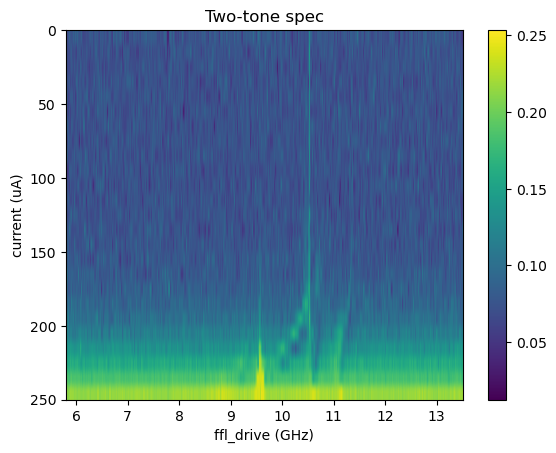

In [100]:
plt.imshow(s21_reshaped,aspect='auto',origin='lower',extent=[fdrive[0],fdrive[-1],flux[-1],flux[0]])
plt.colorbar()
plt.xlabel('ffl_drive (GHz)')
plt.ylabel('current (uA)')
plt.title('Two-tone spec')
plt.show()

In [99]:
print(np.shape(z_mag))

(96275,)
